# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
%matplotlib inline

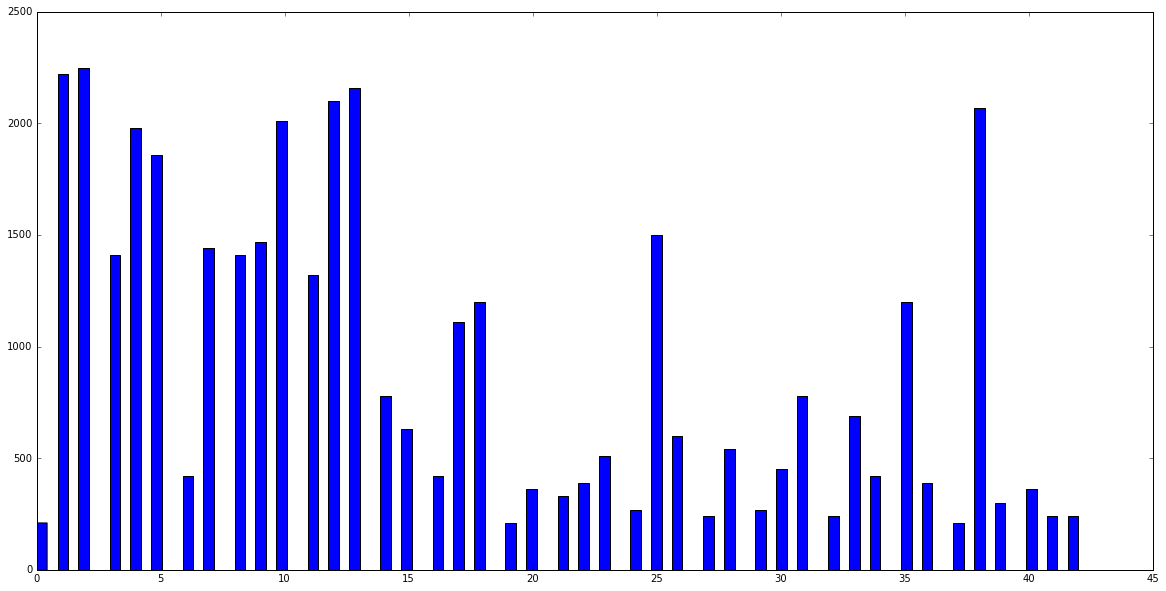

In [5]:
# distribution of classes
plt.hist(y_train, bins=100);

In [ ]:
def show_examples(images, labels, rows, cols, cls=None):
    plt.figure()
    for i in range(rows):
        for j in range(cols):
            plt.subplot(rows,cols,i*rows+j+1)
            while True:
                example = np.random.randint(0, len(images))
                if cls is None or labels[example]==cls:
                    break
            plt.title('img {}: {}'.format(example, labels[example]))
            plt.imshow(images[example,:,:,:]);

rows = 10
cols = 10
cls = None
show_examples(X_train, y_train, rows, cols, cls)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [5]:
def normalize_data(image_data):
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )    

In [6]:
x_train_norm = normalize_data(X_train)
x_test_norm = normalize_data(X_test)

In [7]:
x_train_norm.shape

(39209, 32, 32, 3)

In [8]:
rows = 10
cols = 10
cls = None
show_examples(x_train_norm, y_train, rows, cols, cls)

NameError: name 'show_examples' is not defined

In [9]:
x_train_norm.shape

(39209, 32, 32, 3)

In [ ]:
y_test[:10]

In [10]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_norm = encoder.transform(y_train)
y_test_norm = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train_norm = y_train_norm.astype(np.float32)
y_test_norm  = y_test_norm.astype(np.float32)

In [11]:
y_train_norm.shape

(39209, 43)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

Alexey:
I have decided to start with simple normalization of levels, keeping RGB channels intact



.

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [12]:
pct_train = 90.
pct_valid = 10.
random_state = 123

#n = x_train_norm.shape[0]
train_features, val_features, train_labels, val_labels = train_test_split(
                                                            x_train_norm, y_train_norm, 
                                                            train_size = pct_train/100., 
                                                            test_size = pct_valid/100.,
                                                            random_state = random_state)

In [13]:
train_features.shape, train_labels.shape

((35288, 32, 32, 3), (35288, 43))

In [14]:
features_count = np.prod(train_features.shape[1:])
labels_count = len(set(y_train))
features_count, labels_count

(3072, 43)

In [15]:
len(train_features)

35288

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [16]:
import tensorflow as tf
import math
from datetime import datetime

/Users/alexeysimonov/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Set the features and labels tensors
with tf.device('/gpu:0'):
    #pass

    features = tf.placeholder(tf.float32)
    labels = tf.placeholder(tf.float32)

    features_flat = tf.reshape(features, [-1, features_count])

    n_hidden_layer = 1000 # layer number of features

    weights = {
        'hidden_layer': tf.Variable(tf.random_normal([features_count, n_hidden_layer])),
        'out': tf.Variable(tf.random_normal([n_hidden_layer, labels_count]))
    }
    biases = {
        'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
        'out': tf.Variable(tf.random_normal([labels_count]))
    }

    #weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
    #biases = tf.Variable(tf.zeros(labels_count))

    logits = tf.add(tf.matmul(features_flat, weights['hidden_layer']), biases['hidden_layer'])
    layer_1 = tf.nn.relu(logits)
    logits2 = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

    prediction = tf.nn.softmax(logits2)

    # Cross entropy
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits2, labels)
    #-tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

    # Training loss
    loss = tf.reduce_mean(cross_entropy)
    loss_sum = tf.reduce_sum(cross_entropy)

    # Determine if the predictions are correct
    is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
    # Calculate the accuracy of the predictions
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
    accuracy_sum = tf.reduce_sum(tf.cast(is_correct_prediction, tf.float32))

    # Create an operation that initializes all variables
    init = tf.initialize_all_variables()


In [18]:
# learning parameters
epochs = 3000
batch_size = 200
learning_rate = 0.07
model_param_file = 'perceptron512-relu.ckpt'

In [19]:
# Feed dicts for training, validation, and test session
train_feed_dict = {features: train_features, labels: train_labels}
val_feed_dict = {features: val_features, labels: val_labels}
#test_feed_dict = {features: test_features, labels: test_labels}

In [ ]:
# for debug
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    
batch_count = int(math.ceil(len(train_features)/batch_size))
session = tf.Session()
session.run(init)
batch_i = 0
batch_start = batch_i*batch_size
batch_features = train_features[batch_start:batch_start + batch_size]
batch_labels = train_labels[batch_start:batch_start + batch_size]

In [ ]:
batch_features.shape, batch_labels.shape

In [ ]:
#pr = tf.Print(prediction, [tf.shape(prediction)], 'prediction shape = ', first_n=100)
out = session.run(
    [cross_entropy],
    feed_dict={features: batch_features, labels: batch_labels})

In [ ]:
#out

In [ ]:
len(out)

In [ ]:
out[0].shape

In [20]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    
# The accuracy measured against the validation set
validation_accuracy = 0.0
# Measurements use for graphing loss and accuracy
#log_batch_step = 50
#batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

# to save all trained variables, but not the graph
saver = tf.train.Saver()

#GPU config
config=tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.8

st = datetime.now()

a_ = 0

with tf.Session(config=config) as session:
    session.run(init)
    for epoch_i in range(epochs):
        # train for one epoch
        # random training set permutation
        perm_index = np.random.permutation(len(train_features))
        train_features = train_features[perm_index]
        train_labels = train_labels[perm_index]
        # batches
        batch_count = int(math.ceil(len(train_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Train Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})
        # save checkpoint every epoch
        saver.save(session, model_param_file, global_step=epoch_i)
        # Log accuracy every epoch. have to calculate accuracy in batches as cannot 
        # fit entire test set on GPU
        # training accuracy
        batch_count = int(math.ceil(len(train_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Train Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        l = 0.
        a = 0.
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            l_, a_ = session.run(
                [loss_sum, accuracy_sum],
                feed_dict={features: batch_features, labels: batch_labels})
            l += l_
            a += a_
        loss_batch.append(l / len(train_features))
        train_acc_batch.append(a / len(train_features))
        # validation accuracy
        batch_count = int(math.ceil(len(val_features)/batch_size))
        batches_pbar = tqdm(range(batch_count), desc='Val Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        a = 0.
        for batch_i in batches_pbar:
            batch_start = batch_i*batch_size
            batch_features = val_features[batch_start:batch_start + batch_size]
            batch_labels = val_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            a_ = session.run(
                [accuracy_sum],
                feed_dict={features: batch_features, labels: batch_labels})
            a += a_[0]
        validation_accuracy = a / len(val_features)
        valid_acc_batch.append(validation_accuracy)
        print('epoch {}, val accuracy: {}'.format(epoch_i, validation_accuracy))
print('runtime: {}'.format(datetime.now()-st))

Val Accuracy Epoch  1/3000: 100%|██████████| 20/20 [00:00<00:00, 110.51batches/s]


epoch 0, val accuracy: 0.033919918388166284


Val Accuracy Epoch  2/3000: 100%|██████████| 20/20 [00:00<00:00, 112.43batches/s]


epoch 1, val accuracy: 0.06937005865850548


Val Accuracy Epoch  3/3000: 100%|██████████| 20/20 [00:00<00:00, 112.11batches/s]


epoch 2, val accuracy: 0.07829635297118082


Val Accuracy Epoch  4/3000: 100%|██████████| 20/20 [00:00<00:00, 110.80batches/s]


epoch 3, val accuracy: 0.08875286916602908


Val Accuracy Epoch  5/3000: 100%|██████████| 20/20 [00:00<00:00, 112.47batches/s]


epoch 4, val accuracy: 0.08849783218566692


Val Accuracy Epoch  6/3000: 100%|██████████| 20/20 [00:00<00:00, 110.68batches/s]


epoch 5, val accuracy: 0.09589390461616934


Val Accuracy Epoch  7/3000: 100%|██████████| 20/20 [00:00<00:00, 111.54batches/s]


epoch 6, val accuracy: 0.10609538383065545


Val Accuracy Epoch  8/3000: 100%|██████████| 20/20 [00:00<00:00, 111.07batches/s]


epoch 7, val accuracy: 0.11068604947717418


Val Accuracy Epoch  9/3000: 100%|██████████| 20/20 [00:00<00:00, 110.61batches/s]


epoch 8, val accuracy: 0.12445804641673043


Val Accuracy Epoch 10/3000: 100%|██████████| 20/20 [00:00<00:00, 112.23batches/s]


epoch 9, val accuracy: 0.1257332313185412


Val Accuracy Epoch 11/3000: 100%|██████████| 20/20 [00:00<00:00, 111.37batches/s]


epoch 10, val accuracy: 0.1310890079061464


Val Accuracy Epoch 12/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 11, val accuracy: 0.1389951542973731


Val Accuracy Epoch 13/3000: 100%|██████████| 20/20 [00:00<00:00, 110.45batches/s]


epoch 12, val accuracy: 0.13516959959194083


Val Accuracy Epoch 14/3000: 100%|██████████| 20/20 [00:00<00:00, 111.13batches/s]


epoch 13, val accuracy: 0.14205559806171894


Val Accuracy Epoch 15/3000: 100%|██████████| 20/20 [00:00<00:00, 110.85batches/s]


epoch 14, val accuracy: 0.14970670747258352


Val Accuracy Epoch 16/3000: 100%|██████████| 20/20 [00:00<00:00, 110.00batches/s]


epoch 15, val accuracy: 0.15557255802091302


Val Accuracy Epoch 17/3000: 100%|██████████| 20/20 [00:00<00:00, 110.89batches/s]


epoch 16, val accuracy: 0.16577403723539913


Val Accuracy Epoch 18/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 17, val accuracy: 0.16857944401938282


Val Accuracy Epoch 19/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 18, val accuracy: 0.17521040550879877


Val Accuracy Epoch 20/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 19, val accuracy: 0.1729150726855394


Val Accuracy Epoch 21/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 20, val accuracy: 0.188982402448355


Val Accuracy Epoch 22/3000: 100%|██████████| 20/20 [00:00<00:00, 109.75batches/s]


epoch 21, val accuracy: 0.20504973221117062


Val Accuracy Epoch 23/3000: 100%|██████████| 20/20 [00:00<00:00, 109.88batches/s]


epoch 22, val accuracy: 0.19867380770211682


Val Accuracy Epoch 24/3000: 100%|██████████| 20/20 [00:00<00:00, 106.88batches/s]


epoch 23, val accuracy: 0.2078551389951543


Val Accuracy Epoch 25/3000: 100%|██████████| 20/20 [00:00<00:00, 109.59batches/s]


epoch 24, val accuracy: 0.20275439938791126


Val Accuracy Epoch 26/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 25, val accuracy: 0.21576128538638104


Val Accuracy Epoch 27/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 26, val accuracy: 0.22290232083652128


Val Accuracy Epoch 28/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 27, val accuracy: 0.2180566182096404


Val Accuracy Epoch 29/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 28, val accuracy: 0.2180566182096404


Val Accuracy Epoch 30/3000: 100%|██████████| 20/20 [00:00<00:00, 106.55batches/s]


epoch 29, val accuracy: 0.22596276460086712


Val Accuracy Epoch 31/3000: 100%|██████████| 20/20 [00:00<00:00, 104.85batches/s]


epoch 30, val accuracy: 0.23514409589390461


Val Accuracy Epoch 32/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 31, val accuracy: 0.23157357816883448


Val Accuracy Epoch 33/3000: 100%|██████████| 20/20 [00:00<00:00, 106.38batches/s]


epoch 32, val accuracy: 0.234123947972456


Val Accuracy Epoch 34/3000: 100%|██████████| 20/20 [00:00<00:00, 106.58batches/s]


epoch 33, val accuracy: 0.23106350420811017


Val Accuracy Epoch 35/3000: 100%|██████████| 20/20 [00:00<00:00, 106.04batches/s]


epoch 34, val accuracy: 0.2496812037745473


Val Accuracy Epoch 36/3000: 100%|██████████| 20/20 [00:00<00:00, 105.49batches/s]


epoch 35, val accuracy: 0.24687579699056364


Val Accuracy Epoch 37/3000: 100%|██████████| 20/20 [00:00<00:00, 103.79batches/s]


epoch 36, val accuracy: 0.24764090793165008


Val Accuracy Epoch 38/3000: 100%|██████████| 20/20 [00:00<00:00, 106.36batches/s]


epoch 37, val accuracy: 0.24993624075490947


Val Accuracy Epoch 39/3000: 100%|██████████| 20/20 [00:00<00:00, 105.27batches/s]


epoch 38, val accuracy: 0.2588625350675848


Val Accuracy Epoch 40/3000: 100%|██████████| 20/20 [00:00<00:00, 105.02batches/s]


epoch 39, val accuracy: 0.26243305279265494


Val Accuracy Epoch 41/3000: 100%|██████████| 20/20 [00:00<00:00, 103.91batches/s]


epoch 40, val accuracy: 0.24177505738332059


Val Accuracy Epoch 42/3000: 100%|██████████| 20/20 [00:00<00:00, 105.03batches/s]


epoch 41, val accuracy: 0.2680438663606223


Val Accuracy Epoch 43/3000: 100%|██████████| 20/20 [00:00<00:00, 106.27batches/s]


epoch 42, val accuracy: 0.260902830910482


Val Accuracy Epoch 44/3000: 100%|██████████| 20/20 [00:00<00:00, 106.67batches/s]


epoch 43, val accuracy: 0.26574853353736294


Val Accuracy Epoch 45/3000: 100%|██████████| 20/20 [00:00<00:00, 104.39batches/s]


epoch 44, val accuracy: 0.2685539403213466


Val Accuracy Epoch 46/3000: 100%|██████████| 20/20 [00:00<00:00, 103.99batches/s]


epoch 45, val accuracy: 0.27288956898750316


Val Accuracy Epoch 47/3000: 100%|██████████| 20/20 [00:00<00:00, 104.88batches/s]


epoch 46, val accuracy: 0.26829890334098444


Val Accuracy Epoch 48/3000: 100%|██████████| 20/20 [00:00<00:00, 105.00batches/s]


epoch 47, val accuracy: 0.26345320071410355


Val Accuracy Epoch 49/3000: 100%|██████████| 20/20 [00:00<00:00, 104.31batches/s]


epoch 48, val accuracy: 0.2813057893394542


Val Accuracy Epoch 50/3000: 100%|██████████| 20/20 [00:00<00:00, 105.71batches/s]


epoch 49, val accuracy: 0.2733996429482275


Val Accuracy Epoch 51/3000: 100%|██████████| 20/20 [00:00<00:00, 104.00batches/s]


epoch 50, val accuracy: 0.28181586330017855


Val Accuracy Epoch 52/3000: 100%|██████████| 20/20 [00:00<00:00, 105.39batches/s]


epoch 51, val accuracy: 0.2927824534557511


Val Accuracy Epoch 53/3000: 100%|██████████| 20/20 [00:00<00:00, 105.57batches/s]


epoch 52, val accuracy: 0.28895689875031877


Val Accuracy Epoch 54/3000: 100%|██████████| 20/20 [00:00<00:00, 104.97batches/s]


epoch 53, val accuracy: 0.2846212700841622


Val Accuracy Epoch 55/3000: 100%|██████████| 20/20 [00:00<00:00, 105.70batches/s]


epoch 54, val accuracy: 0.29227237949502677


Val Accuracy Epoch 56/3000: 100%|██████████| 20/20 [00:00<00:00, 103.40batches/s]


epoch 55, val accuracy: 0.28921193573068094


Val Accuracy Epoch 57/3000: 100%|██████████| 20/20 [00:00<00:00, 105.28batches/s]


epoch 56, val accuracy: 0.29813823004335627


Val Accuracy Epoch 58/3000: 100%|██████████| 20/20 [00:00<00:00, 104.84batches/s]


epoch 57, val accuracy: 0.3034940066309615


Val Accuracy Epoch 59/3000: 100%|██████████| 20/20 [00:00<00:00, 107.10batches/s]


epoch 58, val accuracy: 0.2861514919663351


Val Accuracy Epoch 60/3000: 100%|██████████| 20/20 [00:00<00:00, 104.98batches/s]


epoch 59, val accuracy: 0.3070645243560316


Val Accuracy Epoch 61/3000: 100%|██████████| 20/20 [00:00<00:00, 105.47batches/s]


epoch 60, val accuracy: 0.30757459831675593


Val Accuracy Epoch 62/3000: 100%|██████████| 20/20 [00:00<00:00, 106.55batches/s]


epoch 61, val accuracy: 0.3098699311400153


Val Accuracy Epoch 63/3000: 100%|██████████| 20/20 [00:00<00:00, 104.22batches/s]


epoch 62, val accuracy: 0.31063504208110176


Val Accuracy Epoch 64/3000: 100%|██████████| 20/20 [00:00<00:00, 103.34batches/s]


epoch 63, val accuracy: 0.3170109665901556


Val Accuracy Epoch 65/3000: 100%|██████████| 20/20 [00:00<00:00, 104.82batches/s]


epoch 64, val accuracy: 0.32134659525631215


Val Accuracy Epoch 66/3000: 100%|██████████| 20/20 [00:00<00:00, 105.84batches/s]


epoch 65, val accuracy: 0.31879622545269065


Val Accuracy Epoch 67/3000: 100%|██████████| 20/20 [00:00<00:00, 104.62batches/s]


epoch 66, val accuracy: 0.32134659525631215


Val Accuracy Epoch 68/3000: 100%|██████████| 20/20 [00:00<00:00, 103.54batches/s]


epoch 67, val accuracy: 0.3302728895689875


Val Accuracy Epoch 69/3000: 100%|██████████| 20/20 [00:00<00:00, 105.99batches/s]


epoch 68, val accuracy: 0.3330782963529712


Val Accuracy Epoch 70/3000: 100%|██████████| 20/20 [00:00<00:00, 104.46batches/s]


epoch 69, val accuracy: 0.33588370313695487


Val Accuracy Epoch 71/3000: 100%|██████████| 20/20 [00:00<00:00, 104.49batches/s]


epoch 70, val accuracy: 0.3389441469013007


Val Accuracy Epoch 72/3000: 100%|██████████| 20/20 [00:00<00:00, 105.67batches/s]


epoch 71, val accuracy: 0.3402193318031114


Val Accuracy Epoch 73/3000: 100%|██████████| 20/20 [00:00<00:00, 103.42batches/s]


epoch 72, val accuracy: 0.33868910992093854


Val Accuracy Epoch 74/3000: 100%|██████████| 20/20 [00:00<00:00, 104.72batches/s]


epoch 73, val accuracy: 0.339454220862025


Val Accuracy Epoch 75/3000: 100%|██████████| 20/20 [00:00<00:00, 103.59batches/s]


epoch 74, val accuracy: 0.3483805151747003


Val Accuracy Epoch 76/3000: 100%|██████████| 20/20 [00:00<00:00, 102.57batches/s]


epoch 75, val accuracy: 0.3608773272124458


Val Accuracy Epoch 77/3000: 100%|██████████| 20/20 [00:00<00:00, 105.61batches/s]


epoch 76, val accuracy: 0.36393777097679164


Val Accuracy Epoch 78/3000: 100%|██████████| 20/20 [00:00<00:00, 104.54batches/s]


epoch 77, val accuracy: 0.3703136954858455


Val Accuracy Epoch 79/3000: 100%|██████████| 20/20 [00:00<00:00, 105.09batches/s]


epoch 78, val accuracy: 0.39377709767916347


Val Accuracy Epoch 80/3000: 100%|██████████| 20/20 [00:00<00:00, 105.88batches/s]


epoch 79, val accuracy: 0.39607243050242286


Val Accuracy Epoch 81/3000: 100%|██████████| 20/20 [00:00<00:00, 104.78batches/s]


epoch 80, val accuracy: 0.3886763580719204


Val Accuracy Epoch 82/3000: 100%|██████████| 20/20 [00:00<00:00, 104.34batches/s]


epoch 81, val accuracy: 0.41213976026523846


Val Accuracy Epoch 83/3000: 100%|██████████| 20/20 [00:00<00:00, 104.73batches/s]


epoch 82, val accuracy: 0.4044886508543739


Val Accuracy Epoch 84/3000: 100%|██████████| 20/20 [00:00<00:00, 105.67batches/s]


epoch 83, val accuracy: 0.4141800561081357


Val Accuracy Epoch 85/3000: 100%|██████████| 20/20 [00:00<00:00, 104.16batches/s]


epoch 84, val accuracy: 0.42412649834225963


Val Accuracy Epoch 86/3000: 100%|██████████| 20/20 [00:00<00:00, 105.85batches/s]


epoch 85, val accuracy: 0.4210660545779138


Val Accuracy Epoch 87/3000: 100%|██████████| 20/20 [00:00<00:00, 106.38batches/s]


epoch 86, val accuracy: 0.41928079571537874


Val Accuracy Epoch 88/3000: 100%|██████████| 20/20 [00:00<00:00, 103.24batches/s]


epoch 87, val accuracy: 0.41596531497067074


Val Accuracy Epoch 89/3000: 100%|██████████| 20/20 [00:00<00:00, 106.31batches/s]


epoch 88, val accuracy: 0.4478449375159398


Val Accuracy Epoch 90/3000: 100%|██████████| 20/20 [00:00<00:00, 103.80batches/s]


epoch 89, val accuracy: 0.4391736801836266


Val Accuracy Epoch 91/3000: 100%|██████████| 20/20 [00:00<00:00, 105.25batches/s]


epoch 90, val accuracy: 0.43687834736036724


Val Accuracy Epoch 92/3000: 100%|██████████| 20/20 [00:00<00:00, 104.93batches/s]


epoch 91, val accuracy: 0.42973731191022696


Val Accuracy Epoch 93/3000: 100%|██████████| 20/20 [00:00<00:00, 104.10batches/s]


epoch 92, val accuracy: 0.4560061208875287


Val Accuracy Epoch 94/3000: 100%|██████████| 20/20 [00:00<00:00, 104.90batches/s]


epoch 93, val accuracy: 0.4478449375159398


Val Accuracy Epoch 95/3000: 100%|██████████| 20/20 [00:00<00:00, 105.78batches/s]


epoch 94, val accuracy: 0.44121397602652385


Val Accuracy Epoch 96/3000: 100%|██████████| 20/20 [00:00<00:00, 105.48batches/s]


epoch 95, val accuracy: 0.46110686049477173


Val Accuracy Epoch 97/3000: 100%|██████████| 20/20 [00:00<00:00, 70.51batches/s]


epoch 96, val accuracy: 0.45192552920173423


Val Accuracy Epoch 98/3000: 100%|██████████| 20/20 [00:00<00:00, 105.95batches/s]


epoch 97, val accuracy: 0.47156337668962


Val Accuracy Epoch 99/3000: 100%|██████████| 20/20 [00:00<00:00, 63.28batches/s]


epoch 98, val accuracy: 0.4685029329252742


Val Accuracy Epoch 100/3000: 100%|██████████| 20/20 [00:00<00:00, 104.96batches/s]


epoch 99, val accuracy: 0.4488650854373884


Val Accuracy Epoch 101/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 100, val accuracy: 0.46110686049477173


Val Accuracy Epoch 102/3000: 100%|██████████| 20/20 [00:00<00:00, 106.62batches/s]


epoch 101, val accuracy: 0.4764090793165009


Val Accuracy Epoch 103/3000: 100%|██████████| 20/20 [00:00<00:00, 107.41batches/s]


epoch 102, val accuracy: 0.47487885743432795


Val Accuracy Epoch 104/3000: 100%|██████████| 20/20 [00:00<00:00, 107.21batches/s]


epoch 103, val accuracy: 0.4667176740627391


Val Accuracy Epoch 105/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 104, val accuracy: 0.4774292272379495


Val Accuracy Epoch 106/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 105, val accuracy: 0.4891609283346085


Val Accuracy Epoch 107/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 106, val accuracy: 0.4940066309614894


Val Accuracy Epoch 108/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 107, val accuracy: 0.48304004080591684


Val Accuracy Epoch 109/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 108, val accuracy: 0.47156337668962


Val Accuracy Epoch 110/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 109, val accuracy: 0.49273144605967867


Val Accuracy Epoch 111/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 110, val accuracy: 0.4963019637847488


Val Accuracy Epoch 112/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 111, val accuracy: 0.4909461871971436


Val Accuracy Epoch 113/3000: 100%|██████████| 20/20 [00:00<00:00, 109.43batches/s]


epoch 112, val accuracy: 0.47819433817903595


Val Accuracy Epoch 114/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 113, val accuracy: 0.4730935985717929


Val Accuracy Epoch 115/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 114, val accuracy: 0.4978321856669217


Val Accuracy Epoch 116/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 115, val accuracy: 0.46748278500382556


Val Accuracy Epoch 117/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 116, val accuracy: 0.49910737056873244


Val Accuracy Epoch 118/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 117, val accuracy: 0.46799285896454984


Val Accuracy Epoch 119/3000: 100%|██████████| 20/20 [00:00<00:00, 106.75batches/s]


epoch 118, val accuracy: 0.5019127773527161


Val Accuracy Epoch 120/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 119, val accuracy: 0.489926039275695


Val Accuracy Epoch 121/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 120, val accuracy: 0.49987248150981894


Val Accuracy Epoch 122/3000: 100%|██████████| 20/20 [00:00<00:00, 107.13batches/s]


epoch 121, val accuracy: 0.5164498852333589


Val Accuracy Epoch 123/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 122, val accuracy: 0.5087987758224942


Val Accuracy Epoch 124/3000: 100%|██████████| 20/20 [00:00<00:00, 109.64batches/s]


epoch 123, val accuracy: 0.5128793675082887


Val Accuracy Epoch 125/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 124, val accuracy: 0.4924764090793165


Val Accuracy Epoch 126/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 125, val accuracy: 0.5235909206834991


Val Accuracy Epoch 127/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 126, val accuracy: 0.5138995154297373


Val Accuracy Epoch 128/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 127, val accuracy: 0.5141545524100994


Val Accuracy Epoch 129/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 128, val accuracy: 0.5161948482529967


Val Accuracy Epoch 130/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 129, val accuracy: 0.5228258097424127


Val Accuracy Epoch 131/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 130, val accuracy: 0.531752104055088


Val Accuracy Epoch 132/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 131, val accuracy: 0.5113491456261158


Val Accuracy Epoch 133/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 132, val accuracy: 0.5116041826064779


Val Accuracy Epoch 134/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 133, val accuracy: 0.5388931395052282


Val Accuracy Epoch 135/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 134, val accuracy: 0.5419535832695741


Val Accuracy Epoch 136/3000: 100%|██████████| 20/20 [00:00<00:00, 109.11batches/s]


epoch 135, val accuracy: 0.5348125478194338


Val Accuracy Epoch 137/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 136, val accuracy: 0.5462892119357307


Val Accuracy Epoch 138/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 137, val accuracy: 0.5547054322876818


Val Accuracy Epoch 139/3000: 100%|██████████| 20/20 [00:00<00:00, 106.61batches/s]


epoch 138, val accuracy: 0.5248661055853099


Val Accuracy Epoch 140/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 139, val accuracy: 0.5289466972711043


Val Accuracy Epoch 141/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 140, val accuracy: 0.5531752104055088


Val Accuracy Epoch 142/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 141, val accuracy: 0.5427186942106605


Val Accuracy Epoch 143/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 142, val accuracy: 0.5394032134659525


Val Accuracy Epoch 144/3000: 100%|██████████| 20/20 [00:00<00:00, 106.82batches/s]


epoch 143, val accuracy: 0.5582759500127519


Val Accuracy Epoch 145/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 144, val accuracy: 0.5562356541698547


Val Accuracy Epoch 146/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 145, val accuracy: 0.5554705432287682


Val Accuracy Epoch 147/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 146, val accuracy: 0.5646518745218057


Val Accuracy Epoch 148/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 147, val accuracy: 0.5396582504463148


Val Accuracy Epoch 149/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 148, val accuracy: 0.5666921703647029


Val Accuracy Epoch 150/3000: 100%|██████████| 20/20 [00:00<00:00, 106.81batches/s]


epoch 149, val accuracy: 0.5756184646773782


Val Accuracy Epoch 151/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 150, val accuracy: 0.5529201734251467


Val Accuracy Epoch 152/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 151, val accuracy: 0.5633766896199949


Val Accuracy Epoch 153/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 152, val accuracy: 0.5605712828360112


Val Accuracy Epoch 154/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 153, val accuracy: 0.5715378729915838


Val Accuracy Epoch 155/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 154, val accuracy: 0.5654169854628921


Val Accuracy Epoch 156/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 155, val accuracy: 0.5758735016577404


Val Accuracy Epoch 157/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 156, val accuracy: 0.5682223922468758


Val Accuracy Epoch 158/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 157, val accuracy: 0.5827595001275185


Val Accuracy Epoch 159/3000: 100%|██████████| 20/20 [00:00<00:00, 109.09batches/s]


epoch 158, val accuracy: 0.566947207345065


Val Accuracy Epoch 160/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 159, val accuracy: 0.5756184646773782


Val Accuracy Epoch 161/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 160, val accuracy: 0.5809742412649834


Val Accuracy Epoch 162/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 161, val accuracy: 0.5909206834991074


Val Accuracy Epoch 163/3000: 100%|██████████| 20/20 [00:00<00:00, 108.88batches/s]


epoch 162, val accuracy: 0.5781688344809998


Val Accuracy Epoch 164/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 163, val accuracy: 0.5883703136954859


Val Accuracy Epoch 165/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 164, val accuracy: 0.5850548329507779


Val Accuracy Epoch 166/3000: 100%|██████████| 20/20 [00:00<00:00, 109.20batches/s]


epoch 165, val accuracy: 0.5661820964039785


Val Accuracy Epoch 167/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 166, val accuracy: 0.5975516449885233


Val Accuracy Epoch 168/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 167, val accuracy: 0.5893904616169344


Val Accuracy Epoch 169/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 168, val accuracy: 0.5906656465187452


Val Accuracy Epoch 170/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 169, val accuracy: 0.6092833460851823


Val Accuracy Epoch 171/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 170, val accuracy: 0.6085182351440959


Val Accuracy Epoch 172/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 171, val accuracy: 0.6026523845957664


Val Accuracy Epoch 173/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 172, val accuracy: 0.6123437898495282


Val Accuracy Epoch 174/3000: 100%|██████████| 20/20 [00:00<00:00, 108.88batches/s]


epoch 173, val accuracy: 0.5763835756184646


Val Accuracy Epoch 175/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 174, val accuracy: 0.6125988268298903


Val Accuracy Epoch 176/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 175, val accuracy: 0.6131089007906146


Val Accuracy Epoch 177/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 176, val accuracy: 0.612088752869166


Val Accuracy Epoch 178/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 177, val accuracy: 0.6110686049477174


Val Accuracy Epoch 179/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 178, val accuracy: 0.618719714358582


Val Accuracy Epoch 180/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 179, val accuracy: 0.6159143075745983


Val Accuracy Epoch 181/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 180, val accuracy: 0.6222902320836521


Val Accuracy Epoch 182/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 181, val accuracy: 0.6128538638102525


Val Accuracy Epoch 183/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 182, val accuracy: 0.6164243815353226


Val Accuracy Epoch 184/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 183, val accuracy: 0.6309614894159653


Val Accuracy Epoch 185/3000: 100%|██████████| 20/20 [00:00<00:00, 107.63batches/s]


epoch 184, val accuracy: 0.6273909716908952


Val Accuracy Epoch 186/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 185, val accuracy: 0.6409079316500893


Val Accuracy Epoch 187/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 186, val accuracy: 0.6335118592195869


Val Accuracy Epoch 188/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 187, val accuracy: 0.610303494006631


Val Accuracy Epoch 189/3000: 100%|██████████| 20/20 [00:00<00:00, 106.42batches/s]


epoch 188, val accuracy: 0.643713338434073


Val Accuracy Epoch 190/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 189, val accuracy: 0.6429482274929865


Val Accuracy Epoch 191/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 190, val accuracy: 0.6409079316500893


Val Accuracy Epoch 192/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 191, val accuracy: 0.6194848252996684


Val Accuracy Epoch 193/3000: 100%|██████████| 20/20 [00:00<00:00, 109.23batches/s]


epoch 192, val accuracy: 0.640397857689365


Val Accuracy Epoch 194/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 193, val accuracy: 0.6452435603162459


Val Accuracy Epoch 195/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 194, val accuracy: 0.647028819178781


Val Accuracy Epoch 196/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 195, val accuracy: 0.6475388931395052


Val Accuracy Epoch 197/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 196, val accuracy: 0.6358071920428462


Val Accuracy Epoch 198/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 197, val accuracy: 0.6549349655700076


Val Accuracy Epoch 199/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 198, val accuracy: 0.6503442999234889


Val Accuracy Epoch 200/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 199, val accuracy: 0.6495791889824024


Val Accuracy Epoch 201/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 200, val accuracy: 0.648814078041316


Val Accuracy Epoch 202/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 201, val accuracy: 0.6577403723539913


Val Accuracy Epoch 203/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 202, val accuracy: 0.6595256312165264


Val Accuracy Epoch 204/3000: 100%|██████████| 20/20 [00:00<00:00, 109.38batches/s]


epoch 203, val accuracy: 0.6467737821984187


Val Accuracy Epoch 205/3000: 100%|██████████| 20/20 [00:00<00:00, 106.70batches/s]


epoch 204, val accuracy: 0.6457536342769702


Val Accuracy Epoch 206/3000: 100%|██████████| 20/20 [00:00<00:00, 109.24batches/s]


epoch 205, val accuracy: 0.6513644478449375


Val Accuracy Epoch 207/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 206, val accuracy: 0.6710022953328233


Val Accuracy Epoch 208/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 207, val accuracy: 0.6661565927059424


Val Accuracy Epoch 209/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 208, val accuracy: 0.6743177760775313


Val Accuracy Epoch 210/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 209, val accuracy: 0.6725325172149962


Val Accuracy Epoch 211/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 210, val accuracy: 0.6541698546289212


Val Accuracy Epoch 212/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 211, val accuracy: 0.6643713338434073


Val Accuracy Epoch 213/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 212, val accuracy: 0.6727875541953583


Val Accuracy Epoch 214/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 213, val accuracy: 0.6720224432542719


Val Accuracy Epoch 215/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 214, val accuracy: 0.6796735526651364


Val Accuracy Epoch 216/3000: 100%|██████████| 20/20 [00:00<00:00, 109.73batches/s]


epoch 215, val accuracy: 0.6763580719204285


Val Accuracy Epoch 217/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 216, val accuracy: 0.6636062229023209


Val Accuracy Epoch 218/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 217, val accuracy: 0.6776332568222392


Val Accuracy Epoch 219/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 218, val accuracy: 0.6574853353736292


Val Accuracy Epoch 220/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 219, val accuracy: 0.6666666666666666


Val Accuracy Epoch 221/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 220, val accuracy: 0.6712573323131854


Val Accuracy Epoch 222/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 221, val accuracy: 0.6847742922723795


Val Accuracy Epoch 223/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 222, val accuracy: 0.6804386636062228


Val Accuracy Epoch 224/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 223, val accuracy: 0.6761030349400663


Val Accuracy Epoch 225/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 224, val accuracy: 0.6796735526651364


Val Accuracy Epoch 226/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 225, val accuracy: 0.6799285896454986


Val Accuracy Epoch 227/3000: 100%|██████████| 20/20 [00:00<00:00, 107.46batches/s]


epoch 226, val accuracy: 0.6814588115276715


Val Accuracy Epoch 228/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 227, val accuracy: 0.6908951798010712


Val Accuracy Epoch 229/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 228, val accuracy: 0.6898750318796225


Val Accuracy Epoch 230/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 229, val accuracy: 0.6868145881152767


Val Accuracy Epoch 231/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 230, val accuracy: 0.6544248916092833


Val Accuracy Epoch 232/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 231, val accuracy: 0.6926804386636062


Val Accuracy Epoch 233/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 232, val accuracy: 0.6817138485080336


Val Accuracy Epoch 234/3000: 100%|██████████| 20/20 [00:00<00:00, 109.59batches/s]


epoch 233, val accuracy: 0.6702371843917369


Val Accuracy Epoch 235/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 234, val accuracy: 0.6998214741137465


Val Accuracy Epoch 236/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 235, val accuracy: 0.6893649579188983


Val Accuracy Epoch 237/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 236, val accuracy: 0.6962509563886764


Val Accuracy Epoch 238/3000: 100%|██████████| 20/20 [00:00<00:00, 107.51batches/s]


epoch 237, val accuracy: 0.6852843662331038


Val Accuracy Epoch 239/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 238, val accuracy: 0.6995664371333843


Val Accuracy Epoch 240/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 239, val accuracy: 0.6783983677633256


Val Accuracy Epoch 241/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 240, val accuracy: 0.6676868145881153


Val Accuracy Epoch 242/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 241, val accuracy: 0.6924254016832441


Val Accuracy Epoch 243/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 242, val accuracy: 0.6942106605457792


Val Accuracy Epoch 244/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 243, val accuracy: 0.6885998469778117


Val Accuracy Epoch 245/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 244, val accuracy: 0.7079826574853354


Val Accuracy Epoch 246/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 245, val accuracy: 0.7010966590155573


Val Accuracy Epoch 247/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 246, val accuracy: 0.697271104310125


Val Accuracy Epoch 248/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 247, val accuracy: 0.7046671767406274


Val Accuracy Epoch 249/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 248, val accuracy: 0.6916602907421576


Val Accuracy Epoch 250/3000: 100%|██████████| 20/20 [00:00<00:00, 104.04batches/s]


epoch 249, val accuracy: 0.705687324662076


Val Accuracy Epoch 251/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 250, val accuracy: 0.7153787299158378


Val Accuracy Epoch 252/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 251, val accuracy: 0.7135934710533027


Val Accuracy Epoch 253/3000: 100%|██████████| 20/20 [00:00<00:00, 107.19batches/s]


epoch 252, val accuracy: 0.7051772507013517


Val Accuracy Epoch 254/3000: 100%|██████████| 20/20 [00:00<00:00, 109.61batches/s]


epoch 253, val accuracy: 0.7186942106605457


Val Accuracy Epoch 255/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 254, val accuracy: 0.7036470288191787


Val Accuracy Epoch 256/3000: 100%|██████████| 20/20 [00:00<00:00, 109.37batches/s]


epoch 255, val accuracy: 0.6873246620760011


Val Accuracy Epoch 257/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 256, val accuracy: 0.7077276205049732


Val Accuracy Epoch 258/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 257, val accuracy: 0.7184391736801836


Val Accuracy Epoch 259/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 258, val accuracy: 0.7092578423871462


Val Accuracy Epoch 260/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 259, val accuracy: 0.7156337668962


Val Accuracy Epoch 261/3000: 100%|██████████| 20/20 [00:00<00:00, 109.46batches/s]


epoch 260, val accuracy: 0.6796735526651364


Val Accuracy Epoch 262/3000: 100%|██████████| 20/20 [00:00<00:00, 109.69batches/s]


epoch 261, val accuracy: 0.693955623565417


Val Accuracy Epoch 263/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 262, val accuracy: 0.693955623565417


Val Accuracy Epoch 264/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 263, val accuracy: 0.7184391736801836


Val Accuracy Epoch 265/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 264, val accuracy: 0.7087477684264218


Val Accuracy Epoch 266/3000: 100%|██████████| 20/20 [00:00<00:00, 110.07batches/s]


epoch 265, val accuracy: 0.725580209130324


Val Accuracy Epoch 267/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 266, val accuracy: 0.7212445804641673


Val Accuracy Epoch 268/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 267, val accuracy: 0.7235399132874267


Val Accuracy Epoch 269/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 268, val accuracy: 0.7334863555215506


Val Accuracy Epoch 270/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 269, val accuracy: 0.7263453200714104


Val Accuracy Epoch 271/3000: 100%|██████████| 20/20 [00:00<00:00, 109.74batches/s]


epoch 270, val accuracy: 0.7176740627390972


Val Accuracy Epoch 272/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 271, val accuracy: 0.727365467992859


Val Accuracy Epoch 273/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 272, val accuracy: 0.7176740627390972


Val Accuracy Epoch 274/3000: 100%|██████████| 20/20 [00:00<00:00, 106.65batches/s]


epoch 273, val accuracy: 0.7230298393267024


Val Accuracy Epoch 275/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 274, val accuracy: 0.7092578423871462


Val Accuracy Epoch 276/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 275, val accuracy: 0.724049987248151


Val Accuracy Epoch 277/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 276, val accuracy: 0.7230298393267024


Val Accuracy Epoch 278/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 277, val accuracy: 0.7268553940321346


Val Accuracy Epoch 279/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 278, val accuracy: 0.7174190257587351


Val Accuracy Epoch 280/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 279, val accuracy: 0.7299158377964805


Val Accuracy Epoch 281/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 280, val accuracy: 0.725580209130324


Val Accuracy Epoch 282/3000: 100%|██████████| 20/20 [00:00<00:00, 109.55batches/s]


epoch 281, val accuracy: 0.7250701351695996


Val Accuracy Epoch 283/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 282, val accuracy: 0.7368018362662586


Val Accuracy Epoch 284/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 283, val accuracy: 0.6993114001530222


Val Accuracy Epoch 285/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 284, val accuracy: 0.7291507268553941


Val Accuracy Epoch 286/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 285, val accuracy: 0.7174190257587351


Val Accuracy Epoch 287/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 286, val accuracy: 0.6990563631726601


Val Accuracy Epoch 288/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 287, val accuracy: 0.7294057638357562


Val Accuracy Epoch 289/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 288, val accuracy: 0.7401173170109666


Val Accuracy Epoch 290/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 289, val accuracy: 0.7383320581484315


Val Accuracy Epoch 291/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 290, val accuracy: 0.7337413925019127


Val Accuracy Epoch 292/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 291, val accuracy: 0.7352716143840857


Val Accuracy Epoch 293/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 292, val accuracy: 0.7365467992858965


Val Accuracy Epoch 294/3000: 100%|██████████| 20/20 [00:00<00:00, 106.46batches/s]


epoch 293, val accuracy: 0.7436878347360367


Val Accuracy Epoch 295/3000: 100%|██████████| 20/20 [00:00<00:00, 109.20batches/s]


epoch 294, val accuracy: 0.7258352461106861


Val Accuracy Epoch 296/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 295, val accuracy: 0.7314460596786534


Val Accuracy Epoch 297/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 296, val accuracy: 0.7118082121907676


Val Accuracy Epoch 298/3000: 100%|██████████| 20/20 [00:00<00:00, 110.07batches/s]


epoch 297, val accuracy: 0.7398622800306044


Val Accuracy Epoch 299/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 298, val accuracy: 0.7480234634021933


Val Accuracy Epoch 300/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 299, val accuracy: 0.7250701351695996


Val Accuracy Epoch 301/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 300, val accuracy: 0.7197143585819944


Val Accuracy Epoch 302/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 301, val accuracy: 0.7447079826574854


Val Accuracy Epoch 303/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 302, val accuracy: 0.7510839071665392


Val Accuracy Epoch 304/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 303, val accuracy: 0.7355266513644478


Val Accuracy Epoch 305/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 304, val accuracy: 0.7245600612088753


Val Accuracy Epoch 306/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 305, val accuracy: 0.7396072430502423


Val Accuracy Epoch 307/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 306, val accuracy: 0.749043611323642


Val Accuracy Epoch 308/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 307, val accuracy: 0.7271104310124968


Val Accuracy Epoch 309/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 308, val accuracy: 0.7429227237949503


Val Accuracy Epoch 310/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 309, val accuracy: 0.7470033154807447


Val Accuracy Epoch 311/3000: 100%|██████████| 20/20 [00:00<00:00, 107.82batches/s]


epoch 310, val accuracy: 0.7462382045396583


Val Accuracy Epoch 312/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 311, val accuracy: 0.7503187962254527


Val Accuracy Epoch 313/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 312, val accuracy: 0.7464932415200204


Val Accuracy Epoch 314/3000: 100%|██████████| 20/20 [00:00<00:00, 109.70batches/s]


epoch 313, val accuracy: 0.7447079826574854


Val Accuracy Epoch 315/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 314, val accuracy: 0.7503187962254527


Val Accuracy Epoch 316/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 315, val accuracy: 0.7304259117572048


Val Accuracy Epoch 317/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 316, val accuracy: 0.737311910226983


Val Accuracy Epoch 318/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 317, val accuracy: 0.7513389441469013


Val Accuracy Epoch 319/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 318, val accuracy: 0.7485335373629176


Val Accuracy Epoch 320/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 319, val accuracy: 0.7439428717163988


Val Accuracy Epoch 321/3000: 100%|██████████| 20/20 [00:00<00:00, 109.35batches/s]


epoch 320, val accuracy: 0.7278755419535833


Val Accuracy Epoch 322/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 321, val accuracy: 0.7508288701861769


Val Accuracy Epoch 323/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 322, val accuracy: 0.7434327977556746


Val Accuracy Epoch 324/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 323, val accuracy: 0.7615404233613874


Val Accuracy Epoch 325/3000: 100%|██████████| 20/20 [00:00<00:00, 80.70batches/s]


epoch 324, val accuracy: 0.7464932415200204


Val Accuracy Epoch 326/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 325, val accuracy: 0.7482785003825555


Val Accuracy Epoch 327/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 326, val accuracy: 0.7572047946952308


Val Accuracy Epoch 328/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 327, val accuracy: 0.7495536852843663


Val Accuracy Epoch 329/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 328, val accuracy: 0.749043611323642


Val Accuracy Epoch 330/3000: 100%|██████████| 20/20 [00:00<00:00, 109.32batches/s]


epoch 329, val accuracy: 0.7449630196378475


Val Accuracy Epoch 331/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 330, val accuracy: 0.7564396837541444


Val Accuracy Epoch 332/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 331, val accuracy: 0.7498087222647284


Val Accuracy Epoch 333/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 332, val accuracy: 0.7492986483040041


Val Accuracy Epoch 334/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 333, val accuracy: 0.7612853863810253


Val Accuracy Epoch 335/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 334, val accuracy: 0.7569497577148686


Val Accuracy Epoch 336/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 335, val accuracy: 0.7487885743432797


Val Accuracy Epoch 337/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 336, val accuracy: 0.7503187962254527


Val Accuracy Epoch 338/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 337, val accuracy: 0.7482785003825555


Val Accuracy Epoch 339/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 338, val accuracy: 0.7444529456771232


Val Accuracy Epoch 340/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 339, val accuracy: 0.7209895434838052


Val Accuracy Epoch 341/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 340, val accuracy: 0.7587350165774037


Val Accuracy Epoch 342/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 341, val accuracy: 0.7651109410864575


Val Accuracy Epoch 343/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 342, val accuracy: 0.7569497577148686


Val Accuracy Epoch 344/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 343, val accuracy: 0.7648559041060954


Val Accuracy Epoch 345/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 344, val accuracy: 0.7582249426166794


Val Accuracy Epoch 346/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 345, val accuracy: 0.7602652384595766


Val Accuracy Epoch 347/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 346, val accuracy: 0.7564396837541444


Val Accuracy Epoch 348/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 347, val accuracy: 0.7362917623055343


Val Accuracy Epoch 349/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 348, val accuracy: 0.7628156082631982


Val Accuracy Epoch 350/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 349, val accuracy: 0.7572047946952308


Val Accuracy Epoch 351/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 350, val accuracy: 0.7640907931650089


Val Accuracy Epoch 352/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 351, val accuracy: 0.7498087222647284


Val Accuracy Epoch 353/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 352, val accuracy: 0.7518490181076256


Val Accuracy Epoch 354/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 353, val accuracy: 0.7748023463402194


Val Accuracy Epoch 355/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 354, val accuracy: 0.7577148686559552


Val Accuracy Epoch 356/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 355, val accuracy: 0.7617954603417496


Val Accuracy Epoch 357/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 356, val accuracy: 0.7656210150471818


Val Accuracy Epoch 358/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 357, val accuracy: 0.7638357561846467


Val Accuracy Epoch 359/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 358, val accuracy: 0.7635807192042846


Val Accuracy Epoch 360/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 359, val accuracy: 0.7628156082631982


Val Accuracy Epoch 361/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 360, val accuracy: 0.7699566437133384


Val Accuracy Epoch 362/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 361, val accuracy: 0.764345830145371


Val Accuracy Epoch 363/3000: 100%|██████████| 20/20 [00:00<00:00, 109.58batches/s]


epoch 362, val accuracy: 0.7666411629686305


Val Accuracy Epoch 364/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 363, val accuracy: 0.7633256822239225


Val Accuracy Epoch 365/3000: 100%|██████████| 20/20 [00:00<00:00, 109.68batches/s]


epoch 364, val accuracy: 0.7582249426166794


Val Accuracy Epoch 366/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 365, val accuracy: 0.7531242030094364


Val Accuracy Epoch 367/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 366, val accuracy: 0.7773527161438408


Val Accuracy Epoch 368/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 367, val accuracy: 0.7671512369293547


Val Accuracy Epoch 369/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 368, val accuracy: 0.7671512369293547


Val Accuracy Epoch 370/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 369, val accuracy: 0.7503187962254527


Val Accuracy Epoch 371/3000: 100%|██████████| 20/20 [00:00<00:00, 109.91batches/s]


epoch 370, val accuracy: 0.7464932415200204


Val Accuracy Epoch 372/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 371, val accuracy: 0.7689364957918898


Val Accuracy Epoch 373/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 372, val accuracy: 0.7737821984187707


Val Accuracy Epoch 374/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 373, val accuracy: 0.7689364957918898


Val Accuracy Epoch 375/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 374, val accuracy: 0.7781178270849273


Val Accuracy Epoch 376/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 375, val accuracy: 0.7730170874776843


Val Accuracy Epoch 377/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 376, val accuracy: 0.7538893139505228


Val Accuracy Epoch 378/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 377, val accuracy: 0.7740372353991328


Val Accuracy Epoch 379/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 378, val accuracy: 0.77607753124203


Val Accuracy Epoch 380/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 379, val accuracy: 0.774292272379495


Val Accuracy Epoch 381/3000: 100%|██████████| 20/20 [00:00<00:00, 107.67batches/s]


epoch 380, val accuracy: 0.767661310890079


Val Accuracy Epoch 382/3000: 100%|██████████| 20/20 [00:00<00:00, 106.26batches/s]


epoch 381, val accuracy: 0.7799030859474624


Val Accuracy Epoch 383/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 382, val accuracy: 0.7809232338689109


Val Accuracy Epoch 384/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 383, val accuracy: 0.770976791634787


Val Accuracy Epoch 385/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 384, val accuracy: 0.7543993879112472


Val Accuracy Epoch 386/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 385, val accuracy: 0.7796480489671003


Val Accuracy Epoch 387/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 386, val accuracy: 0.7850038255547054


Val Accuracy Epoch 388/3000: 100%|██████████| 20/20 [00:00<00:00, 109.40batches/s]


epoch 387, val accuracy: 0.7801581229278245


Val Accuracy Epoch 389/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 388, val accuracy: 0.7750573833205815


Val Accuracy Epoch 390/3000: 100%|██████████| 20/20 [00:00<00:00, 109.92batches/s]


epoch 389, val accuracy: 0.7804131599081867


Val Accuracy Epoch 391/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 390, val accuracy: 0.7770976791634787


Val Accuracy Epoch 392/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 391, val accuracy: 0.7809232338689109


Val Accuracy Epoch 393/3000: 100%|██████████| 20/20 [00:00<00:00, 109.33batches/s]


epoch 392, val accuracy: 0.7763325682223923


Val Accuracy Epoch 394/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 393, val accuracy: 0.7801581229278245


Val Accuracy Epoch 395/3000: 100%|██████████| 20/20 [00:00<00:00, 109.85batches/s]


epoch 394, val accuracy: 0.7814333078296353


Val Accuracy Epoch 396/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 395, val accuracy: 0.7850038255547054


Val Accuracy Epoch 397/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 396, val accuracy: 0.779393011986738


Val Accuracy Epoch 398/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 397, val accuracy: 0.7806681968885488


Val Accuracy Epoch 399/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 398, val accuracy: 0.7788829380260138


Val Accuracy Epoch 400/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 399, val accuracy: 0.7829635297118082


Val Accuracy Epoch 401/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 400, val accuracy: 0.7730170874776843


Val Accuracy Epoch 402/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 401, val accuracy: 0.7589900535577658


Val Accuracy Epoch 403/3000: 100%|██████████| 20/20 [00:00<00:00, 109.31batches/s]


epoch 402, val accuracy: 0.7806681968885488


Val Accuracy Epoch 404/3000: 100%|██████████| 20/20 [00:00<00:00, 106.07batches/s]


epoch 403, val accuracy: 0.7867890844172405


Val Accuracy Epoch 405/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 404, val accuracy: 0.7829635297118082


Val Accuracy Epoch 406/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 405, val accuracy: 0.7875541953583269


Val Accuracy Epoch 407/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 406, val accuracy: 0.7722519765365978


Val Accuracy Epoch 408/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 407, val accuracy: 0.7844937515939812


Val Accuracy Epoch 409/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 408, val accuracy: 0.7628156082631982


Val Accuracy Epoch 410/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 409, val accuracy: 0.7832185666921704


Val Accuracy Epoch 411/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 410, val accuracy: 0.7870441213976026


Val Accuracy Epoch 412/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 411, val accuracy: 0.7918898240244836


Val Accuracy Epoch 413/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 412, val accuracy: 0.7906146391226728


Val Accuracy Epoch 414/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 413, val accuracy: 0.7913797500637593


Val Accuracy Epoch 415/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 414, val accuracy: 0.7939301198673808


Val Accuracy Epoch 416/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 415, val accuracy: 0.7781178270849273


Val Accuracy Epoch 417/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 416, val accuracy: 0.7582249426166794


Val Accuracy Epoch 418/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 417, val accuracy: 0.7952053047691915


Val Accuracy Epoch 419/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 418, val accuracy: 0.7875541953583269


Val Accuracy Epoch 420/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 419, val accuracy: 0.782708492731446


Val Accuracy Epoch 421/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 420, val accuracy: 0.7913797500637593


Val Accuracy Epoch 422/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 421, val accuracy: 0.7852588625350676


Val Accuracy Epoch 423/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 422, val accuracy: 0.7878092323386892


Val Accuracy Epoch 424/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 423, val accuracy: 0.7906146391226728


Val Accuracy Epoch 425/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 424, val accuracy: 0.7801581229278245


Val Accuracy Epoch 426/3000: 100%|██████████| 20/20 [00:00<00:00, 109.38batches/s]


epoch 425, val accuracy: 0.7844937515939812


Val Accuracy Epoch 427/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 426, val accuracy: 0.786023973476154


Val Accuracy Epoch 428/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 427, val accuracy: 0.7936750828870186


Val Accuracy Epoch 429/3000: 100%|██████████| 20/20 [00:00<00:00, 110.21batches/s]


epoch 428, val accuracy: 0.791124713083397


Val Accuracy Epoch 430/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 429, val accuracy: 0.7883193062994134


Val Accuracy Epoch 431/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 430, val accuracy: 0.7949502677888294


Val Accuracy Epoch 432/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 431, val accuracy: 0.7867890844172405


Val Accuracy Epoch 433/3000: 100%|██████████| 20/20 [00:00<00:00, 105.17batches/s]


epoch 432, val accuracy: 0.797755674572813


Val Accuracy Epoch 434/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 433, val accuracy: 0.7901045651619485


Val Accuracy Epoch 435/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 434, val accuracy: 0.7867890844172405


Val Accuracy Epoch 436/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 435, val accuracy: 0.7888293802601377


Val Accuracy Epoch 437/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 436, val accuracy: 0.7954603417495537


Val Accuracy Epoch 438/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 437, val accuracy: 0.7850038255547054


Val Accuracy Epoch 439/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 438, val accuracy: 0.7962254526906402


Val Accuracy Epoch 440/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 439, val accuracy: 0.8028564141800562


Val Accuracy Epoch 441/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 440, val accuracy: 0.7980107115531752


Val Accuracy Epoch 442/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 441, val accuracy: 0.7850038255547054


Val Accuracy Epoch 443/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 442, val accuracy: 0.8038765621015047


Val Accuracy Epoch 444/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 443, val accuracy: 0.794440193828105


Val Accuracy Epoch 445/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 444, val accuracy: 0.8048967100229534


Val Accuracy Epoch 446/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 445, val accuracy: 0.7918898240244836


Val Accuracy Epoch 447/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 446, val accuracy: 0.7952053047691915


Val Accuracy Epoch 448/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 447, val accuracy: 0.7980107115531752


Val Accuracy Epoch 449/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 448, val accuracy: 0.8059168579444019


Val Accuracy Epoch 450/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 449, val accuracy: 0.7740372353991328


Val Accuracy Epoch 451/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 450, val accuracy: 0.79265493496557


Val Accuracy Epoch 452/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 451, val accuracy: 0.794440193828105


Val Accuracy Epoch 453/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 452, val accuracy: 0.7844937515939812


Val Accuracy Epoch 454/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 453, val accuracy: 0.8051517470033155


Val Accuracy Epoch 455/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 454, val accuracy: 0.7946952308084673


Val Accuracy Epoch 456/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 455, val accuracy: 0.8048967100229534


Val Accuracy Epoch 457/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 456, val accuracy: 0.8069370058658506


Val Accuracy Epoch 458/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 457, val accuracy: 0.8048967100229534


Val Accuracy Epoch 459/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 458, val accuracy: 0.8036215251211426


Val Accuracy Epoch 460/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 459, val accuracy: 0.7980107115531752


Val Accuracy Epoch 461/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 460, val accuracy: 0.8033664881407804


Val Accuracy Epoch 462/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 461, val accuracy: 0.8056618209640398


Val Accuracy Epoch 463/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 462, val accuracy: 0.7969905636317266


Val Accuracy Epoch 464/3000: 100%|██████████| 20/20 [00:00<00:00, 110.44batches/s]


epoch 463, val accuracy: 0.8064269319051263


Val Accuracy Epoch 465/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 464, val accuracy: 0.7850038255547054


Val Accuracy Epoch 466/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 465, val accuracy: 0.7995409334353482


Val Accuracy Epoch 467/3000: 100%|██████████| 20/20 [00:00<00:00, 107.41batches/s]


epoch 466, val accuracy: 0.8000510073960724


Val Accuracy Epoch 468/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 467, val accuracy: 0.7954603417495537


Val Accuracy Epoch 469/3000: 100%|██████████| 20/20 [00:00<00:00, 109.76batches/s]


epoch 468, val accuracy: 0.8066819688854884


Val Accuracy Epoch 470/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 469, val accuracy: 0.8031114511604183


Val Accuracy Epoch 471/3000: 100%|██████████| 20/20 [00:00<00:00, 109.45batches/s]


epoch 470, val accuracy: 0.8082121907676613


Val Accuracy Epoch 472/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 471, val accuracy: 0.7895944912012242


Val Accuracy Epoch 473/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 472, val accuracy: 0.7862790104565162


Val Accuracy Epoch 474/3000: 100%|██████████| 20/20 [00:00<00:00, 106.84batches/s]


epoch 473, val accuracy: 0.807702116806937


Val Accuracy Epoch 475/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 474, val accuracy: 0.8092323386891099


Val Accuracy Epoch 476/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 475, val accuracy: 0.7954603417495537


Val Accuracy Epoch 477/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 476, val accuracy: 0.811017597551645


Val Accuracy Epoch 478/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 477, val accuracy: 0.8051517470033155


Val Accuracy Epoch 479/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 478, val accuracy: 0.7878092323386892


Val Accuracy Epoch 480/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 479, val accuracy: 0.7939301198673808


Val Accuracy Epoch 481/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 480, val accuracy: 0.8013261922978832


Val Accuracy Epoch 482/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 481, val accuracy: 0.8020913032389696


Val Accuracy Epoch 483/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 482, val accuracy: 0.7997959704157103


Val Accuracy Epoch 484/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 483, val accuracy: 0.8102524866105585


Val Accuracy Epoch 485/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 484, val accuracy: 0.8023463402193318


Val Accuracy Epoch 486/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 485, val accuracy: 0.7995409334353482


Val Accuracy Epoch 487/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 486, val accuracy: 0.807702116806937


Val Accuracy Epoch 488/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 487, val accuracy: 0.8099974496301964


Val Accuracy Epoch 489/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 488, val accuracy: 0.8097424126498343


Val Accuracy Epoch 490/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 489, val accuracy: 0.8013261922978832


Val Accuracy Epoch 491/3000: 100%|██████████| 20/20 [00:00<00:00, 106.34batches/s]


epoch 490, val accuracy: 0.7931650089262943


Val Accuracy Epoch 492/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 491, val accuracy: 0.8023463402193318


Val Accuracy Epoch 493/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 492, val accuracy: 0.806171894924764


Val Accuracy Epoch 494/3000: 100%|██████████| 20/20 [00:00<00:00, 107.10batches/s]


epoch 493, val accuracy: 0.8148431522570773


Val Accuracy Epoch 495/3000: 100%|██████████| 20/20 [00:00<00:00, 109.09batches/s]


epoch 494, val accuracy: 0.8097424126498343


Val Accuracy Epoch 496/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 495, val accuracy: 0.81280285641418


Val Accuracy Epoch 497/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 496, val accuracy: 0.816118337158888


Val Accuracy Epoch 498/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 497, val accuracy: 0.8138230043356287


Val Accuracy Epoch 499/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 498, val accuracy: 0.8150981892374394


Val Accuracy Epoch 500/3000: 100%|██████████| 20/20 [00:00<00:00, 109.27batches/s]


epoch 499, val accuracy: 0.7732721244580464


Val Accuracy Epoch 501/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 500, val accuracy: 0.7954603417495537


Val Accuracy Epoch 502/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 501, val accuracy: 0.8130578933945423


Val Accuracy Epoch 503/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 502, val accuracy: 0.8171384850803366


Val Accuracy Epoch 504/3000: 100%|██████████| 20/20 [00:00<00:00, 109.45batches/s]


epoch 503, val accuracy: 0.8051517470033155


Val Accuracy Epoch 505/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 504, val accuracy: 0.8082121907676613


Val Accuracy Epoch 506/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 505, val accuracy: 0.8041315990818668


Val Accuracy Epoch 507/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 506, val accuracy: 0.819433817903596


Val Accuracy Epoch 508/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 507, val accuracy: 0.8145881152767152


Val Accuracy Epoch 509/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 508, val accuracy: 0.8130578933945423


Val Accuracy Epoch 510/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 509, val accuracy: 0.8048967100229534


Val Accuracy Epoch 511/3000: 100%|██████████| 20/20 [00:00<00:00, 109.83batches/s]


epoch 510, val accuracy: 0.8115276715123693


Val Accuracy Epoch 512/3000: 100%|██████████| 20/20 [00:00<00:00, 107.00batches/s]


epoch 511, val accuracy: 0.8148431522570773


Val Accuracy Epoch 513/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 512, val accuracy: 0.8145881152767152


Val Accuracy Epoch 514/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 513, val accuracy: 0.8143330782963529


Val Accuracy Epoch 515/3000: 100%|██████████| 20/20 [00:00<00:00, 107.67batches/s]


epoch 514, val accuracy: 0.8041315990818668


Val Accuracy Epoch 516/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 515, val accuracy: 0.8235144095893905


Val Accuracy Epoch 517/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 516, val accuracy: 0.7635807192042846


Val Accuracy Epoch 518/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 517, val accuracy: 0.7949502677888294


Val Accuracy Epoch 519/3000: 100%|██████████| 20/20 [00:00<00:00, 109.57batches/s]


epoch 518, val accuracy: 0.8031114511604183


Val Accuracy Epoch 520/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 519, val accuracy: 0.8217291507268554


Val Accuracy Epoch 521/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 520, val accuracy: 0.7997959704157103


Val Accuracy Epoch 522/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 521, val accuracy: 0.7982657485335374


Val Accuracy Epoch 523/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 522, val accuracy: 0.7885743432797756


Val Accuracy Epoch 524/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 523, val accuracy: 0.8117827084927315


Val Accuracy Epoch 525/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 524, val accuracy: 0.8041315990818668


Val Accuracy Epoch 526/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 525, val accuracy: 0.7987758224942617


Val Accuracy Epoch 527/3000: 100%|██████████| 20/20 [00:00<00:00, 109.51batches/s]


epoch 526, val accuracy: 0.8191787809232338


Val Accuracy Epoch 528/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 527, val accuracy: 0.8059168579444019


Val Accuracy Epoch 529/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 528, val accuracy: 0.8191787809232338


Val Accuracy Epoch 530/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 529, val accuracy: 0.7995409334353482


Val Accuracy Epoch 531/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 530, val accuracy: 0.7885743432797756


Val Accuracy Epoch 532/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 531, val accuracy: 0.8148431522570773


Val Accuracy Epoch 533/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 532, val accuracy: 0.8158633001785259


Val Accuracy Epoch 534/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 533, val accuracy: 0.8186687069625096


Val Accuracy Epoch 535/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 534, val accuracy: 0.8120377454730936


Val Accuracy Epoch 536/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 535, val accuracy: 0.8222392246875797


Val Accuracy Epoch 537/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 536, val accuracy: 0.795970415710278


Val Accuracy Epoch 538/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 537, val accuracy: 0.8122927824534557


Val Accuracy Epoch 539/3000: 100%|██████████| 20/20 [00:00<00:00, 107.27batches/s]


epoch 538, val accuracy: 0.8105075235909207


Val Accuracy Epoch 540/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 539, val accuracy: 0.8204539658250446


Val Accuracy Epoch 541/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 540, val accuracy: 0.8054067839836776


Val Accuracy Epoch 542/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 541, val accuracy: 0.8120377454730936


Val Accuracy Epoch 543/3000: 100%|██████████| 20/20 [00:00<00:00, 109.35batches/s]


epoch 542, val accuracy: 0.8020913032389696


Val Accuracy Epoch 544/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 543, val accuracy: 0.819433817903596


Val Accuracy Epoch 545/3000: 100%|██████████| 20/20 [00:00<00:00, 106.83batches/s]


epoch 544, val accuracy: 0.824534557510839


Val Accuracy Epoch 546/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 545, val accuracy: 0.8219841877072176


Val Accuracy Epoch 547/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 546, val accuracy: 0.816118337158888


Val Accuracy Epoch 548/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 547, val accuracy: 0.8145881152767152


Val Accuracy Epoch 549/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 548, val accuracy: 0.8046416730425912


Val Accuracy Epoch 550/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 549, val accuracy: 0.8240244835501148


Val Accuracy Epoch 551/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 550, val accuracy: 0.8150981892374394


Val Accuracy Epoch 552/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 551, val accuracy: 0.816118337158888


Val Accuracy Epoch 553/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 552, val accuracy: 0.8148431522570773


Val Accuracy Epoch 554/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 553, val accuracy: 0.7541443509308849


Val Accuracy Epoch 555/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 554, val accuracy: 0.8097424126498343


Val Accuracy Epoch 556/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 555, val accuracy: 0.8181586330017853


Val Accuracy Epoch 557/3000: 100%|██████████| 20/20 [00:00<00:00, 109.52batches/s]


epoch 556, val accuracy: 0.819433817903596


Val Accuracy Epoch 558/3000: 100%|██████████| 20/20 [00:00<00:00, 107.82batches/s]


epoch 557, val accuracy: 0.8321856669217036


Val Accuracy Epoch 559/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 558, val accuracy: 0.826064779393012


Val Accuracy Epoch 560/3000: 100%|██████████| 20/20 [00:00<00:00, 109.28batches/s]


epoch 559, val accuracy: 0.8214741137464933


Val Accuracy Epoch 561/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 560, val accuracy: 0.8186687069625096


Val Accuracy Epoch 562/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 561, val accuracy: 0.8158633001785259


Val Accuracy Epoch 563/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 562, val accuracy: 0.8258097424126498


Val Accuracy Epoch 564/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 563, val accuracy: 0.8179035960214232


Val Accuracy Epoch 565/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 564, val accuracy: 0.8163733741392502


Val Accuracy Epoch 566/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 565, val accuracy: 0.8189237439428717


Val Accuracy Epoch 567/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 566, val accuracy: 0.8199438918643204


Val Accuracy Epoch 568/3000: 100%|██████████| 20/20 [00:00<00:00, 109.04batches/s]


epoch 567, val accuracy: 0.8171384850803366


Val Accuracy Epoch 569/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 568, val accuracy: 0.8179035960214232


Val Accuracy Epoch 570/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 569, val accuracy: 0.8054067839836776


Val Accuracy Epoch 571/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 570, val accuracy: 0.8293802601377199


Val Accuracy Epoch 572/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 571, val accuracy: 0.8252996684519255


Val Accuracy Epoch 573/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 572, val accuracy: 0.8179035960214232


Val Accuracy Epoch 574/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 573, val accuracy: 0.8158633001785259


Val Accuracy Epoch 575/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 574, val accuracy: 0.8199438918643204


Val Accuracy Epoch 576/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 575, val accuracy: 0.8247895944912013


Val Accuracy Epoch 577/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 576, val accuracy: 0.8069370058658506


Val Accuracy Epoch 578/3000: 100%|██████████| 20/20 [00:00<00:00, 109.95batches/s]


epoch 577, val accuracy: 0.7855138995154297


Val Accuracy Epoch 579/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 578, val accuracy: 0.8263198163733741


Val Accuracy Epoch 580/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 579, val accuracy: 0.8252996684519255


Val Accuracy Epoch 581/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 580, val accuracy: 0.8263198163733741


Val Accuracy Epoch 582/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 581, val accuracy: 0.826064779393012


Val Accuracy Epoch 583/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 582, val accuracy: 0.7936750828870186


Val Accuracy Epoch 584/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 583, val accuracy: 0.8056618209640398


Val Accuracy Epoch 585/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 584, val accuracy: 0.8171384850803366


Val Accuracy Epoch 586/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 585, val accuracy: 0.8199438918643204


Val Accuracy Epoch 587/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 586, val accuracy: 0.8189237439428717


Val Accuracy Epoch 588/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 587, val accuracy: 0.8207090028054068


Val Accuracy Epoch 589/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 588, val accuracy: 0.8240244835501148


Val Accuracy Epoch 590/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 589, val accuracy: 0.8219841877072176


Val Accuracy Epoch 591/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 590, val accuracy: 0.8255547054322877


Val Accuracy Epoch 592/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 591, val accuracy: 0.809487375669472


Val Accuracy Epoch 593/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 592, val accuracy: 0.8207090028054068


Val Accuracy Epoch 594/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 593, val accuracy: 0.8298903340984443


Val Accuracy Epoch 595/3000: 100%|██████████| 20/20 [00:00<00:00, 108.88batches/s]


epoch 594, val accuracy: 0.8150981892374394


Val Accuracy Epoch 596/3000: 100%|██████████| 20/20 [00:00<00:00, 107.24batches/s]


epoch 595, val accuracy: 0.8288701861769957


Val Accuracy Epoch 597/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 596, val accuracy: 0.8275950012751849


Val Accuracy Epoch 598/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 597, val accuracy: 0.8209640397857689


Val Accuracy Epoch 599/3000: 100%|██████████| 20/20 [00:00<00:00, 107.49batches/s]


epoch 598, val accuracy: 0.8255547054322877


Val Accuracy Epoch 600/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 599, val accuracy: 0.8240244835501148


Val Accuracy Epoch 601/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 600, val accuracy: 0.8179035960214232


Val Accuracy Epoch 602/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 601, val accuracy: 0.8069370058658506


Val Accuracy Epoch 603/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 602, val accuracy: 0.816118337158888


Val Accuracy Epoch 604/3000: 100%|██████████| 20/20 [00:00<00:00, 109.64batches/s]


epoch 603, val accuracy: 0.827850038255547


Val Accuracy Epoch 605/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 604, val accuracy: 0.8230043356286662


Val Accuracy Epoch 606/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 605, val accuracy: 0.816118337158888


Val Accuracy Epoch 607/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 606, val accuracy: 0.8166284111196124


Val Accuracy Epoch 608/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 607, val accuracy: 0.8224942616679418


Val Accuracy Epoch 609/3000: 100%|██████████| 20/20 [00:00<00:00, 109.26batches/s]


epoch 608, val accuracy: 0.8102524866105585


Val Accuracy Epoch 610/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 609, val accuracy: 0.8235144095893905


Val Accuracy Epoch 611/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 610, val accuracy: 0.821219076766131


Val Accuracy Epoch 612/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 611, val accuracy: 0.8242795205304769


Val Accuracy Epoch 613/3000: 100%|██████████| 20/20 [00:00<00:00, 109.54batches/s]


epoch 612, val accuracy: 0.8314205559806171


Val Accuracy Epoch 614/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 613, val accuracy: 0.821219076766131


Val Accuracy Epoch 615/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 614, val accuracy: 0.8242795205304769


Val Accuracy Epoch 616/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 615, val accuracy: 0.8268298903340985


Val Accuracy Epoch 617/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 616, val accuracy: 0.8250446314715634


Val Accuracy Epoch 618/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 617, val accuracy: 0.8184136699821474


Val Accuracy Epoch 619/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 618, val accuracy: 0.8258097424126498


Val Accuracy Epoch 620/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 619, val accuracy: 0.8145881152767152


Val Accuracy Epoch 621/3000: 100%|██████████| 20/20 [00:00<00:00, 109.66batches/s]


epoch 620, val accuracy: 0.8222392246875797


Val Accuracy Epoch 622/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 621, val accuracy: 0.8268298903340985


Val Accuracy Epoch 623/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 622, val accuracy: 0.8143330782963529


Val Accuracy Epoch 624/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 623, val accuracy: 0.8163733741392502


Val Accuracy Epoch 625/3000: 100%|██████████| 20/20 [00:00<00:00, 106.48batches/s]


epoch 624, val accuracy: 0.826064779393012


Val Accuracy Epoch 626/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 625, val accuracy: 0.8166284111196124


Val Accuracy Epoch 627/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 626, val accuracy: 0.8268298903340985


Val Accuracy Epoch 628/3000: 100%|██████████| 20/20 [00:00<00:00, 109.85batches/s]


epoch 627, val accuracy: 0.8242795205304769


Val Accuracy Epoch 629/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 628, val accuracy: 0.8273399642948227


Val Accuracy Epoch 630/3000: 100%|██████████| 20/20 [00:00<00:00, 109.68batches/s]


epoch 629, val accuracy: 0.81280285641418


Val Accuracy Epoch 631/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 630, val accuracy: 0.8337158888038766


Val Accuracy Epoch 632/3000: 100%|██████████| 20/20 [00:00<00:00, 109.42batches/s]


epoch 631, val accuracy: 0.7717419025758735


Val Accuracy Epoch 633/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 632, val accuracy: 0.8324407039020658


Val Accuracy Epoch 634/3000: 100%|██████████| 20/20 [00:00<00:00, 109.64batches/s]


epoch 633, val accuracy: 0.824534557510839


Val Accuracy Epoch 635/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 634, val accuracy: 0.8324407039020658


Val Accuracy Epoch 636/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 635, val accuracy: 0.8150981892374394


Val Accuracy Epoch 637/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 636, val accuracy: 0.8275950012751849


Val Accuracy Epoch 638/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 637, val accuracy: 0.8268298903340985


Val Accuracy Epoch 639/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 638, val accuracy: 0.8268298903340985


Val Accuracy Epoch 640/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 639, val accuracy: 0.827850038255547


Val Accuracy Epoch 641/3000: 100%|██████████| 20/20 [00:00<00:00, 109.26batches/s]


epoch 640, val accuracy: 0.8283601122162714


Val Accuracy Epoch 642/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 641, val accuracy: 0.8041315990818668


Val Accuracy Epoch 643/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 642, val accuracy: 0.8232593726090283


Val Accuracy Epoch 644/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 643, val accuracy: 0.8309104820198929


Val Accuracy Epoch 645/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 644, val accuracy: 0.8255547054322877


Val Accuracy Epoch 646/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 645, val accuracy: 0.826064779393012


Val Accuracy Epoch 647/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 646, val accuracy: 0.8191787809232338


Val Accuracy Epoch 648/3000: 100%|██████████| 20/20 [00:00<00:00, 109.81batches/s]


epoch 647, val accuracy: 0.8097424126498343


Val Accuracy Epoch 649/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 648, val accuracy: 0.8173935220606988


Val Accuracy Epoch 650/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 649, val accuracy: 0.8332058148431523


Val Accuracy Epoch 651/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 650, val accuracy: 0.8332058148431523


Val Accuracy Epoch 652/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 651, val accuracy: 0.8189237439428717


Val Accuracy Epoch 653/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 652, val accuracy: 0.8219841877072176


Val Accuracy Epoch 654/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 653, val accuracy: 0.8357561846467738


Val Accuracy Epoch 655/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 654, val accuracy: 0.8334608518235144


Val Accuracy Epoch 656/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 655, val accuracy: 0.809487375669472


Val Accuracy Epoch 657/3000: 100%|██████████| 20/20 [00:00<00:00, 110.30batches/s]


epoch 656, val accuracy: 0.8275950012751849


Val Accuracy Epoch 658/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 657, val accuracy: 0.8222392246875797


Val Accuracy Epoch 659/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 658, val accuracy: 0.8153532262178016


Val Accuracy Epoch 660/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 659, val accuracy: 0.8207090028054068


Val Accuracy Epoch 661/3000: 100%|██████████| 20/20 [00:00<00:00, 109.27batches/s]


epoch 660, val accuracy: 0.8314205559806171


Val Accuracy Epoch 662/3000: 100%|██████████| 20/20 [00:00<00:00, 106.94batches/s]


epoch 661, val accuracy: 0.826064779393012


Val Accuracy Epoch 663/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 662, val accuracy: 0.8156082631981637


Val Accuracy Epoch 664/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 663, val accuracy: 0.8321856669217036


Val Accuracy Epoch 665/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 664, val accuracy: 0.8286151491966335


Val Accuracy Epoch 666/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 665, val accuracy: 0.8352461106860495


Val Accuracy Epoch 667/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 666, val accuracy: 0.8232593726090283


Val Accuracy Epoch 668/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 667, val accuracy: 0.8332058148431523


Val Accuracy Epoch 669/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 668, val accuracy: 0.8230043356286662


Val Accuracy Epoch 670/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 669, val accuracy: 0.8242795205304769


Val Accuracy Epoch 671/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 670, val accuracy: 0.8321856669217036


Val Accuracy Epoch 672/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 671, val accuracy: 0.8293802601377199


Val Accuracy Epoch 673/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 672, val accuracy: 0.8293802601377199


Val Accuracy Epoch 674/3000: 100%|██████████| 20/20 [00:00<00:00, 109.33batches/s]


epoch 673, val accuracy: 0.8309104820198929


Val Accuracy Epoch 675/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 674, val accuracy: 0.8298903340984443


Val Accuracy Epoch 676/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 675, val accuracy: 0.824534557510839


Val Accuracy Epoch 677/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 676, val accuracy: 0.8255547054322877


Val Accuracy Epoch 678/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 677, val accuracy: 0.8360112216271359


Val Accuracy Epoch 679/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 678, val accuracy: 0.8332058148431523


Val Accuracy Epoch 680/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 679, val accuracy: 0.8342259627646008


Val Accuracy Epoch 681/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 680, val accuracy: 0.8298903340984443


Val Accuracy Epoch 682/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 681, val accuracy: 0.8324407039020658


Val Accuracy Epoch 683/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 682, val accuracy: 0.8349910737056874


Val Accuracy Epoch 684/3000: 100%|██████████| 20/20 [00:00<00:00, 107.13batches/s]


epoch 683, val accuracy: 0.8298903340984443


Val Accuracy Epoch 685/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 684, val accuracy: 0.8321856669217036


Val Accuracy Epoch 686/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 685, val accuracy: 0.8217291507268554


Val Accuracy Epoch 687/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 686, val accuracy: 0.822749298648304


Val Accuracy Epoch 688/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 687, val accuracy: 0.836266258607498


Val Accuracy Epoch 689/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 688, val accuracy: 0.8219841877072176


Val Accuracy Epoch 690/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 689, val accuracy: 0.8283601122162714


Val Accuracy Epoch 691/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 690, val accuracy: 0.8309104820198929


Val Accuracy Epoch 692/3000: 100%|██████████| 20/20 [00:00<00:00, 109.54batches/s]


epoch 691, val accuracy: 0.8196888548839582


Val Accuracy Epoch 693/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 692, val accuracy: 0.834480999744963


Val Accuracy Epoch 694/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 693, val accuracy: 0.8304004080591686


Val Accuracy Epoch 695/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 694, val accuracy: 0.8306554450395307


Val Accuracy Epoch 696/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 695, val accuracy: 0.8293802601377199


Val Accuracy Epoch 697/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 696, val accuracy: 0.8329507778627901


Val Accuracy Epoch 698/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 697, val accuracy: 0.8120377454730936


Val Accuracy Epoch 699/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 698, val accuracy: 0.8166284111196124


Val Accuracy Epoch 700/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 699, val accuracy: 0.8153532262178016


Val Accuracy Epoch 701/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 700, val accuracy: 0.8367763325682224


Val Accuracy Epoch 702/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 701, val accuracy: 0.834480999744963


Val Accuracy Epoch 703/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 702, val accuracy: 0.8383065544503953


Val Accuracy Epoch 704/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 703, val accuracy: 0.8281050752359093


Val Accuracy Epoch 705/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 704, val accuracy: 0.8071920428462127


Val Accuracy Epoch 706/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 705, val accuracy: 0.8156082631981637


Val Accuracy Epoch 707/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 706, val accuracy: 0.8301453710788065


Val Accuracy Epoch 708/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 707, val accuracy: 0.8005610813567967


Val Accuracy Epoch 709/3000: 100%|██████████| 20/20 [00:00<00:00, 106.83batches/s]


epoch 708, val accuracy: 0.8408569242540168


Val Accuracy Epoch 710/3000: 100%|██████████| 20/20 [00:00<00:00, 109.86batches/s]


epoch 709, val accuracy: 0.8196888548839582


Val Accuracy Epoch 711/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 710, val accuracy: 0.8400918133129304


Val Accuracy Epoch 712/3000: 100%|██████████| 20/20 [00:00<00:00, 106.91batches/s]


epoch 711, val accuracy: 0.8393267023718439


Val Accuracy Epoch 713/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 712, val accuracy: 0.8224942616679418


Val Accuracy Epoch 714/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 713, val accuracy: 0.8393267023718439


Val Accuracy Epoch 715/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 714, val accuracy: 0.8222392246875797


Val Accuracy Epoch 716/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 715, val accuracy: 0.8400918133129304


Val Accuracy Epoch 717/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 716, val accuracy: 0.8434072940576384


Val Accuracy Epoch 718/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 717, val accuracy: 0.8199438918643204


Val Accuracy Epoch 719/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 718, val accuracy: 0.8416220351951033


Val Accuracy Epoch 720/3000: 100%|██████████| 20/20 [00:00<00:00, 109.54batches/s]


epoch 719, val accuracy: 0.8367763325682224


Val Accuracy Epoch 721/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 720, val accuracy: 0.8326957408824279


Val Accuracy Epoch 722/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 721, val accuracy: 0.8408569242540168


Val Accuracy Epoch 723/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 722, val accuracy: 0.8196888548839582


Val Accuracy Epoch 724/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 723, val accuracy: 0.8273399642948227


Val Accuracy Epoch 725/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 724, val accuracy: 0.8416220351951033


Val Accuracy Epoch 726/3000: 100%|██████████| 20/20 [00:00<00:00, 109.29batches/s]


epoch 725, val accuracy: 0.8342259627646008


Val Accuracy Epoch 727/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 726, val accuracy: 0.8339709257842387


Val Accuracy Epoch 728/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 727, val accuracy: 0.8342259627646008


Val Accuracy Epoch 729/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 728, val accuracy: 0.8349910737056874


Val Accuracy Epoch 730/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 729, val accuracy: 0.8393267023718439


Val Accuracy Epoch 731/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 730, val accuracy: 0.8304004080591686


Val Accuracy Epoch 732/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 731, val accuracy: 0.836266258607498


Val Accuracy Epoch 733/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 732, val accuracy: 0.8288701861769957


Val Accuracy Epoch 734/3000: 100%|██████████| 20/20 [00:00<00:00, 109.80batches/s]


epoch 733, val accuracy: 0.8349910737056874


Val Accuracy Epoch 735/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 734, val accuracy: 0.8349910737056874


Val Accuracy Epoch 736/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 735, val accuracy: 0.8406018872736547


Val Accuracy Epoch 737/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 736, val accuracy: 0.8324407039020658


Val Accuracy Epoch 738/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 737, val accuracy: 0.8316755929609794


Val Accuracy Epoch 739/3000: 100%|██████████| 20/20 [00:00<00:00, 106.84batches/s]


epoch 738, val accuracy: 0.826064779393012


Val Accuracy Epoch 740/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 739, val accuracy: 0.8321856669217036


Val Accuracy Epoch 741/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 740, val accuracy: 0.8403468502932925


Val Accuracy Epoch 742/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 741, val accuracy: 0.8163733741392502


Val Accuracy Epoch 743/3000: 100%|██████████| 20/20 [00:00<00:00, 109.17batches/s]


epoch 742, val accuracy: 0.8163733741392502


Val Accuracy Epoch 744/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 743, val accuracy: 0.831165519000255


Val Accuracy Epoch 745/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 744, val accuracy: 0.8418770721754655


Val Accuracy Epoch 746/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 745, val accuracy: 0.842897220096914


Val Accuracy Epoch 747/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 746, val accuracy: 0.8357561846467738


Val Accuracy Epoch 748/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 747, val accuracy: 0.8342259627646008


Val Accuracy Epoch 749/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 748, val accuracy: 0.8168834480999745


Val Accuracy Epoch 750/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 749, val accuracy: 0.839581739352206


Val Accuracy Epoch 751/3000: 100%|██████████| 20/20 [00:00<00:00, 109.83batches/s]


epoch 750, val accuracy: 0.8263198163733741


Val Accuracy Epoch 752/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 751, val accuracy: 0.8413669982147411


Val Accuracy Epoch 753/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 752, val accuracy: 0.834480999744963


Val Accuracy Epoch 754/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 753, val accuracy: 0.8324407039020658


Val Accuracy Epoch 755/3000: 100%|██████████| 20/20 [00:00<00:00, 109.49batches/s]


epoch 754, val accuracy: 0.8408569242540168


Val Accuracy Epoch 756/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 755, val accuracy: 0.8337158888038766


Val Accuracy Epoch 757/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 756, val accuracy: 0.8406018872736547


Val Accuracy Epoch 758/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 757, val accuracy: 0.8449375159398113


Val Accuracy Epoch 759/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 758, val accuracy: 0.8332058148431523


Val Accuracy Epoch 760/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 759, val accuracy: 0.836266258607498


Val Accuracy Epoch 761/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 760, val accuracy: 0.807702116806937


Val Accuracy Epoch 762/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 761, val accuracy: 0.8372864065289467


Val Accuracy Epoch 763/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 762, val accuracy: 0.8390716653914818


Val Accuracy Epoch 764/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 763, val accuracy: 0.8355011476664116


Val Accuracy Epoch 765/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 764, val accuracy: 0.8258097424126498


Val Accuracy Epoch 766/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 765, val accuracy: 0.8421321091558276


Val Accuracy Epoch 767/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 766, val accuracy: 0.834480999744963


Val Accuracy Epoch 768/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 767, val accuracy: 0.8421321091558276


Val Accuracy Epoch 769/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 768, val accuracy: 0.816118337158888


Val Accuracy Epoch 770/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 769, val accuracy: 0.8339709257842387


Val Accuracy Epoch 771/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 770, val accuracy: 0.8347360367253251


Val Accuracy Epoch 772/3000: 100%|██████████| 20/20 [00:00<00:00, 109.17batches/s]


epoch 771, val accuracy: 0.8342259627646008


Val Accuracy Epoch 773/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 772, val accuracy: 0.8398367763325683


Val Accuracy Epoch 774/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 773, val accuracy: 0.8385615914307575


Val Accuracy Epoch 775/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 774, val accuracy: 0.8413669982147411


Val Accuracy Epoch 776/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 775, val accuracy: 0.8316755929609794


Val Accuracy Epoch 777/3000: 100%|██████████| 20/20 [00:00<00:00, 107.01batches/s]


epoch 776, val accuracy: 0.8444274419790869


Val Accuracy Epoch 778/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 777, val accuracy: 0.8357561846467738


Val Accuracy Epoch 779/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 778, val accuracy: 0.841111961234379


Val Accuracy Epoch 780/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 779, val accuracy: 0.842897220096914


Val Accuracy Epoch 781/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 780, val accuracy: 0.8375414435093088


Val Accuracy Epoch 782/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 781, val accuracy: 0.8301453710788065


Val Accuracy Epoch 783/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 782, val accuracy: 0.8413669982147411


Val Accuracy Epoch 784/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 783, val accuracy: 0.8176485590410609


Val Accuracy Epoch 785/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 784, val accuracy: 0.8309104820198929


Val Accuracy Epoch 786/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 785, val accuracy: 0.8342259627646008


Val Accuracy Epoch 787/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 786, val accuracy: 0.8309104820198929


Val Accuracy Epoch 788/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 787, val accuracy: 0.8388166284111196


Val Accuracy Epoch 789/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 788, val accuracy: 0.8426421831165519


Val Accuracy Epoch 790/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 789, val accuracy: 0.8416220351951033


Val Accuracy Epoch 791/3000: 100%|██████████| 20/20 [00:00<00:00, 109.37batches/s]


epoch 790, val accuracy: 0.841111961234379


Val Accuracy Epoch 792/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 791, val accuracy: 0.8339709257842387


Val Accuracy Epoch 793/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 792, val accuracy: 0.8398367763325683


Val Accuracy Epoch 794/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 793, val accuracy: 0.8337158888038766


Val Accuracy Epoch 795/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 794, val accuracy: 0.8434072940576384


Val Accuracy Epoch 796/3000: 100%|██████████| 20/20 [00:00<00:00, 104.67batches/s]


epoch 795, val accuracy: 0.826064779393012


Val Accuracy Epoch 797/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 796, val accuracy: 0.8360112216271359


Val Accuracy Epoch 798/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 797, val accuracy: 0.834480999744963


Val Accuracy Epoch 799/3000: 100%|██████████| 20/20 [00:00<00:00, 106.09batches/s]


epoch 798, val accuracy: 0.8426421831165519


Val Accuracy Epoch 800/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 799, val accuracy: 0.8451925529201735


Val Accuracy Epoch 801/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 800, val accuracy: 0.8400918133129304


Val Accuracy Epoch 802/3000: 100%|██████████| 20/20 [00:00<00:00, 107.10batches/s]


epoch 801, val accuracy: 0.8446824789594491


Val Accuracy Epoch 803/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 802, val accuracy: 0.8158633001785259


Val Accuracy Epoch 804/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 803, val accuracy: 0.8319306299413415


Val Accuracy Epoch 805/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 804, val accuracy: 0.8393267023718439


Val Accuracy Epoch 806/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 805, val accuracy: 0.8380515174700331


Val Accuracy Epoch 807/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 806, val accuracy: 0.8441724049987248


Val Accuracy Epoch 808/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 807, val accuracy: 0.8383065544503953


Val Accuracy Epoch 809/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 808, val accuracy: 0.8339709257842387


Val Accuracy Epoch 810/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 809, val accuracy: 0.8426421831165519


Val Accuracy Epoch 811/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 810, val accuracy: 0.8439173680183627


Val Accuracy Epoch 812/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 811, val accuracy: 0.8436623310380005


Val Accuracy Epoch 813/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 812, val accuracy: 0.837796480489671


Val Accuracy Epoch 814/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 813, val accuracy: 0.8413669982147411


Val Accuracy Epoch 815/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 814, val accuracy: 0.8457026268808977


Val Accuracy Epoch 816/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 815, val accuracy: 0.8423871461361897


Val Accuracy Epoch 817/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 816, val accuracy: 0.8469778117827085


Val Accuracy Epoch 818/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 817, val accuracy: 0.839581739352206


Val Accuracy Epoch 819/3000: 100%|██████████| 20/20 [00:00<00:00, 106.73batches/s]


epoch 818, val accuracy: 0.839581739352206


Val Accuracy Epoch 820/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 819, val accuracy: 0.831165519000255


Val Accuracy Epoch 821/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 820, val accuracy: 0.8316755929609794


Val Accuracy Epoch 822/3000: 100%|██████████| 20/20 [00:00<00:00, 106.75batches/s]


epoch 821, val accuracy: 0.8334608518235144


Val Accuracy Epoch 823/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 822, val accuracy: 0.8337158888038766


Val Accuracy Epoch 824/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 823, val accuracy: 0.8457026268808977


Val Accuracy Epoch 825/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 824, val accuracy: 0.8406018872736547


Val Accuracy Epoch 826/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 825, val accuracy: 0.8360112216271359


Val Accuracy Epoch 827/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 826, val accuracy: 0.8334608518235144


Val Accuracy Epoch 828/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 827, val accuracy: 0.8439173680183627


Val Accuracy Epoch 829/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 828, val accuracy: 0.8406018872736547


Val Accuracy Epoch 830/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 829, val accuracy: 0.8472328487630707


Val Accuracy Epoch 831/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 830, val accuracy: 0.8423871461361897


Val Accuracy Epoch 832/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 831, val accuracy: 0.8446824789594491


Val Accuracy Epoch 833/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 832, val accuracy: 0.8398367763325683


Val Accuracy Epoch 834/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 833, val accuracy: 0.8434072940576384


Val Accuracy Epoch 835/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 834, val accuracy: 0.824534557510839


Val Accuracy Epoch 836/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 835, val accuracy: 0.8388166284111196


Val Accuracy Epoch 837/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 836, val accuracy: 0.8408569242540168


Val Accuracy Epoch 838/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 837, val accuracy: 0.8449375159398113


Val Accuracy Epoch 839/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 838, val accuracy: 0.8367763325682224


Val Accuracy Epoch 840/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 839, val accuracy: 0.8444274419790869


Val Accuracy Epoch 841/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 840, val accuracy: 0.8485080336648814


Val Accuracy Epoch 842/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 841, val accuracy: 0.8296352971180821


Val Accuracy Epoch 843/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 842, val accuracy: 0.8436623310380005


Val Accuracy Epoch 844/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 843, val accuracy: 0.8436623310380005


Val Accuracy Epoch 845/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 844, val accuracy: 0.8385615914307575


Val Accuracy Epoch 846/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 845, val accuracy: 0.8398367763325683


Val Accuracy Epoch 847/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 846, val accuracy: 0.8408569242540168


Val Accuracy Epoch 848/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 847, val accuracy: 0.8306554450395307


Val Accuracy Epoch 849/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 848, val accuracy: 0.8324407039020658


Val Accuracy Epoch 850/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 849, val accuracy: 0.8365212955878603


Val Accuracy Epoch 851/3000: 100%|██████████| 20/20 [00:00<00:00, 104.84batches/s]


epoch 850, val accuracy: 0.8413669982147411


Val Accuracy Epoch 852/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 851, val accuracy: 0.8490181076256057


Val Accuracy Epoch 853/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 852, val accuracy: 0.8449375159398113


Val Accuracy Epoch 854/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 853, val accuracy: 0.8490181076256057


Val Accuracy Epoch 855/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 854, val accuracy: 0.8334608518235144


Val Accuracy Epoch 856/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 855, val accuracy: 0.8334608518235144


Val Accuracy Epoch 857/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 856, val accuracy: 0.8510584034685029


Val Accuracy Epoch 858/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 857, val accuracy: 0.8454475899005356


Val Accuracy Epoch 859/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 858, val accuracy: 0.8390716653914818


Val Accuracy Epoch 860/3000: 100%|██████████| 20/20 [00:00<00:00, 107.27batches/s]


epoch 859, val accuracy: 0.851313440448865


Val Accuracy Epoch 861/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 860, val accuracy: 0.8408569242540168


Val Accuracy Epoch 862/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 861, val accuracy: 0.8454475899005356


Val Accuracy Epoch 863/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 862, val accuracy: 0.8518235144095894


Val Accuracy Epoch 864/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 863, val accuracy: 0.8418770721754655


Val Accuracy Epoch 865/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 864, val accuracy: 0.8505483295077786


Val Accuracy Epoch 866/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 865, val accuracy: 0.8497832185666921


Val Accuracy Epoch 867/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 866, val accuracy: 0.8482529966845193


Val Accuracy Epoch 868/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 867, val accuracy: 0.8426421831165519


Val Accuracy Epoch 869/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 868, val accuracy: 0.8457026268808977


Val Accuracy Epoch 870/3000: 100%|██████████| 20/20 [00:00<00:00, 109.24batches/s]


epoch 869, val accuracy: 0.8263198163733741


Val Accuracy Epoch 871/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 870, val accuracy: 0.8370313695485846


Val Accuracy Epoch 872/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 871, val accuracy: 0.8423871461361897


Val Accuracy Epoch 873/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 872, val accuracy: 0.842897220096914


Val Accuracy Epoch 874/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 873, val accuracy: 0.8457026268808977


Val Accuracy Epoch 875/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 874, val accuracy: 0.8479979597041571


Val Accuracy Epoch 876/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 875, val accuracy: 0.8459576638612599


Val Accuracy Epoch 877/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 876, val accuracy: 0.8347360367253251


Val Accuracy Epoch 878/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 877, val accuracy: 0.8472328487630707


Val Accuracy Epoch 879/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 878, val accuracy: 0.8403468502932925


Val Accuracy Epoch 880/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 879, val accuracy: 0.8454475899005356


Val Accuracy Epoch 881/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 880, val accuracy: 0.8502932925274165


Val Accuracy Epoch 882/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 881, val accuracy: 0.8492731446059678


Val Accuracy Epoch 883/3000: 100%|██████████| 20/20 [00:00<00:00, 106.80batches/s]


epoch 882, val accuracy: 0.8224942616679418


Val Accuracy Epoch 884/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 883, val accuracy: 0.8492731446059678


Val Accuracy Epoch 885/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 884, val accuracy: 0.8431522570772763


Val Accuracy Epoch 886/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 885, val accuracy: 0.822749298648304


Val Accuracy Epoch 887/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 886, val accuracy: 0.8492731446059678


Val Accuracy Epoch 888/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 887, val accuracy: 0.8423871461361897


Val Accuracy Epoch 889/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 888, val accuracy: 0.8485080336648814


Val Accuracy Epoch 890/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 889, val accuracy: 0.8502932925274165


Val Accuracy Epoch 891/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 890, val accuracy: 0.8434072940576384


Val Accuracy Epoch 892/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 891, val accuracy: 0.8449375159398113


Val Accuracy Epoch 893/3000: 100%|██████████| 20/20 [00:00<00:00, 109.14batches/s]


epoch 892, val accuracy: 0.8446824789594491


Val Accuracy Epoch 894/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 893, val accuracy: 0.8398367763325683


Val Accuracy Epoch 895/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 894, val accuracy: 0.8500382555470544


Val Accuracy Epoch 896/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 895, val accuracy: 0.8502932925274165


Val Accuracy Epoch 897/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 896, val accuracy: 0.8431522570772763


Val Accuracy Epoch 898/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 897, val accuracy: 0.8464677378219841


Val Accuracy Epoch 899/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 898, val accuracy: 0.8293802601377199


Val Accuracy Epoch 900/3000: 100%|██████████| 20/20 [00:00<00:00, 109.04batches/s]


epoch 899, val accuracy: 0.8469778117827085


Val Accuracy Epoch 901/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 900, val accuracy: 0.8497832185666921


Val Accuracy Epoch 902/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 901, val accuracy: 0.8467227748023464


Val Accuracy Epoch 903/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 902, val accuracy: 0.8436623310380005


Val Accuracy Epoch 904/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 903, val accuracy: 0.8556490691150217


Val Accuracy Epoch 905/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 904, val accuracy: 0.8423871461361897


Val Accuracy Epoch 906/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 905, val accuracy: 0.8393267023718439


Val Accuracy Epoch 907/3000: 100%|██████████| 20/20 [00:00<00:00, 109.34batches/s]


epoch 906, val accuracy: 0.8502932925274165


Val Accuracy Epoch 908/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 907, val accuracy: 0.8518235144095894


Val Accuracy Epoch 909/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 908, val accuracy: 0.8510584034685029


Val Accuracy Epoch 910/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 909, val accuracy: 0.839581739352206


Val Accuracy Epoch 911/3000: 100%|██████████| 20/20 [00:00<00:00, 106.64batches/s]


epoch 910, val accuracy: 0.8449375159398113


Val Accuracy Epoch 912/3000: 100%|██████████| 20/20 [00:00<00:00, 109.43batches/s]


epoch 911, val accuracy: 0.8482529966845193


Val Accuracy Epoch 913/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 912, val accuracy: 0.8485080336648814


Val Accuracy Epoch 914/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 913, val accuracy: 0.8515684774292273


Val Accuracy Epoch 915/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 914, val accuracy: 0.8439173680183627


Val Accuracy Epoch 916/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 915, val accuracy: 0.8490181076256057


Val Accuracy Epoch 917/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 916, val accuracy: 0.8525886253506758


Val Accuracy Epoch 918/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 917, val accuracy: 0.8487630706452436


Val Accuracy Epoch 919/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 918, val accuracy: 0.8434072940576384


Val Accuracy Epoch 920/3000: 100%|██████████| 20/20 [00:00<00:00, 109.57batches/s]


epoch 919, val accuracy: 0.8518235144095894


Val Accuracy Epoch 921/3000: 100%|██████████| 20/20 [00:00<00:00, 107.27batches/s]


epoch 920, val accuracy: 0.8492731446059678


Val Accuracy Epoch 922/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 921, val accuracy: 0.8502932925274165


Val Accuracy Epoch 923/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 922, val accuracy: 0.8457026268808977


Val Accuracy Epoch 924/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 923, val accuracy: 0.8474878857434328


Val Accuracy Epoch 925/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 924, val accuracy: 0.8569242540168325


Val Accuracy Epoch 926/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 925, val accuracy: 0.8403468502932925


Val Accuracy Epoch 927/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 926, val accuracy: 0.8431522570772763


Val Accuracy Epoch 928/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 927, val accuracy: 0.8467227748023464


Val Accuracy Epoch 929/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 928, val accuracy: 0.8530986993114001


Val Accuracy Epoch 930/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 929, val accuracy: 0.8477429227237949


Val Accuracy Epoch 931/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 930, val accuracy: 0.8469778117827085


Val Accuracy Epoch 932/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 931, val accuracy: 0.8449375159398113


Val Accuracy Epoch 933/3000: 100%|██████████| 20/20 [00:00<00:00, 107.82batches/s]


epoch 932, val accuracy: 0.8413669982147411


Val Accuracy Epoch 934/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 933, val accuracy: 0.8355011476664116


Val Accuracy Epoch 935/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 934, val accuracy: 0.836266258607498


Val Accuracy Epoch 936/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 935, val accuracy: 0.8474878857434328


Val Accuracy Epoch 937/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 936, val accuracy: 0.8520785513899516


Val Accuracy Epoch 938/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 937, val accuracy: 0.8515684774292273


Val Accuracy Epoch 939/3000: 100%|██████████| 20/20 [00:00<00:00, 107.44batches/s]


epoch 938, val accuracy: 0.8449375159398113


Val Accuracy Epoch 940/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 939, val accuracy: 0.8520785513899516


Val Accuracy Epoch 941/3000: 100%|██████████| 20/20 [00:00<00:00, 106.89batches/s]


epoch 940, val accuracy: 0.8497832185666921


Val Accuracy Epoch 942/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 941, val accuracy: 0.8482529966845193


Val Accuracy Epoch 943/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 942, val accuracy: 0.8487630706452436


Val Accuracy Epoch 944/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 943, val accuracy: 0.8314205559806171


Val Accuracy Epoch 945/3000: 100%|██████████| 20/20 [00:00<00:00, 109.23batches/s]


epoch 944, val accuracy: 0.84952818158633


Val Accuracy Epoch 946/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 945, val accuracy: 0.8510584034685029


Val Accuracy Epoch 947/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 946, val accuracy: 0.8515684774292273


Val Accuracy Epoch 948/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 947, val accuracy: 0.8436623310380005


Val Accuracy Epoch 949/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 948, val accuracy: 0.8487630706452436


Val Accuracy Epoch 950/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 949, val accuracy: 0.8543738842132109


Val Accuracy Epoch 951/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 950, val accuracy: 0.8520785513899516


Val Accuracy Epoch 952/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 951, val accuracy: 0.8423871461361897


Val Accuracy Epoch 953/3000: 100%|██████████| 20/20 [00:00<00:00, 109.09batches/s]


epoch 952, val accuracy: 0.8482529966845193


Val Accuracy Epoch 954/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 953, val accuracy: 0.8347360367253251


Val Accuracy Epoch 955/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 954, val accuracy: 0.8497832185666921


Val Accuracy Epoch 956/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 955, val accuracy: 0.846212700841622


Val Accuracy Epoch 957/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 956, val accuracy: 0.837796480489671


Val Accuracy Epoch 958/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 957, val accuracy: 0.8138230043356287


Val Accuracy Epoch 959/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 958, val accuracy: 0.8408569242540168


Val Accuracy Epoch 960/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 959, val accuracy: 0.8339709257842387


Val Accuracy Epoch 961/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 960, val accuracy: 0.8352461106860495


Val Accuracy Epoch 962/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 961, val accuracy: 0.8518235144095894


Val Accuracy Epoch 963/3000: 100%|██████████| 20/20 [00:00<00:00, 109.99batches/s]


epoch 962, val accuracy: 0.8418770721754655


Val Accuracy Epoch 964/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 963, val accuracy: 0.8581994389186433


Val Accuracy Epoch 965/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 964, val accuracy: 0.8515684774292273


Val Accuracy Epoch 966/3000: 100%|██████████| 20/20 [00:00<00:00, 109.40batches/s]


epoch 965, val accuracy: 0.836266258607498


Val Accuracy Epoch 967/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 966, val accuracy: 0.8434072940576384


Val Accuracy Epoch 968/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 967, val accuracy: 0.84952818158633


Val Accuracy Epoch 969/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 968, val accuracy: 0.846212700841622


Val Accuracy Epoch 970/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 969, val accuracy: 0.8431522570772763


Val Accuracy Epoch 971/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 970, val accuracy: 0.8163733741392502


Val Accuracy Epoch 972/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 971, val accuracy: 0.8518235144095894


Val Accuracy Epoch 973/3000: 100%|██████████| 20/20 [00:00<00:00, 106.99batches/s]


epoch 972, val accuracy: 0.8459576638612599


Val Accuracy Epoch 974/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 973, val accuracy: 0.8564141800561081


Val Accuracy Epoch 975/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 974, val accuracy: 0.8446824789594491


Val Accuracy Epoch 976/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 975, val accuracy: 0.8487630706452436


Val Accuracy Epoch 977/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 976, val accuracy: 0.8515684774292273


Val Accuracy Epoch 978/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 977, val accuracy: 0.8439173680183627


Val Accuracy Epoch 979/3000: 100%|██████████| 20/20 [00:00<00:00, 109.42batches/s]


epoch 978, val accuracy: 0.8520785513899516


Val Accuracy Epoch 980/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 979, val accuracy: 0.8449375159398113


Val Accuracy Epoch 981/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 980, val accuracy: 0.8464677378219841


Val Accuracy Epoch 982/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 981, val accuracy: 0.8538638102524866


Val Accuracy Epoch 983/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 982, val accuracy: 0.8518235144095894


Val Accuracy Epoch 984/3000: 100%|██████████| 20/20 [00:00<00:00, 107.27batches/s]


epoch 983, val accuracy: 0.8444274419790869


Val Accuracy Epoch 985/3000: 100%|██████████| 20/20 [00:00<00:00, 109.52batches/s]


epoch 984, val accuracy: 0.8538638102524866


Val Accuracy Epoch 986/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 985, val accuracy: 0.8566692170364703


Val Accuracy Epoch 987/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 986, val accuracy: 0.8492731446059678


Val Accuracy Epoch 988/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 987, val accuracy: 0.8525886253506758


Val Accuracy Epoch 989/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 988, val accuracy: 0.8581994389186433


Val Accuracy Epoch 990/3000: 100%|██████████| 20/20 [00:00<00:00, 109.11batches/s]


epoch 989, val accuracy: 0.854628921193573


Val Accuracy Epoch 991/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 990, val accuracy: 0.8426421831165519


Val Accuracy Epoch 992/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 991, val accuracy: 0.8569242540168325


Val Accuracy Epoch 993/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 992, val accuracy: 0.851313440448865


Val Accuracy Epoch 994/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 993, val accuracy: 0.8500382555470544


Val Accuracy Epoch 995/3000: 100%|██████████| 20/20 [00:00<00:00, 109.46batches/s]


epoch 994, val accuracy: 0.8436623310380005


Val Accuracy Epoch 996/3000: 100%|██████████| 20/20 [00:00<00:00, 109.59batches/s]


epoch 995, val accuracy: 0.8500382555470544


Val Accuracy Epoch 997/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 996, val accuracy: 0.8372864065289467


Val Accuracy Epoch 998/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 997, val accuracy: 0.8370313695485846


Val Accuracy Epoch 999/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 998, val accuracy: 0.8408569242540168


Val Accuracy Epoch 1000/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 999, val accuracy: 0.839581739352206


Val Accuracy Epoch 1001/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 1000, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1002/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1001, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1003/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 1002, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1004/3000: 100%|██████████| 20/20 [00:00<00:00, 109.04batches/s]


epoch 1003, val accuracy: 0.8564141800561081


Val Accuracy Epoch 1005/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 1004, val accuracy: 0.8418770721754655


Val Accuracy Epoch 1006/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1005, val accuracy: 0.8457026268808977


Val Accuracy Epoch 1007/3000: 100%|██████████| 20/20 [00:00<00:00, 109.17batches/s]


epoch 1006, val accuracy: 0.8492731446059678


Val Accuracy Epoch 1008/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 1007, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1009/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 1008, val accuracy: 0.8548839581739353


Val Accuracy Epoch 1010/3000: 100%|██████████| 20/20 [00:00<00:00, 107.98batches/s]


epoch 1009, val accuracy: 0.8515684774292273


Val Accuracy Epoch 1011/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1010, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1012/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1011, val accuracy: 0.8370313695485846


Val Accuracy Epoch 1013/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1012, val accuracy: 0.857944401938281


Val Accuracy Epoch 1014/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1013, val accuracy: 0.8479979597041571


Val Accuracy Epoch 1015/3000: 100%|██████████| 20/20 [00:00<00:00, 109.42batches/s]


epoch 1014, val accuracy: 0.8533537362917623


Val Accuracy Epoch 1016/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1015, val accuracy: 0.8235144095893905


Val Accuracy Epoch 1017/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1016, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1018/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1017, val accuracy: 0.8536087732721245


Val Accuracy Epoch 1019/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1018, val accuracy: 0.8482529966845193


Val Accuracy Epoch 1020/3000: 100%|██████████| 20/20 [00:00<00:00, 107.18batches/s]


epoch 1019, val accuracy: 0.842897220096914


Val Accuracy Epoch 1021/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1020, val accuracy: 0.846212700841622


Val Accuracy Epoch 1022/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1021, val accuracy: 0.8477429227237949


Val Accuracy Epoch 1023/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1022, val accuracy: 0.8581994389186433


Val Accuracy Epoch 1024/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 1023, val accuracy: 0.8548839581739353


Val Accuracy Epoch 1025/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1024, val accuracy: 0.7883193062994134


Val Accuracy Epoch 1026/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 1025, val accuracy: 0.8357561846467738


Val Accuracy Epoch 1027/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1026, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1028/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 1027, val accuracy: 0.8497832185666921


Val Accuracy Epoch 1029/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 1028, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1030/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 1029, val accuracy: 0.8551389951542974


Val Accuracy Epoch 1031/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 1030, val accuracy: 0.8469778117827085


Val Accuracy Epoch 1032/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 1031, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1033/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1032, val accuracy: 0.8339709257842387


Val Accuracy Epoch 1034/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 1033, val accuracy: 0.8388166284111196


Val Accuracy Epoch 1035/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1034, val accuracy: 0.8005610813567967


Val Accuracy Epoch 1036/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 1035, val accuracy: 0.8304004080591686


Val Accuracy Epoch 1037/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1036, val accuracy: 0.8329507778627901


Val Accuracy Epoch 1038/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1037, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1039/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 1038, val accuracy: 0.8482529966845193


Val Accuracy Epoch 1040/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 1039, val accuracy: 0.8472328487630707


Val Accuracy Epoch 1041/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 1040, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1042/3000: 100%|██████████| 20/20 [00:00<00:00, 109.92batches/s]


epoch 1041, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1043/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1042, val accuracy: 0.8451925529201735


Val Accuracy Epoch 1044/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 1043, val accuracy: 0.8403468502932925


Val Accuracy Epoch 1045/3000: 100%|██████████| 20/20 [00:00<00:00, 109.29batches/s]


epoch 1044, val accuracy: 0.851313440448865


Val Accuracy Epoch 1046/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1045, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1047/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 1046, val accuracy: 0.851313440448865


Val Accuracy Epoch 1048/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 1047, val accuracy: 0.8421321091558276


Val Accuracy Epoch 1049/3000: 100%|██████████| 20/20 [00:00<00:00, 107.21batches/s]


epoch 1048, val accuracy: 0.8329507778627901


Val Accuracy Epoch 1050/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1049, val accuracy: 0.8533537362917623


Val Accuracy Epoch 1051/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1050, val accuracy: 0.8569242540168325


Val Accuracy Epoch 1052/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 1051, val accuracy: 0.8490181076256057


Val Accuracy Epoch 1053/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1052, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1054/3000: 100%|██████████| 20/20 [00:00<00:00, 109.20batches/s]


epoch 1053, val accuracy: 0.8510584034685029


Val Accuracy Epoch 1055/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1054, val accuracy: 0.8502932925274165


Val Accuracy Epoch 1056/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1055, val accuracy: 0.8538638102524866


Val Accuracy Epoch 1057/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 1056, val accuracy: 0.84952818158633


Val Accuracy Epoch 1058/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 1057, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1059/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1058, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1060/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1059, val accuracy: 0.8477429227237949


Val Accuracy Epoch 1061/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 1060, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1062/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1061, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1063/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1062, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1064/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 1063, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1065/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 1064, val accuracy: 0.8500382555470544


Val Accuracy Epoch 1066/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1065, val accuracy: 0.8390716653914818


Val Accuracy Epoch 1067/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 1066, val accuracy: 0.8515684774292273


Val Accuracy Epoch 1068/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1067, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1069/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1068, val accuracy: 0.8459576638612599


Val Accuracy Epoch 1070/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1069, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1071/3000: 100%|██████████| 20/20 [00:00<00:00, 109.41batches/s]


epoch 1070, val accuracy: 0.861259882682989


Val Accuracy Epoch 1072/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1071, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1073/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1072, val accuracy: 0.8515684774292273


Val Accuracy Epoch 1074/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 1073, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1075/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1074, val accuracy: 0.8342259627646008


Val Accuracy Epoch 1076/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1075, val accuracy: 0.8515684774292273


Val Accuracy Epoch 1077/3000: 100%|██████████| 20/20 [00:00<00:00, 109.79batches/s]


epoch 1076, val accuracy: 0.8536087732721245


Val Accuracy Epoch 1078/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1077, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1079/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1078, val accuracy: 0.8533537362917623


Val Accuracy Epoch 1080/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 1079, val accuracy: 0.8474878857434328


Val Accuracy Epoch 1081/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 1080, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1082/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1081, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1083/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 1082, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1084/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1083, val accuracy: 0.8482529966845193


Val Accuracy Epoch 1085/3000: 100%|██████████| 20/20 [00:00<00:00, 109.36batches/s]


epoch 1084, val accuracy: 0.842897220096914


Val Accuracy Epoch 1086/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1085, val accuracy: 0.8472328487630707


Val Accuracy Epoch 1087/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1086, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1088/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1087, val accuracy: 0.837796480489671


Val Accuracy Epoch 1089/3000: 100%|██████████| 20/20 [00:00<00:00, 109.09batches/s]


epoch 1088, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1090/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1089, val accuracy: 0.8510584034685029


Val Accuracy Epoch 1091/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 1090, val accuracy: 0.8467227748023464


Val Accuracy Epoch 1092/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1091, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1093/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 1092, val accuracy: 0.8398367763325683


Val Accuracy Epoch 1094/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1093, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1095/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 1094, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1096/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1095, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1097/3000: 100%|██████████| 20/20 [00:00<00:00, 107.31batches/s]


epoch 1096, val accuracy: 0.851313440448865


Val Accuracy Epoch 1098/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1097, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1099/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 1098, val accuracy: 0.861259882682989


Val Accuracy Epoch 1100/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1099, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1101/3000: 100%|██████████| 20/20 [00:00<00:00, 106.31batches/s]


epoch 1100, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1102/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1101, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1103/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1102, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1104/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 1103, val accuracy: 0.8536087732721245


Val Accuracy Epoch 1105/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1104, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1106/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1105, val accuracy: 0.8525886253506758


Val Accuracy Epoch 1107/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 1106, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1108/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1107, val accuracy: 0.8569242540168325


Val Accuracy Epoch 1109/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1108, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1110/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 1109, val accuracy: 0.8237694465697526


Val Accuracy Epoch 1111/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1110, val accuracy: 0.8166284111196124


Val Accuracy Epoch 1112/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1111, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1113/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 1112, val accuracy: 0.851313440448865


Val Accuracy Epoch 1114/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 1113, val accuracy: 0.861259882682989


Val Accuracy Epoch 1115/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1114, val accuracy: 0.84952818158633


Val Accuracy Epoch 1116/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 1115, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1117/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1116, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1118/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 1117, val accuracy: 0.8569242540168325


Val Accuracy Epoch 1119/3000: 100%|██████████| 20/20 [00:00<00:00, 106.76batches/s]


epoch 1118, val accuracy: 0.861259882682989


Val Accuracy Epoch 1120/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1119, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1121/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 1120, val accuracy: 0.8349910737056874


Val Accuracy Epoch 1122/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1121, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1123/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1122, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1124/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1123, val accuracy: 0.8439173680183627


Val Accuracy Epoch 1125/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1124, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1126/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1125, val accuracy: 0.8406018872736547


Val Accuracy Epoch 1127/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1126, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1128/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 1127, val accuracy: 0.8451925529201735


Val Accuracy Epoch 1129/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1128, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1130/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1129, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1131/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1130, val accuracy: 0.852843662331038


Val Accuracy Epoch 1132/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1131, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1133/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 1132, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1134/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1133, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1135/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 1134, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1136/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 1135, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1137/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 1136, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1138/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 1137, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1139/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 1138, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1140/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1139, val accuracy: 0.8337158888038766


Val Accuracy Epoch 1141/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 1140, val accuracy: 0.8571792909971946


Val Accuracy Epoch 1142/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 1141, val accuracy: 0.8469778117827085


Val Accuracy Epoch 1143/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1142, val accuracy: 0.8635552155062484


Val Accuracy Epoch 1144/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1143, val accuracy: 0.8635552155062484


Val Accuracy Epoch 1145/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1144, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1146/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 1145, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1147/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1146, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1148/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 1147, val accuracy: 0.8556490691150217


Val Accuracy Epoch 1149/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 1148, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1150/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1149, val accuracy: 0.8505483295077786


Val Accuracy Epoch 1151/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 1150, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1152/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1151, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1153/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 1152, val accuracy: 0.861259882682989


Val Accuracy Epoch 1154/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1153, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1155/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 1154, val accuracy: 0.8551389951542974


Val Accuracy Epoch 1156/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 1155, val accuracy: 0.856159143075746


Val Accuracy Epoch 1157/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 1156, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1158/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1157, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1159/3000: 100%|██████████| 20/20 [00:00<00:00, 109.34batches/s]


epoch 1158, val accuracy: 0.8541188472328488


Val Accuracy Epoch 1160/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 1159, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1161/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 1160, val accuracy: 0.8477429227237949


Val Accuracy Epoch 1162/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 1161, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1163/3000: 100%|██████████| 20/20 [00:00<00:00, 107.59batches/s]


epoch 1162, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1164/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1163, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1165/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 1164, val accuracy: 0.8518235144095894


Val Accuracy Epoch 1166/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1165, val accuracy: 0.7918898240244836


Val Accuracy Epoch 1167/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 1166, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1168/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1167, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1169/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 1168, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1170/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 1169, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1171/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1170, val accuracy: 0.8525886253506758


Val Accuracy Epoch 1172/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 1171, val accuracy: 0.8584544758990054


Val Accuracy Epoch 1173/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 1172, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1174/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 1173, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1175/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 1174, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1176/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1175, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1177/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 1176, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1178/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 1177, val accuracy: 0.8602397347615405


Val Accuracy Epoch 1179/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 1178, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1180/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1179, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1181/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 1180, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1182/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1181, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1183/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1182, val accuracy: 0.84952818158633


Val Accuracy Epoch 1184/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 1183, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1185/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 1184, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1186/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1185, val accuracy: 0.8538638102524866


Val Accuracy Epoch 1187/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 1186, val accuracy: 0.8602397347615405


Val Accuracy Epoch 1188/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1187, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1189/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1188, val accuracy: 0.8436623310380005


Val Accuracy Epoch 1190/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 1189, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1191/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 1190, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1192/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1191, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1193/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1192, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1194/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1193, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1195/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 1194, val accuracy: 0.8571792909971946


Val Accuracy Epoch 1196/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 1195, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1197/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1196, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1198/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 1197, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1199/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1198, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1200/3000: 100%|██████████| 20/20 [00:00<00:00, 109.11batches/s]


epoch 1199, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1201/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 1200, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1202/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1201, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1203/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 1202, val accuracy: 0.8602397347615405


Val Accuracy Epoch 1204/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1203, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1205/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 1204, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1206/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1205, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1207/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1206, val accuracy: 0.8403468502932925


Val Accuracy Epoch 1208/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 1207, val accuracy: 0.866360622290232


Val Accuracy Epoch 1209/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1208, val accuracy: 0.8487630706452436


Val Accuracy Epoch 1210/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 1209, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1211/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 1210, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1212/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1211, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1213/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1212, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1214/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 1213, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1215/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1214, val accuracy: 0.864575363427697


Val Accuracy Epoch 1216/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 1215, val accuracy: 0.8436623310380005


Val Accuracy Epoch 1217/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1216, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1218/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 1217, val accuracy: 0.8408569242540168


Val Accuracy Epoch 1219/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 1218, val accuracy: 0.8569242540168325


Val Accuracy Epoch 1220/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 1219, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1221/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1220, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1222/3000: 100%|██████████| 20/20 [00:00<00:00, 102.40batches/s]


epoch 1221, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1223/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1222, val accuracy: 0.8454475899005356


Val Accuracy Epoch 1224/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 1223, val accuracy: 0.8541188472328488


Val Accuracy Epoch 1225/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 1224, val accuracy: 0.8497832185666921


Val Accuracy Epoch 1226/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 1225, val accuracy: 0.861259882682989


Val Accuracy Epoch 1227/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 1226, val accuracy: 0.867890844172405


Val Accuracy Epoch 1228/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1227, val accuracy: 0.864575363427697


Val Accuracy Epoch 1229/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1228, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1230/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 1229, val accuracy: 0.864575363427697


Val Accuracy Epoch 1231/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1230, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1232/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 1231, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1233/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 1232, val accuracy: 0.8599846977811783


Val Accuracy Epoch 1234/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 1233, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1235/3000: 100%|██████████| 20/20 [00:00<00:00, 107.98batches/s]


epoch 1234, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1236/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1235, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1237/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 1236, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1238/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 1237, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1239/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1238, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1240/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 1239, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1241/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 1240, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1242/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 1241, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1243/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 1242, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1244/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 1243, val accuracy: 0.861259882682989


Val Accuracy Epoch 1245/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1244, val accuracy: 0.8525886253506758


Val Accuracy Epoch 1246/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 1245, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1247/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 1246, val accuracy: 0.8538638102524866


Val Accuracy Epoch 1248/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1247, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1249/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 1248, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1250/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1249, val accuracy: 0.8551389951542974


Val Accuracy Epoch 1251/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 1250, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1252/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1251, val accuracy: 0.857944401938281


Val Accuracy Epoch 1253/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 1252, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1254/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1253, val accuracy: 0.809487375669472


Val Accuracy Epoch 1255/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 1254, val accuracy: 0.8523335883703137


Val Accuracy Epoch 1256/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1255, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1257/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 1256, val accuracy: 0.8464677378219841


Val Accuracy Epoch 1258/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1257, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1259/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1258, val accuracy: 0.8533537362917623


Val Accuracy Epoch 1260/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 1259, val accuracy: 0.84952818158633


Val Accuracy Epoch 1261/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 1260, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1262/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 1261, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1263/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1262, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1264/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1263, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1265/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1264, val accuracy: 0.867890844172405


Val Accuracy Epoch 1266/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 1265, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1267/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 1266, val accuracy: 0.8446824789594491


Val Accuracy Epoch 1268/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 1267, val accuracy: 0.8556490691150217


Val Accuracy Epoch 1269/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 1268, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1270/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 1269, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1271/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1270, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1272/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 1271, val accuracy: 0.867890844172405


Val Accuracy Epoch 1273/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 1272, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1274/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 1273, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1275/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1274, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1276/3000: 100%|██████████| 20/20 [00:00<00:00, 106.34batches/s]


epoch 1275, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1277/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 1276, val accuracy: 0.867890844172405


Val Accuracy Epoch 1278/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 1277, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1279/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 1278, val accuracy: 0.839581739352206


Val Accuracy Epoch 1280/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1279, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1281/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 1280, val accuracy: 0.866360622290232


Val Accuracy Epoch 1282/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1281, val accuracy: 0.864575363427697


Val Accuracy Epoch 1283/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 1282, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1284/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 1283, val accuracy: 0.8556490691150217


Val Accuracy Epoch 1285/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1284, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1286/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 1285, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1287/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 1286, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1288/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1287, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1289/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 1288, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1290/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 1289, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1291/3000: 100%|██████████| 20/20 [00:00<00:00, 107.98batches/s]


epoch 1290, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1292/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1291, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1293/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1292, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1294/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1293, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1295/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1294, val accuracy: 0.8643203264473349


Val Accuracy Epoch 1296/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 1295, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1297/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1296, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1298/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1297, val accuracy: 0.8500382555470544


Val Accuracy Epoch 1299/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1298, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1300/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 1299, val accuracy: 0.8548839581739353


Val Accuracy Epoch 1301/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 1300, val accuracy: 0.841111961234379


Val Accuracy Epoch 1302/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 1301, val accuracy: 0.8643203264473349


Val Accuracy Epoch 1303/3000: 100%|██████████| 20/20 [00:00<00:00, 106.93batches/s]


epoch 1302, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1304/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1303, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1305/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1304, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1306/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 1305, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1307/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1306, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1308/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 1307, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1309/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 1308, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1310/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 1309, val accuracy: 0.836266258607498


Val Accuracy Epoch 1311/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 1310, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1312/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1311, val accuracy: 0.8569242540168325


Val Accuracy Epoch 1313/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1312, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1314/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 1313, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1315/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 1314, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1316/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 1315, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1317/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 1316, val accuracy: 0.8510584034685029


Val Accuracy Epoch 1318/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 1317, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1319/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 1318, val accuracy: 0.864575363427697


Val Accuracy Epoch 1320/3000: 100%|██████████| 20/20 [00:00<00:00, 106.17batches/s]


epoch 1319, val accuracy: 0.8102524866105585


Val Accuracy Epoch 1321/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1320, val accuracy: 0.8255547054322877


Val Accuracy Epoch 1322/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1321, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1323/3000: 100%|██████████| 20/20 [00:00<00:00, 110.07batches/s]


epoch 1322, val accuracy: 0.8497832185666921


Val Accuracy Epoch 1324/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1323, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1325/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 1324, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1326/3000: 100%|██████████| 20/20 [00:00<00:00, 107.63batches/s]


epoch 1325, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1327/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 1326, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1328/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 1327, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1329/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 1328, val accuracy: 0.8474878857434328


Val Accuracy Epoch 1330/3000: 100%|██████████| 20/20 [00:00<00:00, 105.47batches/s]


epoch 1329, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1331/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 1330, val accuracy: 0.8564141800561081


Val Accuracy Epoch 1332/3000: 100%|██████████| 20/20 [00:00<00:00, 107.03batches/s]


epoch 1331, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1333/3000: 100%|██████████| 20/20 [00:00<00:00, 106.40batches/s]


epoch 1332, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1334/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 1333, val accuracy: 0.8571792909971946


Val Accuracy Epoch 1335/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 1334, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1336/3000: 100%|██████████| 20/20 [00:00<00:00, 106.91batches/s]


epoch 1335, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1337/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1336, val accuracy: 0.8525886253506758


Val Accuracy Epoch 1338/3000: 100%|██████████| 20/20 [00:00<00:00, 106.16batches/s]


epoch 1337, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1339/3000: 100%|██████████| 20/20 [00:00<00:00, 105.77batches/s]


epoch 1338, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1340/3000: 100%|██████████| 20/20 [00:00<00:00, 105.73batches/s]


epoch 1339, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1341/3000: 100%|██████████| 20/20 [00:00<00:00, 105.81batches/s]


epoch 1340, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1342/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 1341, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1343/3000: 100%|██████████| 20/20 [00:00<00:00, 105.84batches/s]


epoch 1342, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1344/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 1343, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1345/3000: 100%|██████████| 20/20 [00:00<00:00, 106.33batches/s]


epoch 1344, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1346/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 1345, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1347/3000: 100%|██████████| 20/20 [00:00<00:00, 106.68batches/s]


epoch 1346, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1348/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 1347, val accuracy: 0.8510584034685029


Val Accuracy Epoch 1349/3000: 100%|██████████| 20/20 [00:00<00:00, 106.66batches/s]


epoch 1348, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1350/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1349, val accuracy: 0.867890844172405


Val Accuracy Epoch 1351/3000: 100%|██████████| 20/20 [00:00<00:00, 106.75batches/s]


epoch 1350, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1352/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 1351, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1353/3000: 100%|██████████| 20/20 [00:00<00:00, 106.66batches/s]


epoch 1352, val accuracy: 0.871206324917113


Val Accuracy Epoch 1354/3000: 100%|██████████| 20/20 [00:00<00:00, 106.45batches/s]


epoch 1353, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1355/3000: 100%|██████████| 20/20 [00:00<00:00, 107.11batches/s]


epoch 1354, val accuracy: 0.8581994389186433


Val Accuracy Epoch 1356/3000: 100%|██████████| 20/20 [00:00<00:00, 106.43batches/s]


epoch 1355, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1357/3000: 100%|██████████| 20/20 [00:00<00:00, 106.60batches/s]


epoch 1356, val accuracy: 0.86967610303494


Val Accuracy Epoch 1358/3000: 100%|██████████| 20/20 [00:00<00:00, 106.61batches/s]


epoch 1357, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1359/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 1358, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1360/3000: 100%|██████████| 20/20 [00:00<00:00, 106.20batches/s]


epoch 1359, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1361/3000: 100%|██████████| 20/20 [00:00<00:00, 107.14batches/s]


epoch 1360, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1362/3000: 100%|██████████| 20/20 [00:00<00:00, 106.67batches/s]


epoch 1361, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1363/3000: 100%|██████████| 20/20 [00:00<00:00, 105.77batches/s]


epoch 1362, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1364/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1363, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1365/3000: 100%|██████████| 20/20 [00:00<00:00, 106.38batches/s]


epoch 1364, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1366/3000: 100%|██████████| 20/20 [00:00<00:00, 106.51batches/s]


epoch 1365, val accuracy: 0.866360622290232


Val Accuracy Epoch 1367/3000: 100%|██████████| 20/20 [00:00<00:00, 106.53batches/s]


epoch 1366, val accuracy: 0.861259882682989


Val Accuracy Epoch 1368/3000: 100%|██████████| 20/20 [00:00<00:00, 107.06batches/s]


epoch 1367, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1369/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 1368, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1370/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 1369, val accuracy: 0.866360622290232


Val Accuracy Epoch 1371/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 1370, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1372/3000: 100%|██████████| 20/20 [00:00<00:00, 106.82batches/s]


epoch 1371, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1373/3000: 100%|██████████| 20/20 [00:00<00:00, 106.40batches/s]


epoch 1372, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1374/3000: 100%|██████████| 20/20 [00:00<00:00, 106.29batches/s]


epoch 1373, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1375/3000: 100%|██████████| 20/20 [00:00<00:00, 106.15batches/s]


epoch 1374, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1376/3000: 100%|██████████| 20/20 [00:00<00:00, 106.41batches/s]


epoch 1375, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1377/3000: 100%|██████████| 20/20 [00:00<00:00, 106.10batches/s]


epoch 1376, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1378/3000: 100%|██████████| 20/20 [00:00<00:00, 106.53batches/s]


epoch 1377, val accuracy: 0.854628921193573


Val Accuracy Epoch 1379/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 1378, val accuracy: 0.8268298903340985


Val Accuracy Epoch 1380/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 1379, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1381/3000: 100%|██████████| 20/20 [00:00<00:00, 106.62batches/s]


epoch 1380, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1382/3000: 100%|██████████| 20/20 [00:00<00:00, 106.76batches/s]


epoch 1381, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1383/3000: 100%|██████████| 20/20 [00:00<00:00, 106.61batches/s]


epoch 1382, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1384/3000: 100%|██████████| 20/20 [00:00<00:00, 106.96batches/s]


epoch 1383, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1385/3000: 100%|██████████| 20/20 [00:00<00:00, 106.41batches/s]


epoch 1384, val accuracy: 0.8477429227237949


Val Accuracy Epoch 1386/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 1385, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1387/3000: 100%|██████████| 20/20 [00:00<00:00, 104.86batches/s]


epoch 1386, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1388/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 1387, val accuracy: 0.8518235144095894


Val Accuracy Epoch 1389/3000: 100%|██████████| 20/20 [00:00<00:00, 106.91batches/s]


epoch 1388, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1390/3000: 100%|██████████| 20/20 [00:00<00:00, 106.49batches/s]


epoch 1389, val accuracy: 0.867890844172405


Val Accuracy Epoch 1391/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1390, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1392/3000: 100%|██████████| 20/20 [00:00<00:00, 106.81batches/s]


epoch 1391, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1393/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1392, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1394/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1393, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1395/3000: 100%|██████████| 20/20 [00:00<00:00, 105.94batches/s]


epoch 1394, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1396/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1395, val accuracy: 0.8581994389186433


Val Accuracy Epoch 1397/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1396, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1398/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 1397, val accuracy: 0.8543738842132109


Val Accuracy Epoch 1399/3000: 100%|██████████| 20/20 [00:00<00:00, 106.43batches/s]


epoch 1398, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1400/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1399, val accuracy: 0.866360622290232


Val Accuracy Epoch 1401/3000: 100%|██████████| 20/20 [00:00<00:00, 106.05batches/s]


epoch 1400, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1402/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1401, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1403/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1402, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1404/3000: 100%|██████████| 20/20 [00:00<00:00, 106.62batches/s]


epoch 1403, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1405/3000: 100%|██████████| 20/20 [00:00<00:00, 107.08batches/s]


epoch 1404, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1406/3000: 100%|██████████| 20/20 [00:00<00:00, 106.51batches/s]


epoch 1405, val accuracy: 0.8533537362917623


Val Accuracy Epoch 1407/3000: 100%|██████████| 20/20 [00:00<00:00, 106.45batches/s]


epoch 1406, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1408/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1407, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1409/3000: 100%|██████████| 20/20 [00:00<00:00, 101.18batches/s]


epoch 1408, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1410/3000: 100%|██████████| 20/20 [00:00<00:00, 106.90batches/s]


epoch 1409, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1411/3000: 100%|██████████| 20/20 [00:00<00:00, 106.86batches/s]


epoch 1410, val accuracy: 0.8709512879367508


Val Accuracy Epoch 1412/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 1411, val accuracy: 0.867890844172405


Val Accuracy Epoch 1413/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 1412, val accuracy: 0.867890844172405


Val Accuracy Epoch 1414/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 1413, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1415/3000: 100%|██████████| 20/20 [00:00<00:00, 106.22batches/s]


epoch 1414, val accuracy: 0.8559041060953838


Val Accuracy Epoch 1416/3000: 100%|██████████| 20/20 [00:00<00:00, 107.46batches/s]


epoch 1415, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1417/3000: 100%|██████████| 20/20 [00:00<00:00, 107.11batches/s]


epoch 1416, val accuracy: 0.8571792909971946


Val Accuracy Epoch 1418/3000: 100%|██████████| 20/20 [00:00<00:00, 106.47batches/s]


epoch 1417, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1419/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1418, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1420/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1419, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1421/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 1420, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1422/3000: 100%|██████████| 20/20 [00:00<00:00, 106.77batches/s]


epoch 1421, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1423/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 1422, val accuracy: 0.8502932925274165


Val Accuracy Epoch 1424/3000: 100%|██████████| 20/20 [00:00<00:00, 107.82batches/s]


epoch 1423, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1425/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 1424, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1426/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1425, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1427/3000: 100%|██████████| 20/20 [00:00<00:00, 106.72batches/s]


epoch 1426, val accuracy: 0.8635552155062484


Val Accuracy Epoch 1428/3000: 100%|██████████| 20/20 [00:00<00:00, 106.53batches/s]


epoch 1427, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1429/3000: 100%|██████████| 20/20 [00:00<00:00, 107.03batches/s]


epoch 1428, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1430/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 1429, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1431/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1430, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1432/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1431, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1433/3000: 100%|██████████| 20/20 [00:00<00:00, 107.41batches/s]


epoch 1432, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1434/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1433, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1435/3000: 100%|██████████| 20/20 [00:00<00:00, 106.89batches/s]


epoch 1434, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1436/3000: 100%|██████████| 20/20 [00:00<00:00, 107.44batches/s]


epoch 1435, val accuracy: 0.8709512879367508


Val Accuracy Epoch 1437/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 1436, val accuracy: 0.8380515174700331


Val Accuracy Epoch 1438/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 1437, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1439/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1438, val accuracy: 0.8454475899005356


Val Accuracy Epoch 1440/3000: 100%|██████████| 20/20 [00:00<00:00, 106.89batches/s]


epoch 1439, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1441/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 1440, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1442/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 1441, val accuracy: 0.856159143075746


Val Accuracy Epoch 1443/3000: 100%|██████████| 20/20 [00:00<00:00, 107.00batches/s]


epoch 1442, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1444/3000: 100%|██████████| 20/20 [00:00<00:00, 105.74batches/s]


epoch 1443, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1445/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 1444, val accuracy: 0.8548839581739353


Val Accuracy Epoch 1446/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 1445, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1447/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1446, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1448/3000: 100%|██████████| 20/20 [00:00<00:00, 106.97batches/s]


epoch 1447, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1449/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1448, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1450/3000: 100%|██████████| 20/20 [00:00<00:00, 106.65batches/s]


epoch 1449, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1451/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 1450, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1452/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 1451, val accuracy: 0.866360622290232


Val Accuracy Epoch 1453/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1452, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1454/3000: 100%|██████████| 20/20 [00:00<00:00, 107.67batches/s]


epoch 1453, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1455/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 1454, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1456/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 1455, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1457/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 1456, val accuracy: 0.8536087732721245


Val Accuracy Epoch 1458/3000: 100%|██████████| 20/20 [00:00<00:00, 106.98batches/s]


epoch 1457, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1459/3000: 100%|██████████| 20/20 [00:00<00:00, 106.32batches/s]


epoch 1458, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1460/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1459, val accuracy: 0.8740117317010967


Val Accuracy Epoch 1461/3000: 100%|██████████| 20/20 [00:00<00:00, 106.50batches/s]


epoch 1460, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1462/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 1461, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1463/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 1462, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1464/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1463, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1465/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1464, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1466/3000: 100%|██████████| 20/20 [00:00<00:00, 106.44batches/s]


epoch 1465, val accuracy: 0.8599846977811783


Val Accuracy Epoch 1467/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 1466, val accuracy: 0.8219841877072176


Val Accuracy Epoch 1468/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 1467, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1469/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1468, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1470/3000: 100%|██████████| 20/20 [00:00<00:00, 107.00batches/s]


epoch 1469, val accuracy: 0.872991583779648


Val Accuracy Epoch 1471/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 1470, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1472/3000: 100%|██████████| 20/20 [00:00<00:00, 107.25batches/s]


epoch 1471, val accuracy: 0.8423871461361897


Val Accuracy Epoch 1473/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 1472, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1474/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 1473, val accuracy: 0.8421321091558276


Val Accuracy Epoch 1475/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1474, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1476/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 1475, val accuracy: 0.864575363427697


Val Accuracy Epoch 1477/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 1476, val accuracy: 0.8709512879367508


Val Accuracy Epoch 1478/3000: 100%|██████████| 20/20 [00:00<00:00, 107.19batches/s]


epoch 1477, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1479/3000: 100%|██████████| 20/20 [00:00<00:00, 107.02batches/s]


epoch 1478, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1480/3000: 100%|██████████| 20/20 [00:00<00:00, 106.73batches/s]


epoch 1479, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1481/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1480, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1482/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 1481, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1483/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1482, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1484/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 1483, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1485/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1484, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1486/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 1485, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1487/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1486, val accuracy: 0.8520785513899516


Val Accuracy Epoch 1488/3000: 100%|██████████| 20/20 [00:00<00:00, 107.46batches/s]


epoch 1487, val accuracy: 0.8604947717419026


Val Accuracy Epoch 1489/3000: 100%|██████████| 20/20 [00:00<00:00, 106.70batches/s]


epoch 1488, val accuracy: 0.867890844172405


Val Accuracy Epoch 1490/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 1489, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1491/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 1490, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1492/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 1491, val accuracy: 0.8258097424126498


Val Accuracy Epoch 1493/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 1492, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1494/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1493, val accuracy: 0.857944401938281


Val Accuracy Epoch 1495/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1494, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1496/3000: 100%|██████████| 20/20 [00:00<00:00, 106.60batches/s]


epoch 1495, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1497/3000: 100%|██████████| 20/20 [00:00<00:00, 107.18batches/s]


epoch 1496, val accuracy: 0.8737566947207345


Val Accuracy Epoch 1498/3000: 100%|██████████| 20/20 [00:00<00:00, 107.63batches/s]


epoch 1497, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1499/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1498, val accuracy: 0.864575363427697


Val Accuracy Epoch 1500/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1499, val accuracy: 0.876307064524356


Val Accuracy Epoch 1501/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1500, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1502/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 1501, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1503/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1502, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1504/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1503, val accuracy: 0.8490181076256057


Val Accuracy Epoch 1505/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 1504, val accuracy: 0.8737566947207345


Val Accuracy Epoch 1506/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 1505, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1507/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 1506, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1508/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1507, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1509/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 1508, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1510/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1509, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1511/3000: 100%|██████████| 20/20 [00:00<00:00, 107.49batches/s]


epoch 1510, val accuracy: 0.8594746238204539


Val Accuracy Epoch 1512/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 1511, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1513/3000: 100%|██████████| 20/20 [00:00<00:00, 106.76batches/s]


epoch 1512, val accuracy: 0.867890844172405


Val Accuracy Epoch 1514/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1513, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1515/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 1514, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1516/3000: 100%|██████████| 20/20 [00:00<00:00, 106.68batches/s]


epoch 1515, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1517/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 1516, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1518/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 1517, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1519/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 1518, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1520/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 1519, val accuracy: 0.8599846977811783


Val Accuracy Epoch 1521/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1520, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1522/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 1521, val accuracy: 0.867890844172405


Val Accuracy Epoch 1523/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 1522, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1524/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 1523, val accuracy: 0.864575363427697


Val Accuracy Epoch 1525/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 1524, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1526/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1525, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1527/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 1526, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1528/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 1527, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1529/3000: 100%|██████████| 20/20 [00:00<00:00, 108.88batches/s]


epoch 1528, val accuracy: 0.8727365467992859


Val Accuracy Epoch 1530/3000: 100%|██████████| 20/20 [00:00<00:00, 106.40batches/s]


epoch 1529, val accuracy: 0.854628921193573


Val Accuracy Epoch 1531/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 1530, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1532/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 1531, val accuracy: 0.871206324917113


Val Accuracy Epoch 1533/3000: 100%|██████████| 20/20 [00:00<00:00, 106.16batches/s]


epoch 1532, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1534/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1533, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1535/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1534, val accuracy: 0.8630451415455241


Val Accuracy Epoch 1536/3000: 100%|██████████| 20/20 [00:00<00:00, 106.85batches/s]


epoch 1535, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1537/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1536, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1538/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 1537, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1539/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1538, val accuracy: 0.8584544758990054


Val Accuracy Epoch 1540/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1539, val accuracy: 0.8518235144095894


Val Accuracy Epoch 1541/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 1540, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1542/3000: 100%|██████████| 20/20 [00:00<00:00, 106.48batches/s]


epoch 1541, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1543/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 1542, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1544/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 1543, val accuracy: 0.8576893649579189


Val Accuracy Epoch 1545/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1544, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1546/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1545, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1547/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 1546, val accuracy: 0.856159143075746


Val Accuracy Epoch 1548/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 1547, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1549/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1548, val accuracy: 0.8607498087222647


Val Accuracy Epoch 1550/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1549, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1551/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 1550, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1552/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1551, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1553/3000: 100%|██████████| 20/20 [00:00<00:00, 106.86batches/s]


epoch 1552, val accuracy: 0.866360622290232


Val Accuracy Epoch 1554/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 1553, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1555/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 1554, val accuracy: 0.86967610303494


Val Accuracy Epoch 1556/3000: 100%|██████████| 20/20 [00:00<00:00, 107.31batches/s]


epoch 1555, val accuracy: 0.876307064524356


Val Accuracy Epoch 1557/3000: 100%|██████████| 20/20 [00:00<00:00, 106.16batches/s]


epoch 1556, val accuracy: 0.872991583779648


Val Accuracy Epoch 1558/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 1557, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1559/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 1558, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1560/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 1559, val accuracy: 0.8538638102524866


Val Accuracy Epoch 1561/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 1560, val accuracy: 0.861259882682989


Val Accuracy Epoch 1562/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1561, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1563/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 1562, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1564/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1563, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1565/3000: 100%|██████████| 20/20 [00:00<00:00, 106.64batches/s]


epoch 1564, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1566/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1565, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1567/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 1566, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1568/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1567, val accuracy: 0.876307064524356


Val Accuracy Epoch 1569/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1568, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1570/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 1569, val accuracy: 0.866360622290232


Val Accuracy Epoch 1571/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1570, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1572/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1571, val accuracy: 0.867890844172405


Val Accuracy Epoch 1573/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1572, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1574/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 1573, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1575/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1574, val accuracy: 0.872991583779648


Val Accuracy Epoch 1576/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1575, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1577/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1576, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1578/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 1577, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1579/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 1578, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1580/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1579, val accuracy: 0.8291252231573578


Val Accuracy Epoch 1581/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1580, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1582/3000: 100%|██████████| 20/20 [00:00<00:00, 106.64batches/s]


epoch 1581, val accuracy: 0.8643203264473349


Val Accuracy Epoch 1583/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 1582, val accuracy: 0.8592195868400918


Val Accuracy Epoch 1584/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1583, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1585/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 1584, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1586/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1585, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1587/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 1586, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1588/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 1587, val accuracy: 0.8775822494261668


Val Accuracy Epoch 1589/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 1588, val accuracy: 0.8727365467992859


Val Accuracy Epoch 1590/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 1589, val accuracy: 0.8793675082887019


Val Accuracy Epoch 1591/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1590, val accuracy: 0.8541188472328488


Val Accuracy Epoch 1592/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 1591, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1593/3000: 100%|██████████| 20/20 [00:00<00:00, 104.96batches/s]


epoch 1592, val accuracy: 0.8538638102524866


Val Accuracy Epoch 1594/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 1593, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1595/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1594, val accuracy: 0.8485080336648814


Val Accuracy Epoch 1596/3000: 100%|██████████| 20/20 [00:00<00:00, 107.18batches/s]


epoch 1595, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1597/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 1596, val accuracy: 0.8755419535832696


Val Accuracy Epoch 1598/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 1597, val accuracy: 0.8597296608008161


Val Accuracy Epoch 1599/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1598, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1600/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 1599, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1601/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1600, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1602/3000: 100%|██████████| 20/20 [00:00<00:00, 107.24batches/s]


epoch 1601, val accuracy: 0.8635552155062484


Val Accuracy Epoch 1603/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 1602, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1604/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 1603, val accuracy: 0.7533792399897985


Val Accuracy Epoch 1605/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 1604, val accuracy: 0.8727365467992859


Val Accuracy Epoch 1606/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 1605, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1607/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 1606, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1608/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1607, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1609/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1608, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1610/3000: 100%|██████████| 20/20 [00:00<00:00, 106.63batches/s]


epoch 1609, val accuracy: 0.867890844172405


Val Accuracy Epoch 1611/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 1610, val accuracy: 0.876307064524356


Val Accuracy Epoch 1612/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1611, val accuracy: 0.872991583779648


Val Accuracy Epoch 1613/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1612, val accuracy: 0.867890844172405


Val Accuracy Epoch 1614/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1613, val accuracy: 0.8602397347615405


Val Accuracy Epoch 1615/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1614, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1616/3000: 100%|██████████| 20/20 [00:00<00:00, 106.70batches/s]


epoch 1615, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1617/3000: 100%|██████████| 20/20 [00:00<00:00, 105.14batches/s]


epoch 1616, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1618/3000: 100%|██████████| 20/20 [00:00<00:00, 107.46batches/s]


epoch 1617, val accuracy: 0.872991583779648


Val Accuracy Epoch 1619/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 1618, val accuracy: 0.8349910737056874


Val Accuracy Epoch 1620/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1619, val accuracy: 0.8464677378219841


Val Accuracy Epoch 1621/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 1620, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1622/3000: 100%|██████████| 20/20 [00:00<00:00, 107.17batches/s]


epoch 1621, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1623/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1622, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1624/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 1623, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1625/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 1624, val accuracy: 0.864575363427697


Val Accuracy Epoch 1626/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 1625, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1627/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 1626, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1628/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1627, val accuracy: 0.86967610303494


Val Accuracy Epoch 1629/3000: 100%|██████████| 20/20 [00:00<00:00, 107.98batches/s]


epoch 1628, val accuracy: 0.8643203264473349


Val Accuracy Epoch 1630/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 1629, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1631/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1630, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1632/3000: 100%|██████████| 20/20 [00:00<00:00, 106.89batches/s]


epoch 1631, val accuracy: 0.8434072940576384


Val Accuracy Epoch 1633/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 1632, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1634/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1633, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1635/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 1634, val accuracy: 0.864575363427697


Val Accuracy Epoch 1636/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1635, val accuracy: 0.8403468502932925


Val Accuracy Epoch 1637/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1636, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1638/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1637, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1639/3000: 100%|██████████| 20/20 [00:00<00:00, 106.86batches/s]


epoch 1638, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1640/3000: 100%|██████████| 20/20 [00:00<00:00, 107.59batches/s]


epoch 1639, val accuracy: 0.8587095128793675


Val Accuracy Epoch 1641/3000: 100%|██████████| 20/20 [00:00<00:00, 106.99batches/s]


epoch 1640, val accuracy: 0.8740117317010967


Val Accuracy Epoch 1642/3000: 100%|██████████| 20/20 [00:00<00:00, 107.01batches/s]


epoch 1641, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1643/3000: 100%|██████████| 20/20 [00:00<00:00, 106.44batches/s]


epoch 1642, val accuracy: 0.8773272124458047


Val Accuracy Epoch 1644/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1643, val accuracy: 0.8581994389186433


Val Accuracy Epoch 1645/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1644, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1646/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1645, val accuracy: 0.876307064524356


Val Accuracy Epoch 1647/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1646, val accuracy: 0.7946952308084673


Val Accuracy Epoch 1648/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 1647, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1649/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 1648, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1650/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1649, val accuracy: 0.857944401938281


Val Accuracy Epoch 1651/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 1650, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1652/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1651, val accuracy: 0.8740117317010967


Val Accuracy Epoch 1653/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1652, val accuracy: 0.864575363427697


Val Accuracy Epoch 1654/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 1653, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1655/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 1654, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1656/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 1655, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1657/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1656, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1658/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 1657, val accuracy: 0.864575363427697


Val Accuracy Epoch 1659/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1658, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1660/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1659, val accuracy: 0.8508033664881408


Val Accuracy Epoch 1661/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1660, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1662/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1661, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1663/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1662, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1664/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1663, val accuracy: 0.8627901045651619


Val Accuracy Epoch 1665/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 1664, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1666/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1665, val accuracy: 0.8775822494261668


Val Accuracy Epoch 1667/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 1666, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1668/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 1667, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1669/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1668, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1670/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 1669, val accuracy: 0.8681458811527671


Val Accuracy Epoch 1671/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1670, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1672/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 1671, val accuracy: 0.8530986993114001


Val Accuracy Epoch 1673/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1672, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1674/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 1673, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1675/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1674, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1676/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 1675, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1677/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1676, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1678/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1677, val accuracy: 0.8803876562101505


Val Accuracy Epoch 1679/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1678, val accuracy: 0.8668706962509564


Val Accuracy Epoch 1680/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 1679, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1681/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1680, val accuracy: 0.8752869166029075


Val Accuracy Epoch 1682/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 1681, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1683/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 1682, val accuracy: 0.86967610303494


Val Accuracy Epoch 1684/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1683, val accuracy: 0.876307064524356


Val Accuracy Epoch 1685/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1684, val accuracy: 0.872991583779648


Val Accuracy Epoch 1686/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1685, val accuracy: 0.8324407039020658


Val Accuracy Epoch 1687/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1686, val accuracy: 0.8793675082887019


Val Accuracy Epoch 1688/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1687, val accuracy: 0.8584544758990054


Val Accuracy Epoch 1689/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1688, val accuracy: 0.8755419535832696


Val Accuracy Epoch 1690/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 1689, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1691/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1690, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1692/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 1691, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1693/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1692, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1694/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1693, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1695/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 1694, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1696/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1695, val accuracy: 0.8625350675847998


Val Accuracy Epoch 1697/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1696, val accuracy: 0.861259882682989


Val Accuracy Epoch 1698/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1697, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1699/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 1698, val accuracy: 0.8686559551134915


Val Accuracy Epoch 1700/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 1699, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1701/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 1700, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1702/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 1701, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1703/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 1702, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1704/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 1703, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1705/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 1704, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1706/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1705, val accuracy: 0.872991583779648


Val Accuracy Epoch 1707/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1706, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1708/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 1707, val accuracy: 0.8479979597041571


Val Accuracy Epoch 1709/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1708, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1710/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 1709, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1711/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1710, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1712/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1711, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1713/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1712, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1714/3000: 100%|██████████| 20/20 [00:00<00:00, 107.51batches/s]


epoch 1713, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1715/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1714, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1716/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 1715, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1717/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 1716, val accuracy: 0.8265748533537363


Val Accuracy Epoch 1718/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 1717, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1719/3000: 100%|██████████| 20/20 [00:00<00:00, 107.51batches/s]


epoch 1718, val accuracy: 0.8500382555470544


Val Accuracy Epoch 1720/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 1719, val accuracy: 0.8811527671512369


Val Accuracy Epoch 1721/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 1720, val accuracy: 0.8709512879367508


Val Accuracy Epoch 1722/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1721, val accuracy: 0.8727365467992859


Val Accuracy Epoch 1723/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 1722, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1724/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 1723, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1725/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1724, val accuracy: 0.8643203264473349


Val Accuracy Epoch 1726/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 1725, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1727/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1726, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1728/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1727, val accuracy: 0.8755419535832696


Val Accuracy Epoch 1729/3000: 100%|██████████| 20/20 [00:00<00:00, 107.03batches/s]


epoch 1728, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1730/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 1729, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1731/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 1730, val accuracy: 0.8803876562101505


Val Accuracy Epoch 1732/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 1731, val accuracy: 0.8633001785258863


Val Accuracy Epoch 1733/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 1732, val accuracy: 0.8454475899005356


Val Accuracy Epoch 1734/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1733, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1735/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 1734, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1736/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1735, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1737/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1736, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1738/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1737, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1739/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1738, val accuracy: 0.8740117317010967


Val Accuracy Epoch 1740/3000: 100%|██████████| 20/20 [00:00<00:00, 109.52batches/s]


epoch 1739, val accuracy: 0.79265493496557


Val Accuracy Epoch 1741/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1740, val accuracy: 0.8653404743687835


Val Accuracy Epoch 1742/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1741, val accuracy: 0.8808977301708748


Val Accuracy Epoch 1743/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 1742, val accuracy: 0.86967610303494


Val Accuracy Epoch 1744/3000: 100%|██████████| 20/20 [00:00<00:00, 109.38batches/s]


epoch 1743, val accuracy: 0.8826829890334098


Val Accuracy Epoch 1745/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1744, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1746/3000: 100%|██████████| 20/20 [00:00<00:00, 109.29batches/s]


epoch 1745, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1747/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 1746, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1748/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1747, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1749/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 1748, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1750/3000: 100%|██████████| 20/20 [00:00<00:00, 107.14batches/s]


epoch 1749, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1751/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 1750, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1752/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 1751, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1753/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1752, val accuracy: 0.8454475899005356


Val Accuracy Epoch 1754/3000: 100%|██████████| 20/20 [00:00<00:00, 104.46batches/s]


epoch 1753, val accuracy: 0.8752869166029075


Val Accuracy Epoch 1755/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 1754, val accuracy: 0.8686559551134915


Val Accuracy Epoch 1756/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1755, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1757/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1756, val accuracy: 0.8699311400153023


Val Accuracy Epoch 1758/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 1757, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1759/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 1758, val accuracy: 0.8691660290742158


Val Accuracy Epoch 1760/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1759, val accuracy: 0.8694210660545779


Val Accuracy Epoch 1761/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1760, val accuracy: 0.8773272124458047


Val Accuracy Epoch 1762/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1761, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1763/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 1762, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1764/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 1763, val accuracy: 0.879622545269064


Val Accuracy Epoch 1765/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 1764, val accuracy: 0.867890844172405


Val Accuracy Epoch 1766/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1765, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1767/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1766, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1768/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1767, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1769/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1768, val accuracy: 0.8806426931905126


Val Accuracy Epoch 1770/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1769, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1771/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1770, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1772/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1771, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1773/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1772, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1774/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 1773, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1775/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 1774, val accuracy: 0.8671257332313186


Val Accuracy Epoch 1776/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1775, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1777/3000: 100%|██████████| 20/20 [00:00<00:00, 107.11batches/s]


epoch 1776, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1778/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1777, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1779/3000: 100%|██████████| 20/20 [00:00<00:00, 109.20batches/s]


epoch 1778, val accuracy: 0.8566692170364703


Val Accuracy Epoch 1780/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 1779, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1781/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 1780, val accuracy: 0.8457026268808977


Val Accuracy Epoch 1782/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1781, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1783/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1782, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1784/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1783, val accuracy: 0.8584544758990054


Val Accuracy Epoch 1785/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 1784, val accuracy: 0.876307064524356


Val Accuracy Epoch 1786/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1785, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1787/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 1786, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1788/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 1787, val accuracy: 0.8824279520530477


Val Accuracy Epoch 1789/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1788, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1790/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 1789, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1791/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1790, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1792/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 1791, val accuracy: 0.8737566947207345


Val Accuracy Epoch 1793/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 1792, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1794/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 1793, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1795/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 1794, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1796/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1795, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1797/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 1796, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1798/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 1797, val accuracy: 0.8648304004080591


Val Accuracy Epoch 1799/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 1798, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1800/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 1799, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1801/3000: 100%|██████████| 20/20 [00:00<00:00, 109.34batches/s]


epoch 1800, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1802/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1801, val accuracy: 0.8821729150726856


Val Accuracy Epoch 1803/3000: 100%|██████████| 20/20 [00:00<00:00, 109.51batches/s]


epoch 1802, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1804/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 1803, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1805/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1804, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1806/3000: 100%|██████████| 20/20 [00:00<00:00, 106.85batches/s]


epoch 1805, val accuracy: 0.8755419535832696


Val Accuracy Epoch 1807/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 1806, val accuracy: 0.8087222647283856


Val Accuracy Epoch 1808/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 1807, val accuracy: 0.872991583779648


Val Accuracy Epoch 1809/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1808, val accuracy: 0.8553940321346595


Val Accuracy Epoch 1810/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1809, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1811/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1810, val accuracy: 0.8505483295077786


Val Accuracy Epoch 1812/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1811, val accuracy: 0.8408569242540168


Val Accuracy Epoch 1813/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 1812, val accuracy: 0.8640652894669727


Val Accuracy Epoch 1814/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1813, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1815/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1814, val accuracy: 0.8798775822494261


Val Accuracy Epoch 1816/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 1815, val accuracy: 0.8816628411119612


Val Accuracy Epoch 1817/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 1816, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1818/3000: 100%|██████████| 20/20 [00:00<00:00, 106.99batches/s]


epoch 1817, val accuracy: 0.8773272124458047


Val Accuracy Epoch 1819/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1818, val accuracy: 0.8798775822494261


Val Accuracy Epoch 1820/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1819, val accuracy: 0.871206324917113


Val Accuracy Epoch 1821/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 1820, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1822/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 1821, val accuracy: 0.8798775822494261


Val Accuracy Epoch 1823/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 1822, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1824/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1823, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1825/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1824, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1826/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1825, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1827/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 1826, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1828/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1827, val accuracy: 0.8824279520530477


Val Accuracy Epoch 1829/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1828, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1830/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1829, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1831/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 1830, val accuracy: 0.8773272124458047


Val Accuracy Epoch 1832/3000: 100%|██████████| 20/20 [00:00<00:00, 106.90batches/s]


epoch 1831, val accuracy: 0.8803876562101505


Val Accuracy Epoch 1833/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 1832, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1834/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 1833, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1835/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 1834, val accuracy: 0.8755419535832696


Val Accuracy Epoch 1836/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1835, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1837/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 1836, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1838/3000: 100%|██████████| 20/20 [00:00<00:00, 110.35batches/s]


epoch 1837, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1839/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1838, val accuracy: 0.8676358071920428


Val Accuracy Epoch 1840/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1839, val accuracy: 0.882938026013772


Val Accuracy Epoch 1841/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 1840, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1842/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1841, val accuracy: 0.8635552155062484


Val Accuracy Epoch 1843/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1842, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1844/3000: 100%|██████████| 20/20 [00:00<00:00, 106.90batches/s]


epoch 1843, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1845/3000: 100%|██████████| 20/20 [00:00<00:00, 109.26batches/s]


epoch 1844, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1846/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1845, val accuracy: 0.8798775822494261


Val Accuracy Epoch 1847/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1846, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1848/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 1847, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1849/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 1848, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1850/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 1849, val accuracy: 0.884723284876307


Val Accuracy Epoch 1851/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 1850, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1852/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 1851, val accuracy: 0.8666156592705943


Val Accuracy Epoch 1853/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1852, val accuracy: 0.864575363427697


Val Accuracy Epoch 1854/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1853, val accuracy: 0.8650854373884214


Val Accuracy Epoch 1855/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 1854, val accuracy: 0.876307064524356


Val Accuracy Epoch 1856/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 1855, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1857/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1856, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1858/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 1857, val accuracy: 0.8673807702116807


Val Accuracy Epoch 1859/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 1858, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1860/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 1859, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1861/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 1860, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1862/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 1861, val accuracy: 0.867890844172405


Val Accuracy Epoch 1863/3000: 100%|██████████| 20/20 [00:00<00:00, 105.10batches/s]


epoch 1862, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1864/3000: 100%|██████████| 20/20 [00:00<00:00, 106.37batches/s]


epoch 1863, val accuracy: 0.864575363427697


Val Accuracy Epoch 1865/3000: 100%|██████████| 20/20 [00:00<00:00, 106.01batches/s]


epoch 1864, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1866/3000: 100%|██████████| 20/20 [00:00<00:00, 105.23batches/s]


epoch 1865, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1867/3000: 100%|██████████| 20/20 [00:00<00:00, 106.07batches/s]


epoch 1866, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1868/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 1867, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1869/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1868, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1870/3000: 100%|██████████| 20/20 [00:00<00:00, 106.94batches/s]


epoch 1869, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1871/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1870, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1872/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 1871, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1873/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1872, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1874/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 1873, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1875/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1874, val accuracy: 0.8806426931905126


Val Accuracy Epoch 1876/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1875, val accuracy: 0.8722264728385616


Val Accuracy Epoch 1877/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 1876, val accuracy: 0.8808977301708748


Val Accuracy Epoch 1878/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 1877, val accuracy: 0.8615149196633511


Val Accuracy Epoch 1879/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 1878, val accuracy: 0.8806426931905126


Val Accuracy Epoch 1880/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1879, val accuracy: 0.8824279520530477


Val Accuracy Epoch 1881/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 1880, val accuracy: 0.8701861769956644


Val Accuracy Epoch 1882/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 1881, val accuracy: 0.8798775822494261


Val Accuracy Epoch 1883/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 1882, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1884/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 1883, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1885/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 1884, val accuracy: 0.8834480999744962


Val Accuracy Epoch 1886/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1885, val accuracy: 0.8740117317010967


Val Accuracy Epoch 1887/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 1886, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1888/3000: 100%|██████████| 20/20 [00:00<00:00, 107.10batches/s]


epoch 1887, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1889/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 1888, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1890/3000: 100%|██████████| 20/20 [00:00<00:00, 107.31batches/s]


epoch 1889, val accuracy: 0.8622800306044377


Val Accuracy Epoch 1891/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 1890, val accuracy: 0.8747768426421831


Val Accuracy Epoch 1892/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 1891, val accuracy: 0.8770721754654425


Val Accuracy Epoch 1893/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 1892, val accuracy: 0.871206324917113


Val Accuracy Epoch 1894/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 1893, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1895/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 1894, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1896/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 1895, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1897/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 1896, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1898/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 1897, val accuracy: 0.8808977301708748


Val Accuracy Epoch 1899/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 1898, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1900/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 1899, val accuracy: 0.8661055853098699


Val Accuracy Epoch 1901/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 1900, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1902/3000: 100%|██████████| 20/20 [00:00<00:00, 107.10batches/s]


epoch 1901, val accuracy: 0.8426421831165519


Val Accuracy Epoch 1903/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 1902, val accuracy: 0.8816628411119612


Val Accuracy Epoch 1904/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 1903, val accuracy: 0.8819178780923234


Val Accuracy Epoch 1905/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 1904, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1906/3000: 100%|██████████| 20/20 [00:00<00:00, 107.14batches/s]


epoch 1905, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1907/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 1906, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1908/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 1907, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1909/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 1908, val accuracy: 0.8775822494261668


Val Accuracy Epoch 1910/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 1909, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1911/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 1910, val accuracy: 0.8617699566437134


Val Accuracy Epoch 1912/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1911, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1913/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 1912, val accuracy: 0.8291252231573578


Val Accuracy Epoch 1914/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 1913, val accuracy: 0.8750318796225453


Val Accuracy Epoch 1915/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 1914, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1916/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 1915, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1917/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 1916, val accuracy: 0.8745218056618209


Val Accuracy Epoch 1918/3000: 100%|██████████| 20/20 [00:00<00:00, 108.13batches/s]


epoch 1917, val accuracy: 0.8620249936240755


Val Accuracy Epoch 1919/3000: 100%|██████████| 20/20 [00:00<00:00, 106.57batches/s]


epoch 1918, val accuracy: 0.8811527671512369


Val Accuracy Epoch 1920/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 1919, val accuracy: 0.8806426931905126


Val Accuracy Epoch 1921/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 1920, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1922/3000: 100%|██████████| 20/20 [00:00<00:00, 107.13batches/s]


epoch 1921, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1923/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 1922, val accuracy: 0.8574343279775567


Val Accuracy Epoch 1924/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1923, val accuracy: 0.861259882682989


Val Accuracy Epoch 1925/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 1924, val accuracy: 0.8854883958173935


Val Accuracy Epoch 1926/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 1925, val accuracy: 0.8581994389186433


Val Accuracy Epoch 1927/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 1926, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1928/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 1927, val accuracy: 0.8765621015047181


Val Accuracy Epoch 1929/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1928, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1930/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1929, val accuracy: 0.8808977301708748


Val Accuracy Epoch 1931/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 1930, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1932/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 1931, val accuracy: 0.872991583779648


Val Accuracy Epoch 1933/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 1932, val accuracy: 0.8689109920938536


Val Accuracy Epoch 1934/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1933, val accuracy: 0.8760520275439939


Val Accuracy Epoch 1935/3000: 100%|██████████| 20/20 [00:00<00:00, 109.28batches/s]


epoch 1934, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1936/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1935, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1937/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 1936, val accuracy: 0.8859984697781178


Val Accuracy Epoch 1938/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 1937, val accuracy: 0.8780923233868911


Val Accuracy Epoch 1939/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 1938, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1940/3000: 100%|██████████| 20/20 [00:00<00:00, 109.34batches/s]


epoch 1939, val accuracy: 0.8464677378219841


Val Accuracy Epoch 1941/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 1940, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1942/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 1941, val accuracy: 0.8842132109155828


Val Accuracy Epoch 1943/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 1942, val accuracy: 0.8610048457026269


Val Accuracy Epoch 1944/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1943, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1945/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 1944, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1946/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 1945, val accuracy: 0.8826829890334098


Val Accuracy Epoch 1947/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 1946, val accuracy: 0.8806426931905126


Val Accuracy Epoch 1948/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 1947, val accuracy: 0.8732466207600103


Val Accuracy Epoch 1949/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 1948, val accuracy: 0.8768171384850804


Val Accuracy Epoch 1950/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 1949, val accuracy: 0.8719714358581995


Val Accuracy Epoch 1951/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 1950, val accuracy: 0.8684009181331293


Val Accuracy Epoch 1952/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 1951, val accuracy: 0.8757969905636317


Val Accuracy Epoch 1953/3000: 100%|██████████| 20/20 [00:00<00:00, 106.88batches/s]


epoch 1952, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1954/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 1953, val accuracy: 0.8824279520530477


Val Accuracy Epoch 1955/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 1954, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1956/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 1955, val accuracy: 0.8638102524866106


Val Accuracy Epoch 1957/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 1956, val accuracy: 0.8788574343279776


Val Accuracy Epoch 1958/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 1957, val accuracy: 0.8824279520530477


Val Accuracy Epoch 1959/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 1958, val accuracy: 0.8735016577403724


Val Accuracy Epoch 1960/3000: 100%|██████████| 20/20 [00:00<00:00, 109.46batches/s]


epoch 1959, val accuracy: 0.8844682478959449


Val Accuracy Epoch 1961/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1960, val accuracy: 0.8801326192297884


Val Accuracy Epoch 1962/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 1961, val accuracy: 0.8752869166029075


Val Accuracy Epoch 1963/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 1962, val accuracy: 0.8837031369548585


Val Accuracy Epoch 1964/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 1963, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1965/3000: 100%|██████████| 20/20 [00:00<00:00, 106.50batches/s]


epoch 1964, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1966/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 1965, val accuracy: 0.8775822494261668


Val Accuracy Epoch 1967/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 1966, val accuracy: 0.8742667686814588


Val Accuracy Epoch 1968/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 1967, val accuracy: 0.8778372864065289


Val Accuracy Epoch 1969/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 1968, val accuracy: 0.8819178780923234


Val Accuracy Epoch 1970/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 1969, val accuracy: 0.871206324917113


Val Accuracy Epoch 1971/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 1970, val accuracy: 0.872991583779648


Val Accuracy Epoch 1972/3000: 100%|██████████| 20/20 [00:00<00:00, 107.43batches/s]


epoch 1971, val accuracy: 0.8775822494261668


Val Accuracy Epoch 1973/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 1972, val accuracy: 0.8793675082887019


Val Accuracy Epoch 1974/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 1973, val accuracy: 0.8816628411119612


Val Accuracy Epoch 1975/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1974, val accuracy: 0.879622545269064


Val Accuracy Epoch 1976/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 1975, val accuracy: 0.8714613618974751


Val Accuracy Epoch 1977/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 1976, val accuracy: 0.8704412139760265


Val Accuracy Epoch 1978/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 1977, val accuracy: 0.8808977301708748


Val Accuracy Epoch 1979/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 1978, val accuracy: 0.8737566947207345


Val Accuracy Epoch 1980/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 1979, val accuracy: 0.8717163988778373


Val Accuracy Epoch 1981/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 1980, val accuracy: 0.8658505483295078


Val Accuracy Epoch 1982/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 1981, val accuracy: 0.8724815098189237


Val Accuracy Epoch 1983/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 1982, val accuracy: 0.881407804131599


Val Accuracy Epoch 1984/3000: 100%|██████████| 20/20 [00:00<00:00, 107.98batches/s]


epoch 1983, val accuracy: 0.88625350675848


Val Accuracy Epoch 1985/3000: 100%|██████████| 20/20 [00:00<00:00, 106.88batches/s]


epoch 1984, val accuracy: 0.8821729150726856


Val Accuracy Epoch 1986/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1985, val accuracy: 0.8786023973476154


Val Accuracy Epoch 1987/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 1986, val accuracy: 0.8388166284111196


Val Accuracy Epoch 1988/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 1987, val accuracy: 0.8791124713083397


Val Accuracy Epoch 1989/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1988, val accuracy: 0.8821729150726856


Val Accuracy Epoch 1990/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 1989, val accuracy: 0.8819178780923234


Val Accuracy Epoch 1991/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1990, val accuracy: 0.8706962509563887


Val Accuracy Epoch 1992/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 1991, val accuracy: 0.8783473603672532


Val Accuracy Epoch 1993/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 1992, val accuracy: 0.876307064524356


Val Accuracy Epoch 1994/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 1993, val accuracy: 0.8826829890334098


Val Accuracy Epoch 1995/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 1994, val accuracy: 0.8589645498597297


Val Accuracy Epoch 1996/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 1995, val accuracy: 0.8655955113491456


Val Accuracy Epoch 1997/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 1996, val accuracy: 0.8773272124458047


Val Accuracy Epoch 1998/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 1997, val accuracy: 0.8482529966845193


Val Accuracy Epoch 1999/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 1998, val accuracy: 0.8474878857434328


Val Accuracy Epoch 2000/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 1999, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2001/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2000, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2002/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2001, val accuracy: 0.8658505483295078


Val Accuracy Epoch 2003/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 2002, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2004/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2003, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2005/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2004, val accuracy: 0.8673807702116807


Val Accuracy Epoch 2006/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 2005, val accuracy: 0.8768171384850804


Val Accuracy Epoch 2007/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2006, val accuracy: 0.8566692170364703


Val Accuracy Epoch 2008/3000: 100%|██████████| 20/20 [00:00<00:00, 107.18batches/s]


epoch 2007, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2009/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2008, val accuracy: 0.872991583779648


Val Accuracy Epoch 2010/3000: 100%|██████████| 20/20 [00:00<00:00, 106.90batches/s]


epoch 2009, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2011/3000: 100%|██████████| 20/20 [00:00<00:00, 109.26batches/s]


epoch 2010, val accuracy: 0.8653404743687835


Val Accuracy Epoch 2012/3000: 100%|██████████| 20/20 [00:00<00:00, 107.32batches/s]


epoch 2011, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2013/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 2012, val accuracy: 0.871206324917113


Val Accuracy Epoch 2014/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2013, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2015/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2014, val accuracy: 0.8701861769956644


Val Accuracy Epoch 2016/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2015, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2017/3000: 100%|██████████| 20/20 [00:00<00:00, 107.33batches/s]


epoch 2016, val accuracy: 0.879622545269064


Val Accuracy Epoch 2018/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2017, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2019/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2018, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2020/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 2019, val accuracy: 0.8607498087222647


Val Accuracy Epoch 2021/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2020, val accuracy: 0.879622545269064


Val Accuracy Epoch 2022/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 2021, val accuracy: 0.8709512879367508


Val Accuracy Epoch 2023/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2022, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2024/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2023, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2025/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 2024, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2026/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2025, val accuracy: 0.876307064524356


Val Accuracy Epoch 2027/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 2026, val accuracy: 0.86967610303494


Val Accuracy Epoch 2028/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 2027, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2029/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2028, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2030/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2029, val accuracy: 0.8727365467992859


Val Accuracy Epoch 2031/3000: 100%|██████████| 20/20 [00:00<00:00, 109.11batches/s]


epoch 2030, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2032/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2031, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2033/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2032, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2034/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2033, val accuracy: 0.8436623310380005


Val Accuracy Epoch 2035/3000: 100%|██████████| 20/20 [00:00<00:00, 107.06batches/s]


epoch 2034, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2036/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2035, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2037/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 2036, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2038/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2037, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2039/3000: 100%|██████████| 20/20 [00:00<00:00, 105.76batches/s]


epoch 2038, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2040/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 2039, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2041/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2040, val accuracy: 0.8691660290742158


Val Accuracy Epoch 2042/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 2041, val accuracy: 0.8666156592705943


Val Accuracy Epoch 2043/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 2042, val accuracy: 0.8803876562101505


Val Accuracy Epoch 2044/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 2043, val accuracy: 0.876307064524356


Val Accuracy Epoch 2045/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2044, val accuracy: 0.8752869166029075


Val Accuracy Epoch 2046/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2045, val accuracy: 0.879622545269064


Val Accuracy Epoch 2047/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2046, val accuracy: 0.8589645498597297


Val Accuracy Epoch 2048/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2047, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2049/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2048, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2050/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 2049, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2051/3000: 100%|██████████| 20/20 [00:00<00:00, 109.11batches/s]


epoch 2050, val accuracy: 0.88625350675848


Val Accuracy Epoch 2052/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2051, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2053/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2052, val accuracy: 0.882938026013772


Val Accuracy Epoch 2054/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 2053, val accuracy: 0.8581994389186433


Val Accuracy Epoch 2055/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2054, val accuracy: 0.861259882682989


Val Accuracy Epoch 2056/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2055, val accuracy: 0.8630451415455241


Val Accuracy Epoch 2057/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2056, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2058/3000: 100%|██████████| 20/20 [00:00<00:00, 106.80batches/s]


epoch 2057, val accuracy: 0.876307064524356


Val Accuracy Epoch 2059/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 2058, val accuracy: 0.872991583779648


Val Accuracy Epoch 2060/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2059, val accuracy: 0.8581994389186433


Val Accuracy Epoch 2061/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2060, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2062/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 2061, val accuracy: 0.8635552155062484


Val Accuracy Epoch 2063/3000: 100%|██████████| 20/20 [00:00<00:00, 107.22batches/s]


epoch 2062, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2064/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 2063, val accuracy: 0.8653404743687835


Val Accuracy Epoch 2065/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 2064, val accuracy: 0.8653404743687835


Val Accuracy Epoch 2066/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2065, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2067/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2066, val accuracy: 0.872991583779648


Val Accuracy Epoch 2068/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 2067, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2069/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2068, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2070/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2069, val accuracy: 0.8676358071920428


Val Accuracy Epoch 2071/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 2070, val accuracy: 0.8538638102524866


Val Accuracy Epoch 2072/3000: 100%|██████████| 20/20 [00:00<00:00, 107.30batches/s]


epoch 2071, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2073/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2072, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2074/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 2073, val accuracy: 0.864575363427697


Val Accuracy Epoch 2075/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 2074, val accuracy: 0.7691915327722519


Val Accuracy Epoch 2076/3000: 100%|██████████| 20/20 [00:00<00:00, 106.81batches/s]


epoch 2075, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2077/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 2076, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2078/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 2077, val accuracy: 0.8684009181331293


Val Accuracy Epoch 2079/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 2078, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2080/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2079, val accuracy: 0.8676358071920428


Val Accuracy Epoch 2081/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 2080, val accuracy: 0.879622545269064


Val Accuracy Epoch 2082/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 2081, val accuracy: 0.8566692170364703


Val Accuracy Epoch 2083/3000: 100%|██████████| 20/20 [00:00<00:00, 107.59batches/s]


epoch 2082, val accuracy: 0.8551389951542974


Val Accuracy Epoch 2084/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2083, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2085/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 2084, val accuracy: 0.876307064524356


Val Accuracy Epoch 2086/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2085, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2087/3000: 100%|██████████| 20/20 [00:00<00:00, 107.24batches/s]


epoch 2086, val accuracy: 0.8768171384850804


Val Accuracy Epoch 2088/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2087, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2089/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2088, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2090/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2089, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2091/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2090, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2092/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2091, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2093/3000: 100%|██████████| 20/20 [00:00<00:00, 106.04batches/s]


epoch 2092, val accuracy: 0.8681458811527671


Val Accuracy Epoch 2094/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2093, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2095/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 2094, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2096/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2095, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2097/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 2096, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2098/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 2097, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2099/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2098, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2100/3000: 100%|██████████| 20/20 [00:00<00:00, 109.62batches/s]


epoch 2099, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2101/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2100, val accuracy: 0.864575363427697


Val Accuracy Epoch 2102/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2101, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2103/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 2102, val accuracy: 0.8755419535832696


Val Accuracy Epoch 2104/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2103, val accuracy: 0.8610048457026269


Val Accuracy Epoch 2105/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 2104, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2106/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 2105, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2107/3000: 100%|██████████| 20/20 [00:00<00:00, 107.07batches/s]


epoch 2106, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2108/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 2107, val accuracy: 0.881407804131599


Val Accuracy Epoch 2109/3000: 100%|██████████| 20/20 [00:00<00:00, 107.11batches/s]


epoch 2108, val accuracy: 0.882938026013772


Val Accuracy Epoch 2110/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2109, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2111/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 2110, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2112/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 2111, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2113/3000: 100%|██████████| 20/20 [00:00<00:00, 106.87batches/s]


epoch 2112, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2114/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 2113, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2115/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2114, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2116/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 2115, val accuracy: 0.8592195868400918


Val Accuracy Epoch 2117/3000: 100%|██████████| 20/20 [00:00<00:00, 107.00batches/s]


epoch 2116, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2118/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2117, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2119/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 2118, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2120/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2119, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2121/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2120, val accuracy: 0.8691660290742158


Val Accuracy Epoch 2122/3000: 100%|██████████| 20/20 [00:00<00:00, 107.50batches/s]


epoch 2121, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2123/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2122, val accuracy: 0.8668706962509564


Val Accuracy Epoch 2124/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 2123, val accuracy: 0.884723284876307


Val Accuracy Epoch 2125/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 2124, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2126/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2125, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2127/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2126, val accuracy: 0.8602397347615405


Val Accuracy Epoch 2128/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 2127, val accuracy: 0.876307064524356


Val Accuracy Epoch 2129/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 2128, val accuracy: 0.879622545269064


Val Accuracy Epoch 2130/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2129, val accuracy: 0.8737566947207345


Val Accuracy Epoch 2131/3000: 100%|██████████| 20/20 [00:00<00:00, 107.27batches/s]


epoch 2130, val accuracy: 0.8553940321346595


Val Accuracy Epoch 2132/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2131, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2133/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2132, val accuracy: 0.8436623310380005


Val Accuracy Epoch 2134/3000: 100%|██████████| 20/20 [00:00<00:00, 106.95batches/s]


epoch 2133, val accuracy: 0.8706962509563887


Val Accuracy Epoch 2135/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2134, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2136/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 2135, val accuracy: 0.8485080336648814


Val Accuracy Epoch 2137/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2136, val accuracy: 0.8594746238204539


Val Accuracy Epoch 2138/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2137, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2139/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2138, val accuracy: 0.8615149196633511


Val Accuracy Epoch 2140/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2139, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2141/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2140, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2142/3000: 100%|██████████| 20/20 [00:00<00:00, 106.87batches/s]


epoch 2141, val accuracy: 0.8737566947207345


Val Accuracy Epoch 2143/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2142, val accuracy: 0.882938026013772


Val Accuracy Epoch 2144/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 2143, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2145/3000: 100%|██████████| 20/20 [00:00<00:00, 107.55batches/s]


epoch 2144, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2146/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 2145, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2147/3000: 100%|██████████| 20/20 [00:00<00:00, 106.91batches/s]


epoch 2146, val accuracy: 0.8752869166029075


Val Accuracy Epoch 2148/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2147, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2149/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2148, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2150/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2149, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2151/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 2150, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2152/3000: 100%|██████████| 20/20 [00:00<00:00, 106.77batches/s]


epoch 2151, val accuracy: 0.8681458811527671


Val Accuracy Epoch 2153/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2152, val accuracy: 0.857944401938281


Val Accuracy Epoch 2154/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2153, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2155/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 2154, val accuracy: 0.8694210660545779


Val Accuracy Epoch 2156/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2155, val accuracy: 0.884723284876307


Val Accuracy Epoch 2157/3000: 100%|██████████| 20/20 [00:00<00:00, 106.92batches/s]


epoch 2156, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2158/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 2157, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2159/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2158, val accuracy: 0.881407804131599


Val Accuracy Epoch 2160/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 2159, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2161/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2160, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2162/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 2161, val accuracy: 0.8737566947207345


Val Accuracy Epoch 2163/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 2162, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2164/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 2163, val accuracy: 0.8745218056618209


Val Accuracy Epoch 2165/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 2164, val accuracy: 0.879622545269064


Val Accuracy Epoch 2166/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 2165, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2167/3000: 100%|██████████| 20/20 [00:00<00:00, 106.88batches/s]


epoch 2166, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2168/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2167, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2169/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2168, val accuracy: 0.8704412139760265


Val Accuracy Epoch 2170/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 2169, val accuracy: 0.8589645498597297


Val Accuracy Epoch 2171/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 2170, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2172/3000: 100%|██████████| 20/20 [00:00<00:00, 106.91batches/s]


epoch 2171, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2173/3000: 100%|██████████| 20/20 [00:00<00:00, 105.83batches/s]


epoch 2172, val accuracy: 0.846212700841622


Val Accuracy Epoch 2174/3000: 100%|██████████| 20/20 [00:00<00:00, 107.21batches/s]


epoch 2173, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2175/3000: 100%|██████████| 20/20 [00:00<00:00, 109.29batches/s]


epoch 2174, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2176/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 2175, val accuracy: 0.8594746238204539


Val Accuracy Epoch 2177/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 2176, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2178/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2177, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2179/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2178, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2180/3000: 100%|██████████| 20/20 [00:00<00:00, 107.67batches/s]


epoch 2179, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2181/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 2180, val accuracy: 0.8597296608008161


Val Accuracy Epoch 2182/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2181, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2183/3000: 100%|██████████| 20/20 [00:00<00:00, 106.78batches/s]


epoch 2182, val accuracy: 0.876307064524356


Val Accuracy Epoch 2184/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2183, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2185/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 2184, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2186/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2185, val accuracy: 0.86967610303494


Val Accuracy Epoch 2187/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 2186, val accuracy: 0.852843662331038


Val Accuracy Epoch 2188/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2187, val accuracy: 0.882938026013772


Val Accuracy Epoch 2189/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2188, val accuracy: 0.8684009181331293


Val Accuracy Epoch 2190/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2189, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2191/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 2190, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2192/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2191, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2193/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 2192, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2194/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 2193, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2195/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2194, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2196/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 2195, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2197/3000: 100%|██████████| 20/20 [00:00<00:00, 109.18batches/s]


epoch 2196, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2198/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2197, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2199/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 2198, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2200/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 2199, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2201/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2200, val accuracy: 0.876307064524356


Val Accuracy Epoch 2202/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2201, val accuracy: 0.8684009181331293


Val Accuracy Epoch 2203/3000: 100%|██████████| 20/20 [00:00<00:00, 107.03batches/s]


epoch 2202, val accuracy: 0.856159143075746


Val Accuracy Epoch 2204/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 2203, val accuracy: 0.8689109920938536


Val Accuracy Epoch 2205/3000: 100%|██████████| 20/20 [00:00<00:00, 109.61batches/s]


epoch 2204, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2206/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2205, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2207/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2206, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2208/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 2207, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2209/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2208, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2210/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2209, val accuracy: 0.8803876562101505


Val Accuracy Epoch 2211/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2210, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2212/3000: 100%|██████████| 20/20 [00:00<00:00, 107.49batches/s]


epoch 2211, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2213/3000: 100%|██████████| 20/20 [00:00<00:00, 106.55batches/s]


epoch 2212, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2214/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2213, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2215/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2214, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2216/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 2215, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2217/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 2216, val accuracy: 0.8745218056618209


Val Accuracy Epoch 2218/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 2217, val accuracy: 0.8694210660545779


Val Accuracy Epoch 2219/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 2218, val accuracy: 0.8727365467992859


Val Accuracy Epoch 2220/3000: 100%|██████████| 20/20 [00:00<00:00, 107.49batches/s]


epoch 2219, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2221/3000: 100%|██████████| 20/20 [00:00<00:00, 106.87batches/s]


epoch 2220, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2222/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2221, val accuracy: 0.8242795205304769


Val Accuracy Epoch 2223/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2222, val accuracy: 0.8732466207600103


Val Accuracy Epoch 2224/3000: 100%|██████████| 20/20 [00:00<00:00, 107.18batches/s]


epoch 2223, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2225/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2224, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2226/3000: 100%|██████████| 20/20 [00:00<00:00, 106.99batches/s]


epoch 2225, val accuracy: 0.876307064524356


Val Accuracy Epoch 2227/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2226, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2228/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 2227, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2229/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2228, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2230/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 2229, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2231/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2230, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2232/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 2231, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2233/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 2232, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2234/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2233, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2235/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 2234, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2236/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2235, val accuracy: 0.8719714358581995


Val Accuracy Epoch 2237/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 2236, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2238/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2237, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2239/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 2238, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2240/3000: 100%|██████████| 20/20 [00:00<00:00, 109.49batches/s]


epoch 2239, val accuracy: 0.884723284876307


Val Accuracy Epoch 2241/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 2240, val accuracy: 0.8536087732721245


Val Accuracy Epoch 2242/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2241, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2243/3000: 100%|██████████| 20/20 [00:00<00:00, 107.58batches/s]


epoch 2242, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2244/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 2243, val accuracy: 0.871206324917113


Val Accuracy Epoch 2245/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2244, val accuracy: 0.8658505483295078


Val Accuracy Epoch 2246/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 2245, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2247/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 2246, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2248/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 2247, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2249/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 2248, val accuracy: 0.872991583779648


Val Accuracy Epoch 2250/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 2249, val accuracy: 0.8508033664881408


Val Accuracy Epoch 2251/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2250, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2252/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 2251, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2253/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2252, val accuracy: 0.881407804131599


Val Accuracy Epoch 2254/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2253, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2255/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 2254, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2256/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 2255, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2257/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2256, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2258/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2257, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2259/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 2258, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2260/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2259, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2261/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2260, val accuracy: 0.8597296608008161


Val Accuracy Epoch 2262/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 2261, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2263/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2262, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2264/3000: 100%|██████████| 20/20 [00:00<00:00, 107.15batches/s]


epoch 2263, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2265/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2264, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2266/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 2265, val accuracy: 0.8691660290742158


Val Accuracy Epoch 2267/3000: 100%|██████████| 20/20 [00:00<00:00, 106.98batches/s]


epoch 2266, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2268/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 2267, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2269/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2268, val accuracy: 0.881407804131599


Val Accuracy Epoch 2270/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2269, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2271/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2270, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2272/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2271, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2273/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2272, val accuracy: 0.8701861769956644


Val Accuracy Epoch 2274/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2273, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2275/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2274, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2276/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2275, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2277/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2276, val accuracy: 0.8803876562101505


Val Accuracy Epoch 2278/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2277, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2279/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 2278, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2280/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2279, val accuracy: 0.882938026013772


Val Accuracy Epoch 2281/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2280, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2282/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2281, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2283/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2282, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2284/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2283, val accuracy: 0.879622545269064


Val Accuracy Epoch 2285/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 2284, val accuracy: 0.879622545269064


Val Accuracy Epoch 2286/3000: 100%|██████████| 20/20 [00:00<00:00, 107.77batches/s]


epoch 2285, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2287/3000: 100%|██████████| 20/20 [00:00<00:00, 103.85batches/s]


epoch 2286, val accuracy: 0.8755419535832696


Val Accuracy Epoch 2288/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2287, val accuracy: 0.882938026013772


Val Accuracy Epoch 2289/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2288, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2290/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 2289, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2291/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 2290, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2292/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2291, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2293/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2292, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2294/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 2293, val accuracy: 0.88625350675848


Val Accuracy Epoch 2295/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 2294, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2296/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 2295, val accuracy: 0.879622545269064


Val Accuracy Epoch 2297/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2296, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2298/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2297, val accuracy: 0.884723284876307


Val Accuracy Epoch 2299/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2298, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2300/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 2299, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2301/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 2300, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2302/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2301, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2303/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2302, val accuracy: 0.8569242540168325


Val Accuracy Epoch 2304/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 2303, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2305/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2304, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2306/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2305, val accuracy: 0.8709512879367508


Val Accuracy Epoch 2307/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2306, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2308/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 2307, val accuracy: 0.8732466207600103


Val Accuracy Epoch 2309/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 2308, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2310/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 2309, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2311/3000: 100%|██████████| 20/20 [00:00<00:00, 107.41batches/s]


epoch 2310, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2312/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2311, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2313/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2312, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2314/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 2313, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2315/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2314, val accuracy: 0.871206324917113


Val Accuracy Epoch 2316/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2315, val accuracy: 0.884723284876307


Val Accuracy Epoch 2317/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2316, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2318/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2317, val accuracy: 0.8737566947207345


Val Accuracy Epoch 2319/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 2318, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2320/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 2319, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2321/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 2320, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2322/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 2321, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2323/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2322, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2324/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 2323, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2325/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 2324, val accuracy: 0.882938026013772


Val Accuracy Epoch 2326/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 2325, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2327/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2326, val accuracy: 0.88625350675848


Val Accuracy Epoch 2328/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2327, val accuracy: 0.8599846977811783


Val Accuracy Epoch 2329/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 2328, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2330/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 2329, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2331/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 2330, val accuracy: 0.8640652894669727


Val Accuracy Epoch 2332/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 2331, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2333/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2332, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2334/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2333, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2335/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2334, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2336/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 2335, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2337/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 2336, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2338/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 2337, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2339/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 2338, val accuracy: 0.8051517470033155


Val Accuracy Epoch 2340/3000: 100%|██████████| 20/20 [00:00<00:00, 106.49batches/s]


epoch 2339, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2341/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 2340, val accuracy: 0.8349910737056874


Val Accuracy Epoch 2342/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 2341, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2343/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2342, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2344/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 2343, val accuracy: 0.8602397347615405


Val Accuracy Epoch 2345/3000: 100%|██████████| 20/20 [00:00<00:00, 110.07batches/s]


epoch 2344, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2346/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2345, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2347/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2346, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2348/3000: 100%|██████████| 20/20 [00:00<00:00, 107.22batches/s]


epoch 2347, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2349/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2348, val accuracy: 0.8556490691150217


Val Accuracy Epoch 2350/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2349, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2351/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 2350, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2352/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2351, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2353/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 2352, val accuracy: 0.8706962509563887


Val Accuracy Epoch 2354/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2353, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2355/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 2354, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2356/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 2355, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2357/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2356, val accuracy: 0.88625350675848


Val Accuracy Epoch 2358/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2357, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2359/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2358, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2360/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 2359, val accuracy: 0.8536087732721245


Val Accuracy Epoch 2361/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 2360, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2362/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 2361, val accuracy: 0.8666156592705943


Val Accuracy Epoch 2363/3000: 100%|██████████| 20/20 [00:00<00:00, 106.67batches/s]


epoch 2362, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2364/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 2363, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2365/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2364, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2366/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2365, val accuracy: 0.8745218056618209


Val Accuracy Epoch 2367/3000: 100%|██████████| 20/20 [00:00<00:00, 108.95batches/s]


epoch 2366, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2368/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 2367, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2369/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2368, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2370/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 2369, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2371/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 2370, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2372/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 2371, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2373/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2372, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2374/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2373, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2375/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 2374, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2376/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 2375, val accuracy: 0.8673807702116807


Val Accuracy Epoch 2377/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2376, val accuracy: 0.88625350675848


Val Accuracy Epoch 2378/3000: 100%|██████████| 20/20 [00:00<00:00, 107.45batches/s]


epoch 2377, val accuracy: 0.8541188472328488


Val Accuracy Epoch 2379/3000: 100%|██████████| 20/20 [00:00<00:00, 106.40batches/s]


epoch 2378, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2380/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2379, val accuracy: 0.8671257332313186


Val Accuracy Epoch 2381/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2380, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2382/3000: 100%|██████████| 20/20 [00:00<00:00, 107.41batches/s]


epoch 2381, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2383/3000: 100%|██████████| 20/20 [00:00<00:00, 106.53batches/s]


epoch 2382, val accuracy: 0.884723284876307


Val Accuracy Epoch 2384/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2383, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2385/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2384, val accuracy: 0.8768171384850804


Val Accuracy Epoch 2386/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2385, val accuracy: 0.8597296608008161


Val Accuracy Epoch 2387/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2386, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2388/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 2387, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2389/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2388, val accuracy: 0.879622545269064


Val Accuracy Epoch 2390/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2389, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2391/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 2390, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2392/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 2391, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2393/3000: 100%|██████████| 20/20 [00:00<00:00, 107.39batches/s]


epoch 2392, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2394/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2393, val accuracy: 0.881407804131599


Val Accuracy Epoch 2395/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2394, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2396/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2395, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2397/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 2396, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2398/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 2397, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2399/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 2398, val accuracy: 0.881407804131599


Val Accuracy Epoch 2400/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 2399, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2401/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2400, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2402/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2401, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2403/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2402, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2404/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 2403, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2405/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 2404, val accuracy: 0.8607498087222647


Val Accuracy Epoch 2406/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 2405, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2407/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2406, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2408/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2407, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2409/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 2408, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2410/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2409, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2411/3000: 100%|██████████| 20/20 [00:00<00:00, 107.89batches/s]


epoch 2410, val accuracy: 0.867890844172405


Val Accuracy Epoch 2412/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 2411, val accuracy: 0.879622545269064


Val Accuracy Epoch 2413/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2412, val accuracy: 0.8745218056618209


Val Accuracy Epoch 2414/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2413, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2415/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 2414, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2416/3000: 100%|██████████| 20/20 [00:00<00:00, 106.65batches/s]


epoch 2415, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2417/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2416, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2418/3000: 100%|██████████| 20/20 [00:00<00:00, 107.38batches/s]


epoch 2417, val accuracy: 0.881407804131599


Val Accuracy Epoch 2419/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2418, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2420/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2419, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2421/3000: 100%|██████████| 20/20 [00:00<00:00, 107.13batches/s]


epoch 2420, val accuracy: 0.8689109920938536


Val Accuracy Epoch 2422/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 2421, val accuracy: 0.872991583779648


Val Accuracy Epoch 2423/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 2422, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2424/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 2423, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2425/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 2424, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2426/3000: 100%|██████████| 20/20 [00:00<00:00, 109.76batches/s]


epoch 2425, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2427/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 2426, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2428/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2427, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2429/3000: 100%|██████████| 20/20 [00:00<00:00, 107.08batches/s]


epoch 2428, val accuracy: 0.88625350675848


Val Accuracy Epoch 2430/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2429, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2431/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2430, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2432/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2431, val accuracy: 0.86967610303494


Val Accuracy Epoch 2433/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2432, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2434/3000: 100%|██████████| 20/20 [00:00<00:00, 107.49batches/s]


epoch 2433, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2435/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2434, val accuracy: 0.879622545269064


Val Accuracy Epoch 2436/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 2435, val accuracy: 0.8755419535832696


Val Accuracy Epoch 2437/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 2436, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2438/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 2437, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2439/3000: 100%|██████████| 20/20 [00:00<00:00, 106.79batches/s]


epoch 2438, val accuracy: 0.8594746238204539


Val Accuracy Epoch 2440/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 2439, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2441/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2440, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2442/3000: 100%|██████████| 20/20 [00:00<00:00, 109.36batches/s]


epoch 2441, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2443/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 2442, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2444/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2443, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2445/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 2444, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2446/3000: 100%|██████████| 20/20 [00:00<00:00, 109.17batches/s]


epoch 2445, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2447/3000: 100%|██████████| 20/20 [00:00<00:00, 107.23batches/s]


epoch 2446, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2448/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 2447, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2449/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2448, val accuracy: 0.867890844172405


Val Accuracy Epoch 2450/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2449, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2451/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2450, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2452/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2451, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2453/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2452, val accuracy: 0.871206324917113


Val Accuracy Epoch 2454/3000: 100%|██████████| 20/20 [00:00<00:00, 108.41batches/s]


epoch 2453, val accuracy: 0.881407804131599


Val Accuracy Epoch 2455/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2454, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2456/3000: 100%|██████████| 20/20 [00:00<00:00, 107.21batches/s]


epoch 2455, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2457/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 2456, val accuracy: 0.8755419535832696


Val Accuracy Epoch 2458/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 2457, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2459/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2458, val accuracy: 0.884723284876307


Val Accuracy Epoch 2460/3000: 100%|██████████| 20/20 [00:00<00:00, 108.38batches/s]


epoch 2459, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2461/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 2460, val accuracy: 0.884723284876307


Val Accuracy Epoch 2462/3000: 100%|██████████| 20/20 [00:00<00:00, 108.82batches/s]


epoch 2461, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2463/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2462, val accuracy: 0.856159143075746


Val Accuracy Epoch 2464/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 2463, val accuracy: 0.88625350675848


Val Accuracy Epoch 2465/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 2464, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2466/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2465, val accuracy: 0.884723284876307


Val Accuracy Epoch 2467/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2466, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2468/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2467, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2469/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2468, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2470/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 2469, val accuracy: 0.879622545269064


Val Accuracy Epoch 2471/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2470, val accuracy: 0.8706962509563887


Val Accuracy Epoch 2472/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2471, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2473/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2472, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2474/3000: 100%|██████████| 20/20 [00:00<00:00, 107.52batches/s]


epoch 2473, val accuracy: 0.8620249936240755


Val Accuracy Epoch 2475/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2474, val accuracy: 0.8671257332313186


Val Accuracy Epoch 2476/3000: 100%|██████████| 20/20 [00:00<00:00, 109.23batches/s]


epoch 2475, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2477/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 2476, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2478/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 2477, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2479/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2478, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2480/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2479, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2481/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 2480, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2482/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 2481, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2483/3000: 100%|██████████| 20/20 [00:00<00:00, 108.98batches/s]


epoch 2482, val accuracy: 0.872991583779648


Val Accuracy Epoch 2484/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 2483, val accuracy: 0.8668706962509564


Val Accuracy Epoch 2485/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2484, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2486/3000: 100%|██████████| 20/20 [00:00<00:00, 107.53batches/s]


epoch 2485, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2487/3000: 100%|██████████| 20/20 [00:00<00:00, 108.17batches/s]


epoch 2486, val accuracy: 0.876307064524356


Val Accuracy Epoch 2488/3000: 100%|██████████| 20/20 [00:00<00:00, 107.19batches/s]


epoch 2487, val accuracy: 0.8735016577403724


Val Accuracy Epoch 2489/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 2488, val accuracy: 0.8701861769956644


Val Accuracy Epoch 2490/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 2489, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2491/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2490, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2492/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 2491, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2493/3000: 100%|██████████| 20/20 [00:00<00:00, 109.87batches/s]


epoch 2492, val accuracy: 0.884723284876307


Val Accuracy Epoch 2494/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2493, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2495/3000: 100%|██████████| 20/20 [00:00<00:00, 108.01batches/s]


epoch 2494, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2496/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2495, val accuracy: 0.876307064524356


Val Accuracy Epoch 2497/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2496, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2498/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2497, val accuracy: 0.8684009181331293


Val Accuracy Epoch 2499/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 2498, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2500/3000: 100%|██████████| 20/20 [00:00<00:00, 108.33batches/s]


epoch 2499, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2501/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 2500, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2502/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2501, val accuracy: 0.884723284876307


Val Accuracy Epoch 2503/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2502, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2504/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2503, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2505/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 2504, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2506/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2505, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2507/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2506, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2508/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2507, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2509/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 2508, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2510/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2509, val accuracy: 0.882938026013772


Val Accuracy Epoch 2511/3000: 100%|██████████| 20/20 [00:00<00:00, 107.87batches/s]


epoch 2510, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2512/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 2511, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2513/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 2512, val accuracy: 0.882938026013772


Val Accuracy Epoch 2514/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 2513, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2515/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2514, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2516/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 2515, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2517/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 2516, val accuracy: 0.8694210660545779


Val Accuracy Epoch 2518/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2517, val accuracy: 0.884723284876307


Val Accuracy Epoch 2519/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2518, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2520/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 2519, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2521/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2520, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2522/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2521, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2523/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2522, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2524/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2523, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2525/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2524, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2526/3000: 100%|██████████| 20/20 [00:00<00:00, 107.62batches/s]


epoch 2525, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2527/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 2526, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2528/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 2527, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2529/3000: 100%|██████████| 20/20 [00:00<00:00, 109.55batches/s]


epoch 2528, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2530/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2529, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2531/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2530, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2532/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2531, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2533/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2532, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2534/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 2533, val accuracy: 0.881407804131599


Val Accuracy Epoch 2535/3000: 100%|██████████| 20/20 [00:00<00:00, 108.00batches/s]


epoch 2534, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2536/3000: 100%|██████████| 20/20 [00:00<00:00, 107.44batches/s]


epoch 2535, val accuracy: 0.8719714358581995


Val Accuracy Epoch 2537/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 2536, val accuracy: 0.879622545269064


Val Accuracy Epoch 2538/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 2537, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2539/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2538, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2540/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2539, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2541/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 2540, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2542/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 2541, val accuracy: 0.881407804131599


Val Accuracy Epoch 2543/3000: 100%|██████████| 20/20 [00:00<00:00, 107.67batches/s]


epoch 2542, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2544/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2543, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2545/3000: 100%|██████████| 20/20 [00:00<00:00, 107.65batches/s]


epoch 2544, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2546/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2545, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2547/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 2546, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2548/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2547, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2549/3000: 100%|██████████| 20/20 [00:00<00:00, 107.57batches/s]


epoch 2548, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2550/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2549, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2551/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2550, val accuracy: 0.8747768426421831


Val Accuracy Epoch 2552/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 2551, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2553/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 2552, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2554/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 2553, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2555/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2554, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2556/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2555, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2557/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2556, val accuracy: 0.888038765621015


Val Accuracy Epoch 2558/3000: 100%|██████████| 20/20 [00:00<00:00, 107.29batches/s]


epoch 2557, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2559/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2558, val accuracy: 0.872991583779648


Val Accuracy Epoch 2560/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2559, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2561/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2560, val accuracy: 0.88625350675848


Val Accuracy Epoch 2562/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 2561, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2563/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 2562, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2564/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2563, val accuracy: 0.884723284876307


Val Accuracy Epoch 2565/3000: 100%|██████████| 20/20 [00:00<00:00, 108.16batches/s]


epoch 2564, val accuracy: 0.8752869166029075


Val Accuracy Epoch 2566/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2565, val accuracy: 0.888038765621015


Val Accuracy Epoch 2567/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2566, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2568/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 2567, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2569/3000: 100%|██████████| 20/20 [00:00<00:00, 107.61batches/s]


epoch 2568, val accuracy: 0.8479979597041571


Val Accuracy Epoch 2570/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2569, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2571/3000: 100%|██████████| 20/20 [00:00<00:00, 108.59batches/s]


epoch 2570, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2572/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2571, val accuracy: 0.8916092833460851


Val Accuracy Epoch 2573/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2572, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2574/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2573, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2575/3000: 100%|██████████| 20/20 [00:00<00:00, 109.39batches/s]


epoch 2574, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2576/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2575, val accuracy: 0.8625350675847998


Val Accuracy Epoch 2577/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2576, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2578/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2577, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2579/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2578, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2580/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2579, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2581/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2580, val accuracy: 0.8224942616679418


Val Accuracy Epoch 2582/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2581, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2583/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2582, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2584/3000: 100%|██████████| 20/20 [00:00<00:00, 107.72batches/s]


epoch 2583, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2585/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2584, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2586/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 2585, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2587/3000: 100%|██████████| 20/20 [00:00<00:00, 107.88batches/s]


epoch 2586, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2588/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2587, val accuracy: 0.88625350675848


Val Accuracy Epoch 2589/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2588, val accuracy: 0.5263963274674828


Val Accuracy Epoch 2590/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2589, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2591/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 2590, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2592/3000: 100%|██████████| 20/20 [00:00<00:00, 108.97batches/s]


epoch 2591, val accuracy: 0.882938026013772


Val Accuracy Epoch 2593/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 2592, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2594/3000: 100%|██████████| 20/20 [00:00<00:00, 109.63batches/s]


epoch 2593, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2595/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2594, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2596/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 2595, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2597/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 2596, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2598/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2597, val accuracy: 0.8732466207600103


Val Accuracy Epoch 2599/3000: 100%|██████████| 20/20 [00:00<00:00, 109.26batches/s]


epoch 2598, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2600/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2599, val accuracy: 0.882938026013772


Val Accuracy Epoch 2601/3000: 100%|██████████| 20/20 [00:00<00:00, 109.24batches/s]


epoch 2600, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2602/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2601, val accuracy: 0.8684009181331293


Val Accuracy Epoch 2603/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2602, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2604/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 2603, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2605/3000: 100%|██████████| 20/20 [00:00<00:00, 106.74batches/s]


epoch 2604, val accuracy: 0.871206324917113


Val Accuracy Epoch 2606/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2605, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2607/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2606, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2608/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2607, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2609/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2608, val accuracy: 0.8630451415455241


Val Accuracy Epoch 2610/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 2609, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2611/3000: 100%|██████████| 20/20 [00:00<00:00, 107.09batches/s]


epoch 2610, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2612/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2611, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2613/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 2612, val accuracy: 0.882938026013772


Val Accuracy Epoch 2614/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2613, val accuracy: 0.8630451415455241


Val Accuracy Epoch 2615/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2614, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2616/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2615, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2617/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 2616, val accuracy: 0.8551389951542974


Val Accuracy Epoch 2618/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2617, val accuracy: 0.888038765621015


Val Accuracy Epoch 2619/3000: 100%|██████████| 20/20 [00:00<00:00, 109.57batches/s]


epoch 2618, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2620/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2619, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2621/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2620, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2622/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2621, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2623/3000: 100%|██████████| 20/20 [00:00<00:00, 107.36batches/s]


epoch 2622, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2624/3000: 100%|██████████| 20/20 [00:00<00:00, 106.68batches/s]


epoch 2623, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2625/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2624, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2626/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 2625, val accuracy: 0.857944401938281


Val Accuracy Epoch 2627/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 2626, val accuracy: 0.8722264728385616


Val Accuracy Epoch 2628/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 2627, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2629/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2628, val accuracy: 0.8548839581739353


Val Accuracy Epoch 2630/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 2629, val accuracy: 0.8752869166029075


Val Accuracy Epoch 2631/3000: 100%|██████████| 20/20 [00:00<00:00, 107.95batches/s]


epoch 2630, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2632/3000: 100%|██████████| 20/20 [00:00<00:00, 107.25batches/s]


epoch 2631, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2633/3000: 100%|██████████| 20/20 [00:00<00:00, 107.78batches/s]


epoch 2632, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2634/3000: 100%|██████████| 20/20 [00:00<00:00, 109.13batches/s]


epoch 2633, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2635/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2634, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2636/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2635, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2637/3000: 100%|██████████| 20/20 [00:00<00:00, 107.64batches/s]


epoch 2636, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2638/3000: 100%|██████████| 20/20 [00:00<00:00, 109.06batches/s]


epoch 2637, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2639/3000: 100%|██████████| 20/20 [00:00<00:00, 107.00batches/s]


epoch 2638, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2640/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 2639, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2641/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2640, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2642/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2641, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2643/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2642, val accuracy: 0.88625350675848


Val Accuracy Epoch 2644/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 2643, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2645/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2644, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2646/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2645, val accuracy: 0.8423871461361897


Val Accuracy Epoch 2647/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2646, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2648/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2647, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2649/3000: 100%|██████████| 20/20 [00:00<00:00, 107.35batches/s]


epoch 2648, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2650/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2649, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2651/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2650, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2652/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2651, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2653/3000: 100%|██████████| 20/20 [00:00<00:00, 107.11batches/s]


epoch 2652, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2654/3000: 100%|██████████| 20/20 [00:00<00:00, 108.10batches/s]


epoch 2653, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2655/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 2654, val accuracy: 0.884723284876307


Val Accuracy Epoch 2656/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2655, val accuracy: 0.881407804131599


Val Accuracy Epoch 2657/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2656, val accuracy: 0.891354246365723


Val Accuracy Epoch 2658/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2657, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2659/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2658, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2660/3000: 100%|██████████| 20/20 [00:00<00:00, 108.68batches/s]


epoch 2659, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2661/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 2660, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2662/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 2661, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2663/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2662, val accuracy: 0.882938026013772


Val Accuracy Epoch 2664/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 2663, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2665/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2664, val accuracy: 0.871206324917113


Val Accuracy Epoch 2666/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 2665, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2667/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2666, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2668/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2667, val accuracy: 0.8403468502932925


Val Accuracy Epoch 2669/3000: 100%|██████████| 20/20 [00:00<00:00, 110.34batches/s]


epoch 2668, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2670/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2669, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2671/3000: 100%|██████████| 20/20 [00:00<00:00, 108.29batches/s]


epoch 2670, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2672/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 2671, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2673/3000: 100%|██████████| 20/20 [00:00<00:00, 108.75batches/s]


epoch 2672, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2674/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2673, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2675/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2674, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2676/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2675, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2677/3000: 100%|██████████| 20/20 [00:00<00:00, 108.69batches/s]


epoch 2676, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2678/3000: 100%|██████████| 20/20 [00:00<00:00, 107.96batches/s]


epoch 2677, val accuracy: 0.8745218056618209


Val Accuracy Epoch 2679/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2678, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2680/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2679, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2681/3000: 100%|██████████| 20/20 [00:00<00:00, 108.21batches/s]


epoch 2680, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2682/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2681, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2683/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 2682, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2684/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2683, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2685/3000: 100%|██████████| 20/20 [00:00<00:00, 107.37batches/s]


epoch 2684, val accuracy: 0.879622545269064


Val Accuracy Epoch 2686/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2685, val accuracy: 0.8566692170364703


Val Accuracy Epoch 2687/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2686, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2688/3000: 100%|██████████| 20/20 [00:00<00:00, 109.42batches/s]


epoch 2687, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2689/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2688, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2690/3000: 100%|██████████| 20/20 [00:00<00:00, 108.15batches/s]


epoch 2689, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2691/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2690, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2692/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 2691, val accuracy: 0.881407804131599


Val Accuracy Epoch 2693/3000: 100%|██████████| 20/20 [00:00<00:00, 109.72batches/s]


epoch 2692, val accuracy: 0.881407804131599


Val Accuracy Epoch 2694/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2693, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2695/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2694, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2696/3000: 100%|██████████| 20/20 [00:00<00:00, 107.16batches/s]


epoch 2695, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2697/3000: 100%|██████████| 20/20 [00:00<00:00, 107.20batches/s]


epoch 2696, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2698/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2697, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2699/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2698, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2700/3000: 100%|██████████| 20/20 [00:00<00:00, 109.83batches/s]


epoch 2699, val accuracy: 0.8788574343279776


Val Accuracy Epoch 2701/3000: 100%|██████████| 20/20 [00:00<00:00, 108.30batches/s]


epoch 2700, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2702/3000: 100%|██████████| 20/20 [00:00<00:00, 107.05batches/s]


epoch 2701, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2703/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2702, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2704/3000: 100%|██████████| 20/20 [00:00<00:00, 109.74batches/s]


epoch 2703, val accuracy: 0.8681458811527671


Val Accuracy Epoch 2705/3000: 100%|██████████| 20/20 [00:00<00:00, 108.12batches/s]


epoch 2704, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2706/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2705, val accuracy: 0.866360622290232


Val Accuracy Epoch 2707/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 2706, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2708/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2707, val accuracy: 0.8640652894669727


Val Accuracy Epoch 2709/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2708, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2710/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2709, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2711/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 2710, val accuracy: 0.8755419535832696


Val Accuracy Epoch 2712/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 2711, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2713/3000: 100%|██████████| 20/20 [00:00<00:00, 108.20batches/s]


epoch 2712, val accuracy: 0.8905891354246366


Val Accuracy Epoch 2714/3000: 100%|██████████| 20/20 [00:00<00:00, 107.84batches/s]


epoch 2713, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2715/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2714, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2716/3000: 100%|██████████| 20/20 [00:00<00:00, 108.22batches/s]


epoch 2715, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2717/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2716, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2718/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2717, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2719/3000: 100%|██████████| 20/20 [00:00<00:00, 107.69batches/s]


epoch 2718, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2720/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2719, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2721/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 2720, val accuracy: 0.8648304004080591


Val Accuracy Epoch 2722/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2721, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2723/3000: 100%|██████████| 20/20 [00:00<00:00, 107.90batches/s]


epoch 2722, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2724/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2723, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2725/3000: 100%|██████████| 20/20 [00:00<00:00, 109.54batches/s]


epoch 2724, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2726/3000: 100%|██████████| 20/20 [00:00<00:00, 109.22batches/s]


epoch 2725, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2727/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 2726, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2728/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2727, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2729/3000: 100%|██████████| 20/20 [00:00<00:00, 108.53batches/s]


epoch 2728, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2730/3000: 100%|██████████| 20/20 [00:00<00:00, 108.14batches/s]


epoch 2729, val accuracy: 0.881407804131599


Val Accuracy Epoch 2731/3000: 100%|██████████| 20/20 [00:00<00:00, 108.47batches/s]


epoch 2730, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2732/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 2731, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2733/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2732, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2734/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2733, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2735/3000: 100%|██████████| 20/20 [00:00<00:00, 109.04batches/s]


epoch 2734, val accuracy: 0.888038765621015


Val Accuracy Epoch 2736/3000: 100%|██████████| 20/20 [00:00<00:00, 108.24batches/s]


epoch 2735, val accuracy: 0.876307064524356


Val Accuracy Epoch 2737/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 2736, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2738/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2737, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2739/3000: 100%|██████████| 20/20 [00:00<00:00, 108.54batches/s]


epoch 2738, val accuracy: 0.888038765621015


Val Accuracy Epoch 2740/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2739, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2741/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2740, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2742/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2741, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2743/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 2742, val accuracy: 0.8898240244835501


Val Accuracy Epoch 2744/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2743, val accuracy: 0.867890844172405


Val Accuracy Epoch 2745/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2744, val accuracy: 0.866360622290232


Val Accuracy Epoch 2746/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 2745, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2747/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2746, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2748/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2747, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2749/3000: 100%|██████████| 20/20 [00:00<00:00, 107.26batches/s]


epoch 2748, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2750/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2749, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2751/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 2750, val accuracy: 0.8750318796225453


Val Accuracy Epoch 2752/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2751, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2753/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2752, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2754/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2753, val accuracy: 0.8819178780923234


Val Accuracy Epoch 2755/3000: 100%|██████████| 20/20 [00:00<00:00, 107.40batches/s]


epoch 2754, val accuracy: 0.8791124713083397


Val Accuracy Epoch 2756/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2755, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2757/3000: 100%|██████████| 20/20 [00:00<00:00, 108.08batches/s]


epoch 2756, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2758/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2757, val accuracy: 0.888038765621015


Val Accuracy Epoch 2759/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2758, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2760/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2759, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2761/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 2760, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2762/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2761, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2763/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2762, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2764/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2763, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2765/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2764, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2766/3000: 100%|██████████| 20/20 [00:00<00:00, 108.51batches/s]


epoch 2765, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2767/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2766, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2768/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 2767, val accuracy: 0.88625350675848


Val Accuracy Epoch 2769/3000: 100%|██████████| 20/20 [00:00<00:00, 107.47batches/s]


epoch 2768, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2770/3000: 100%|██████████| 20/20 [00:00<00:00, 108.36batches/s]


epoch 2769, val accuracy: 0.8770721754654425


Val Accuracy Epoch 2771/3000: 100%|██████████| 20/20 [00:00<00:00, 109.35batches/s]


epoch 2770, val accuracy: 0.891354246365723


Val Accuracy Epoch 2772/3000: 100%|██████████| 20/20 [00:00<00:00, 109.32batches/s]


epoch 2771, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2773/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2772, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2774/3000: 100%|██████████| 20/20 [00:00<00:00, 108.23batches/s]


epoch 2773, val accuracy: 0.872991583779648


Val Accuracy Epoch 2775/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2774, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2776/3000: 100%|██████████| 20/20 [00:00<00:00, 108.19batches/s]


epoch 2775, val accuracy: 0.8676358071920428


Val Accuracy Epoch 2777/3000: 100%|██████████| 20/20 [00:00<00:00, 108.65batches/s]


epoch 2776, val accuracy: 0.8691660290742158


Val Accuracy Epoch 2778/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2777, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2779/3000: 100%|██████████| 20/20 [00:00<00:00, 109.15batches/s]


epoch 2778, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2780/3000: 100%|██████████| 20/20 [00:00<00:00, 107.70batches/s]


epoch 2779, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2781/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2780, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2782/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 2781, val accuracy: 0.8780923233868911


Val Accuracy Epoch 2783/3000: 100%|██████████| 20/20 [00:00<00:00, 110.38batches/s]


epoch 2782, val accuracy: 0.8831930629941341


Val Accuracy Epoch 2784/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 2783, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2785/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 2784, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2786/3000: 100%|██████████| 20/20 [00:00<00:00, 107.73batches/s]


epoch 2785, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2787/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 2786, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2788/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2787, val accuracy: 0.876307064524356


Val Accuracy Epoch 2789/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2788, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2790/3000: 100%|██████████| 20/20 [00:00<00:00, 107.91batches/s]


epoch 2789, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2791/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2790, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2792/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2791, val accuracy: 0.8365212955878603


Val Accuracy Epoch 2793/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2792, val accuracy: 0.8719714358581995


Val Accuracy Epoch 2794/3000: 100%|██████████| 20/20 [00:00<00:00, 107.99batches/s]


epoch 2793, val accuracy: 0.8727365467992859


Val Accuracy Epoch 2795/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2794, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2796/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2795, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2797/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2796, val accuracy: 0.888038765621015


Val Accuracy Epoch 2798/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 2797, val accuracy: 0.88625350675848


Val Accuracy Epoch 2799/3000: 100%|██████████| 20/20 [00:00<00:00, 107.68batches/s]


epoch 2798, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2800/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2799, val accuracy: 0.8898240244835501


Val Accuracy Epoch 2801/3000: 100%|██████████| 20/20 [00:00<00:00, 107.51batches/s]


epoch 2800, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2802/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2801, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2803/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2802, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2804/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 2803, val accuracy: 0.8735016577403724


Val Accuracy Epoch 2805/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 2804, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2806/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 2805, val accuracy: 0.888038765621015


Val Accuracy Epoch 2807/3000: 100%|██████████| 20/20 [00:00<00:00, 108.94batches/s]


epoch 2806, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2808/3000: 100%|██████████| 20/20 [00:00<00:00, 108.02batches/s]


epoch 2807, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2809/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2808, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2810/3000: 100%|██████████| 20/20 [00:00<00:00, 108.18batches/s]


epoch 2809, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2811/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2810, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2812/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2811, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2813/3000: 100%|██████████| 20/20 [00:00<00:00, 109.47batches/s]


epoch 2812, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2814/3000: 100%|██████████| 20/20 [00:00<00:00, 109.42batches/s]


epoch 2813, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2815/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2814, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2816/3000: 100%|██████████| 20/20 [00:00<00:00, 107.56batches/s]


epoch 2815, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2817/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2816, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2818/3000: 100%|██████████| 20/20 [00:00<00:00, 109.52batches/s]


epoch 2817, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2819/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2818, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2820/3000: 100%|██████████| 20/20 [00:00<00:00, 108.35batches/s]


epoch 2819, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2821/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 2820, val accuracy: 0.88625350675848


Val Accuracy Epoch 2822/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2821, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2823/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2822, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2824/3000: 100%|██████████| 20/20 [00:00<00:00, 107.04batches/s]


epoch 2823, val accuracy: 0.8556490691150217


Val Accuracy Epoch 2825/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2824, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2826/3000: 100%|██████████| 20/20 [00:00<00:00, 107.80batches/s]


epoch 2825, val accuracy: 0.8694210660545779


Val Accuracy Epoch 2827/3000: 100%|██████████| 20/20 [00:00<00:00, 109.01batches/s]


epoch 2826, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2828/3000: 100%|██████████| 20/20 [00:00<00:00, 108.25batches/s]


epoch 2827, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2829/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2828, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2830/3000: 100%|██████████| 20/20 [00:00<00:00, 108.63batches/s]


epoch 2829, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2831/3000: 100%|██████████| 20/20 [00:00<00:00, 107.09batches/s]


epoch 2830, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2832/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2831, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2833/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2832, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2834/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2833, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2835/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2834, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2836/3000: 100%|██████████| 20/20 [00:00<00:00, 108.43batches/s]


epoch 2835, val accuracy: 0.882938026013772


Val Accuracy Epoch 2837/3000: 100%|██████████| 20/20 [00:00<00:00, 108.44batches/s]


epoch 2836, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2838/3000: 100%|██████████| 20/20 [00:00<00:00, 109.08batches/s]


epoch 2837, val accuracy: 0.8775822494261668


Val Accuracy Epoch 2839/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2838, val accuracy: 0.879622545269064


Val Accuracy Epoch 2840/3000: 100%|██████████| 20/20 [00:00<00:00, 109.30batches/s]


epoch 2839, val accuracy: 0.888038765621015


Val Accuracy Epoch 2841/3000: 100%|██████████| 20/20 [00:00<00:00, 108.86batches/s]


epoch 2840, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2842/3000: 100%|██████████| 20/20 [00:00<00:00, 107.85batches/s]


epoch 2841, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2843/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 2842, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2844/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2843, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2845/3000: 100%|██████████| 20/20 [00:00<00:00, 110.14batches/s]


epoch 2844, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2846/3000: 100%|██████████| 20/20 [00:00<00:00, 108.48batches/s]


epoch 2845, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2847/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2846, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2848/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2847, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2849/3000: 100%|██████████| 20/20 [00:00<00:00, 109.31batches/s]


epoch 2848, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2850/3000: 100%|██████████| 20/20 [00:00<00:00, 108.49batches/s]


epoch 2849, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2851/3000: 100%|██████████| 20/20 [00:00<00:00, 106.53batches/s]


epoch 2850, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2852/3000: 100%|██████████| 20/20 [00:00<00:00, 108.37batches/s]


epoch 2851, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2853/3000: 100%|██████████| 20/20 [00:00<00:00, 109.84batches/s]


epoch 2852, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2854/3000: 100%|██████████| 20/20 [00:00<00:00, 107.59batches/s]


epoch 2853, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2855/3000: 100%|██████████| 20/20 [00:00<00:00, 108.04batches/s]


epoch 2854, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2856/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2855, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2857/3000: 100%|██████████| 20/20 [00:00<00:00, 107.97batches/s]


epoch 2856, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2858/3000: 100%|██████████| 20/20 [00:00<00:00, 107.28batches/s]


epoch 2857, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2859/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2858, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2860/3000: 100%|██████████| 20/20 [00:00<00:00, 109.23batches/s]


epoch 2859, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2861/3000: 100%|██████████| 20/20 [00:00<00:00, 109.77batches/s]


epoch 2860, val accuracy: 0.8291252231573578


Val Accuracy Epoch 2862/3000: 100%|██████████| 20/20 [00:00<00:00, 108.40batches/s]


epoch 2861, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2863/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2862, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2864/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2863, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2865/3000: 100%|██████████| 20/20 [00:00<00:00, 107.12batches/s]


epoch 2864, val accuracy: 0.8801326192297884


Val Accuracy Epoch 2866/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2865, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2867/3000: 100%|██████████| 20/20 [00:00<00:00, 108.74batches/s]


epoch 2866, val accuracy: 0.888038765621015


Val Accuracy Epoch 2868/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2867, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2869/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 2868, val accuracy: 0.8740117317010967


Val Accuracy Epoch 2870/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2869, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2871/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]


epoch 2870, val accuracy: 0.8640652894669727


Val Accuracy Epoch 2872/3000: 100%|██████████| 20/20 [00:00<00:00, 107.59batches/s]


epoch 2871, val accuracy: 0.8706962509563887


Val Accuracy Epoch 2873/3000: 100%|██████████| 20/20 [00:00<00:00, 108.39batches/s]


epoch 2872, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2874/3000: 100%|██████████| 20/20 [00:00<00:00, 108.79batches/s]


epoch 2873, val accuracy: 0.888038765621015


Val Accuracy Epoch 2875/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 2874, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2876/3000: 100%|██████████| 20/20 [00:00<00:00, 108.55batches/s]


epoch 2875, val accuracy: 0.8808977301708748


Val Accuracy Epoch 2877/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2876, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2878/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2877, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2879/3000: 100%|██████████| 20/20 [00:00<00:00, 108.46batches/s]


epoch 2878, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2880/3000: 100%|██████████| 20/20 [00:00<00:00, 108.76batches/s]


epoch 2879, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2881/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2880, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2882/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2881, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2883/3000: 100%|██████████| 20/20 [00:00<00:00, 108.07batches/s]


epoch 2882, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2884/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2883, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2885/3000: 100%|██████████| 20/20 [00:00<00:00, 107.94batches/s]


epoch 2884, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2886/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2885, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2887/3000: 100%|██████████| 20/20 [00:00<00:00, 110.01batches/s]


epoch 2886, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2888/3000: 100%|██████████| 20/20 [00:00<00:00, 110.62batches/s]


epoch 2887, val accuracy: 0.888038765621015


Val Accuracy Epoch 2889/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2888, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2890/3000: 100%|██████████| 20/20 [00:00<00:00, 107.24batches/s]


epoch 2889, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2891/3000: 100%|██████████| 20/20 [00:00<00:00, 108.77batches/s]


epoch 2890, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2892/3000: 100%|██████████| 20/20 [00:00<00:00, 108.73batches/s]


epoch 2891, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2893/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2892, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2894/3000: 100%|██████████| 20/20 [00:00<00:00, 109.04batches/s]


epoch 2893, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2895/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 2894, val accuracy: 0.8668706962509564


Val Accuracy Epoch 2896/3000: 100%|██████████| 20/20 [00:00<00:00, 109.36batches/s]


epoch 2895, val accuracy: 0.8839581739352206


Val Accuracy Epoch 2897/3000: 100%|██████████| 20/20 [00:00<00:00, 108.61batches/s]


epoch 2896, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2898/3000: 100%|██████████| 20/20 [00:00<00:00, 108.57batches/s]


epoch 2897, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2899/3000: 100%|██████████| 20/20 [00:00<00:00, 107.81batches/s]


epoch 2898, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2900/3000: 100%|██████████| 20/20 [00:00<00:00, 108.91batches/s]


epoch 2899, val accuracy: 0.8898240244835501


Val Accuracy Epoch 2901/3000: 100%|██████████| 20/20 [00:00<00:00, 109.16batches/s]


epoch 2900, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2902/3000: 100%|██████████| 20/20 [00:00<00:00, 108.83batches/s]


epoch 2901, val accuracy: 0.8928844682478959


Val Accuracy Epoch 2903/3000: 100%|██████████| 20/20 [00:00<00:00, 107.44batches/s]


epoch 2902, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2904/3000: 100%|██████████| 20/20 [00:00<00:00, 109.07batches/s]


epoch 2903, val accuracy: 0.8120377454730936


Val Accuracy Epoch 2905/3000: 100%|██████████| 20/20 [00:00<00:00, 108.32batches/s]


epoch 2904, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2906/3000: 100%|██████████| 20/20 [00:00<00:00, 108.09batches/s]


epoch 2905, val accuracy: 0.8778372864065289


Val Accuracy Epoch 2907/3000: 100%|██████████| 20/20 [00:00<00:00, 107.76batches/s]


epoch 2906, val accuracy: 0.8837031369548585


Val Accuracy Epoch 2908/3000: 100%|██████████| 20/20 [00:00<00:00, 105.65batches/s]


epoch 2907, val accuracy: 0.8242795205304769


Val Accuracy Epoch 2909/3000: 100%|██████████| 20/20 [00:00<00:00, 105.36batches/s]


epoch 2908, val accuracy: 0.8870186176995665


Val Accuracy Epoch 2910/3000: 100%|██████████| 20/20 [00:00<00:00, 102.87batches/s]


epoch 2909, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2911/3000: 100%|██████████| 20/20 [00:00<00:00, 106.81batches/s]


epoch 2910, val accuracy: 0.8811527671512369


Val Accuracy Epoch 2912/3000: 100%|██████████| 20/20 [00:00<00:00, 107.54batches/s]


epoch 2911, val accuracy: 0.88625350675848


Val Accuracy Epoch 2913/3000: 100%|██████████| 20/20 [00:00<00:00, 106.78batches/s]


epoch 2912, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2914/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 2913, val accuracy: 0.888038765621015


Val Accuracy Epoch 2915/3000: 100%|██████████| 20/20 [00:00<00:00, 107.75batches/s]


epoch 2914, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2916/3000: 100%|██████████| 20/20 [00:00<00:00, 108.52batches/s]


epoch 2915, val accuracy: 0.8918643203264474


Val Accuracy Epoch 2917/3000: 100%|██████████| 20/20 [00:00<00:00, 109.20batches/s]


epoch 2916, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2918/3000: 100%|██████████| 20/20 [00:00<00:00, 107.74batches/s]


epoch 2917, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2919/3000: 100%|██████████| 20/20 [00:00<00:00, 109.34batches/s]


epoch 2918, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2920/3000: 100%|██████████| 20/20 [00:00<00:00, 109.55batches/s]


epoch 2919, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2921/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2920, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2922/3000: 100%|██████████| 20/20 [00:00<00:00, 109.00batches/s]


epoch 2921, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2923/3000: 100%|██████████| 20/20 [00:00<00:00, 106.99batches/s]


epoch 2922, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2924/3000: 100%|██████████| 20/20 [00:00<00:00, 108.78batches/s]


epoch 2923, val accuracy: 0.8553940321346595


Val Accuracy Epoch 2925/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 2924, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2926/3000: 100%|██████████| 20/20 [00:00<00:00, 108.96batches/s]


epoch 2925, val accuracy: 0.8905891354246366


Val Accuracy Epoch 2927/3000: 100%|██████████| 20/20 [00:00<00:00, 109.59batches/s]


epoch 2926, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2928/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2927, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2929/3000: 100%|██████████| 20/20 [00:00<00:00, 107.48batches/s]


epoch 2928, val accuracy: 0.8724815098189237


Val Accuracy Epoch 2930/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2929, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2931/3000: 100%|██████████| 20/20 [00:00<00:00, 108.45batches/s]


epoch 2930, val accuracy: 0.8867635807192042


Val Accuracy Epoch 2932/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2931, val accuracy: 0.8765621015047181


Val Accuracy Epoch 2933/3000: 100%|██████████| 20/20 [00:00<00:00, 108.67batches/s]


epoch 2932, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2934/3000: 100%|██████████| 20/20 [00:00<00:00, 107.34batches/s]


epoch 2933, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2935/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2934, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2936/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 2935, val accuracy: 0.8757969905636317


Val Accuracy Epoch 2937/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2936, val accuracy: 0.8921193573068095


Val Accuracy Epoch 2938/3000: 100%|██████████| 20/20 [00:00<00:00, 107.63batches/s]


epoch 2937, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2939/3000: 100%|██████████| 20/20 [00:00<00:00, 107.79batches/s]


epoch 2938, val accuracy: 0.8783473603672532


Val Accuracy Epoch 2940/3000: 100%|██████████| 20/20 [00:00<00:00, 107.66batches/s]


epoch 2939, val accuracy: 0.8742667686814588


Val Accuracy Epoch 2941/3000: 100%|██████████| 20/20 [00:00<00:00, 107.71batches/s]


epoch 2940, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2942/3000: 100%|██████████| 20/20 [00:00<00:00, 109.56batches/s]


epoch 2941, val accuracy: 0.8821729150726856


Val Accuracy Epoch 2943/3000: 100%|██████████| 20/20 [00:00<00:00, 108.58batches/s]


epoch 2942, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2944/3000: 100%|██████████| 20/20 [00:00<00:00, 108.27batches/s]


epoch 2943, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2945/3000: 100%|██████████| 20/20 [00:00<00:00, 109.03batches/s]


epoch 2944, val accuracy: 0.8916092833460851


Val Accuracy Epoch 2946/3000: 100%|██████████| 20/20 [00:00<00:00, 108.60batches/s]


epoch 2945, val accuracy: 0.8760520275439939


Val Accuracy Epoch 2947/3000: 100%|██████████| 20/20 [00:00<00:00, 109.19batches/s]


epoch 2946, val accuracy: 0.8806426931905126


Val Accuracy Epoch 2948/3000: 100%|██████████| 20/20 [00:00<00:00, 108.72batches/s]


epoch 2947, val accuracy: 0.8905891354246366


Val Accuracy Epoch 2949/3000: 100%|██████████| 20/20 [00:00<00:00, 108.89batches/s]


epoch 2948, val accuracy: 0.879622545269064


Val Accuracy Epoch 2950/3000: 100%|██████████| 20/20 [00:00<00:00, 107.42batches/s]


epoch 2949, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2951/3000: 100%|██████████| 20/20 [00:00<00:00, 108.64batches/s]


epoch 2950, val accuracy: 0.8824279520530477


Val Accuracy Epoch 2952/3000: 100%|██████████| 20/20 [00:00<00:00, 108.87batches/s]


epoch 2951, val accuracy: 0.8865085437388421


Val Accuracy Epoch 2953/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2952, val accuracy: 0.8903340984442745


Val Accuracy Epoch 2954/3000: 100%|██████████| 20/20 [00:00<00:00, 109.62batches/s]


epoch 2953, val accuracy: 0.8859984697781178


Val Accuracy Epoch 2955/3000: 100%|██████████| 20/20 [00:00<00:00, 107.60batches/s]


epoch 2954, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2956/3000: 100%|██████████| 20/20 [00:00<00:00, 108.56batches/s]


epoch 2955, val accuracy: 0.8816628411119612


Val Accuracy Epoch 2957/3000: 100%|██████████| 20/20 [00:00<00:00, 108.92batches/s]


epoch 2956, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2958/3000: 100%|██████████| 20/20 [00:00<00:00, 109.46batches/s]


epoch 2957, val accuracy: 0.8872736546799286


Val Accuracy Epoch 2959/3000: 100%|██████████| 20/20 [00:00<00:00, 108.66batches/s]


epoch 2958, val accuracy: 0.8888038765621015


Val Accuracy Epoch 2960/3000: 100%|██████████| 20/20 [00:00<00:00, 108.62batches/s]


epoch 2959, val accuracy: 0.8735016577403724


Val Accuracy Epoch 2961/3000: 100%|██████████| 20/20 [00:00<00:00, 109.10batches/s]


epoch 2960, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2962/3000: 100%|██████████| 20/20 [00:00<00:00, 108.90batches/s]


epoch 2961, val accuracy: 0.8798775822494261


Val Accuracy Epoch 2963/3000: 100%|██████████| 20/20 [00:00<00:00, 107.92batches/s]


epoch 2962, val accuracy: 0.8875286916602907


Val Accuracy Epoch 2964/3000: 100%|██████████| 20/20 [00:00<00:00, 109.02batches/s]


epoch 2963, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2965/3000: 100%|██████████| 20/20 [00:00<00:00, 109.12batches/s]


epoch 2964, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2966/3000: 100%|██████████| 20/20 [00:00<00:00, 107.86batches/s]


epoch 2965, val accuracy: 0.8589645498597297


Val Accuracy Epoch 2967/3000: 100%|██████████| 20/20 [00:00<00:00, 108.28batches/s]


epoch 2966, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2968/3000: 100%|██████████| 20/20 [00:00<00:00, 108.42batches/s]


epoch 2967, val accuracy: 0.888038765621015


Val Accuracy Epoch 2969/3000: 100%|██████████| 20/20 [00:00<00:00, 108.70batches/s]


epoch 2968, val accuracy: 0.8895689875031879


Val Accuracy Epoch 2970/3000: 100%|██████████| 20/20 [00:00<00:00, 108.05batches/s]


epoch 2969, val accuracy: 0.8857434327977557


Val Accuracy Epoch 2971/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2970, val accuracy: 0.8877837286406529


Val Accuracy Epoch 2972/3000: 100%|██████████| 20/20 [00:00<00:00, 108.81batches/s]


epoch 2971, val accuracy: 0.8893139505228258


Val Accuracy Epoch 2973/3000: 100%|██████████| 20/20 [00:00<00:00, 108.31batches/s]


epoch 2972, val accuracy: 0.8910992093853609


Val Accuracy Epoch 2974/3000: 100%|██████████| 20/20 [00:00<00:00, 109.46batches/s]


epoch 2973, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2975/3000: 100%|██████████| 20/20 [00:00<00:00, 109.05batches/s]


epoch 2974, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2976/3000: 100%|██████████| 20/20 [00:00<00:00, 108.85batches/s]


epoch 2975, val accuracy: 0.8826829890334098


Val Accuracy Epoch 2977/3000: 100%|██████████| 20/20 [00:00<00:00, 107.93batches/s]


epoch 2976, val accuracy: 0.8916092833460851


Val Accuracy Epoch 2978/3000: 100%|██████████| 20/20 [00:00<00:00, 108.71batches/s]


epoch 2977, val accuracy: 0.8908441724049987


Val Accuracy Epoch 2979/3000: 100%|██████████| 20/20 [00:00<00:00, 108.99batches/s]


epoch 2978, val accuracy: 0.8852333588370314


Val Accuracy Epoch 2980/3000: 100%|██████████| 20/20 [00:00<00:00, 109.21batches/s]


epoch 2979, val accuracy: 0.8882938026013772


Val Accuracy Epoch 2981/3000: 100%|██████████| 20/20 [00:00<00:00, 108.26batches/s]


epoch 2980, val accuracy: 0.8834480999744962


Val Accuracy Epoch 2982/3000: 100%|██████████| 20/20 [00:00<00:00, 109.29batches/s]


epoch 2981, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2983/3000: 100%|██████████| 20/20 [00:00<00:00, 108.93batches/s]


epoch 2982, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2984/3000: 100%|██████████| 20/20 [00:00<00:00, 106.28batches/s]


epoch 2983, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2985/3000: 100%|██████████| 20/20 [00:00<00:00, 109.14batches/s]


epoch 2984, val accuracy: 0.8842132109155828


Val Accuracy Epoch 2986/3000: 100%|██████████| 20/20 [00:00<00:00, 108.11batches/s]


epoch 2985, val accuracy: 0.8890589135424637


Val Accuracy Epoch 2987/3000: 100%|██████████| 20/20 [00:00<00:00, 109.25batches/s]


epoch 2986, val accuracy: 0.8849783218566692


Val Accuracy Epoch 2988/3000: 100%|██████████| 20/20 [00:00<00:00, 108.80batches/s]


epoch 2987, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2989/3000: 100%|██████████| 20/20 [00:00<00:00, 109.45batches/s]


epoch 2988, val accuracy: 0.888038765621015


Val Accuracy Epoch 2990/3000: 100%|██████████| 20/20 [00:00<00:00, 107.44batches/s]


epoch 2989, val accuracy: 0.8854883958173935


Val Accuracy Epoch 2991/3000: 100%|██████████| 20/20 [00:00<00:00, 109.14batches/s]


epoch 2990, val accuracy: 0.8793675082887019


Val Accuracy Epoch 2992/3000: 100%|██████████| 20/20 [00:00<00:00, 107.83batches/s]


epoch 2991, val accuracy: 0.8773272124458047


Val Accuracy Epoch 2993/3000: 100%|██████████| 20/20 [00:00<00:00, 109.54batches/s]


epoch 2992, val accuracy: 0.8844682478959449


Val Accuracy Epoch 2994/3000: 100%|██████████| 20/20 [00:00<00:00, 108.50batches/s]


epoch 2993, val accuracy: 0.884723284876307


Val Accuracy Epoch 2995/3000: 100%|██████████| 20/20 [00:00<00:00, 108.84batches/s]


epoch 2994, val accuracy: 0.8786023973476154


Val Accuracy Epoch 2996/3000: 100%|██████████| 20/20 [00:00<00:00, 108.34batches/s]


epoch 2995, val accuracy: 0.8112726345320072


Val Accuracy Epoch 2997/3000: 100%|██████████| 20/20 [00:00<00:00, 109.23batches/s]


epoch 2996, val accuracy: 0.8900790614639122


Val Accuracy Epoch 2998/3000: 100%|██████████| 20/20 [00:00<00:00, 108.03batches/s]


epoch 2997, val accuracy: 0.8885488395817394


Val Accuracy Epoch 2999/3000: 100%|██████████| 20/20 [00:00<00:00, 109.35batches/s]


epoch 2998, val accuracy: 0.8916092833460851


Val Accuracy Epoch 3000/3000: 100%|██████████| 20/20 [00:00<00:00, 108.06batches/s]

epoch 2999, val accuracy: 0.8903340984442745
runtime: 5:44:36.472720


In [23]:
train_acc_batch[-1], validation_accuracy

(0.95709589662208117, 0.89033409844427447)

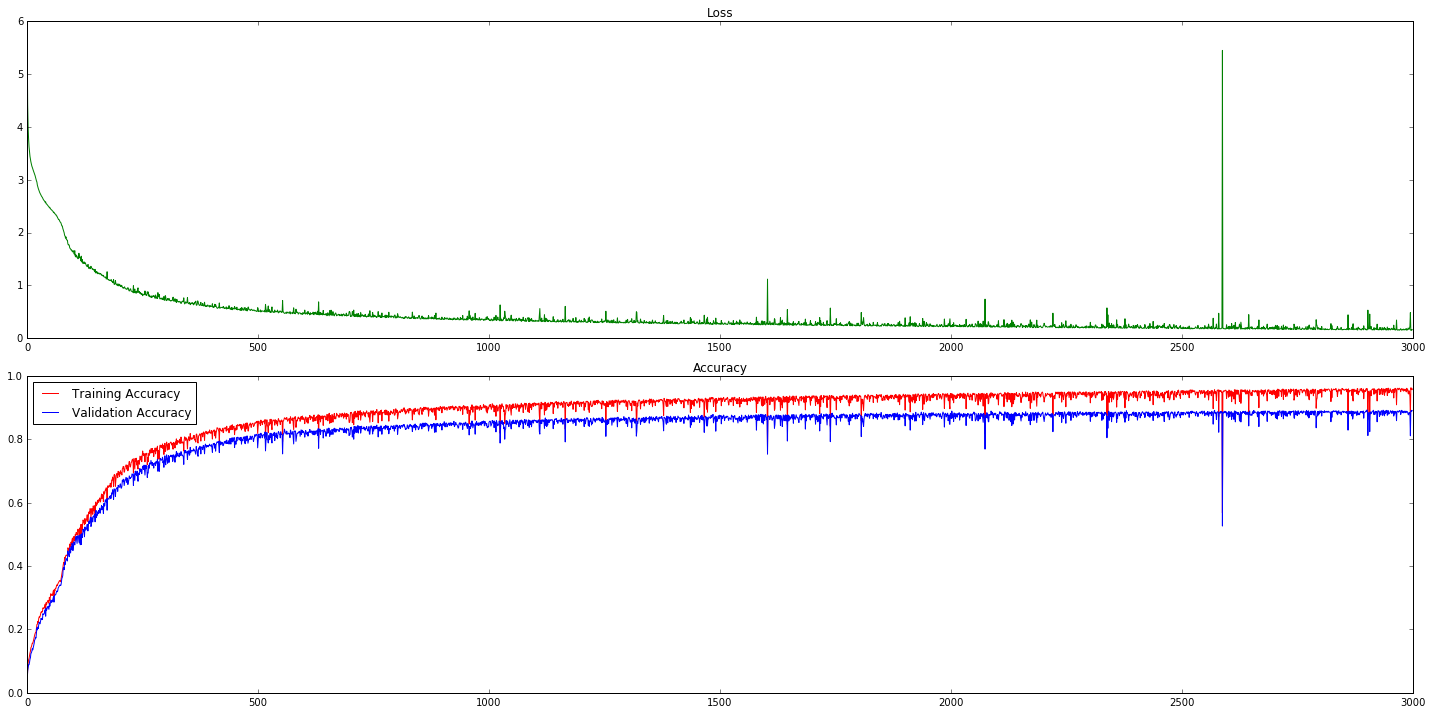

In [22]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(loss_batch, 'g')
#loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
#acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=2)
plt.tight_layout()
plt.show()

In [24]:
session = tf.Session()
saver = tf.train.import_meta_graph(model_param_file+'.meta')
saver.restore(session, model_param_file)
all_vars = tf.trainable_variables()
for v in all_vars:
    print(v.name)
    
#    ckpt = tf.train.get_checkpoint_state(model_param_file)
#    if ckpt and ckpt.model_checkpoint_path:
#        print(ckpt.model_checkpoint_path)
#        saver.restore(session, ckpt.model_checkpoint_path)


OSError: File perceptron512-relu.ckpt.meta does not exist.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.